# 0. 사용할 패키지 불러오기

In [1]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
from tensorflow.python.keras.layers.core import Activation
from tensorflow.python.keras.layers.core import Flatten
from tensorflow.python.keras.layers.core import Dropout
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.python.keras.models import load_model
import cv2


/home/pirl/anaconda3/envs/edu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pirl/anaconda3/envs/edu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pirl/anaconda3/envs/edu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/pirl/anaconda3/envs/edu/lib/python3.6/site-packages/ten

# 1. 데이터 불러오기

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [3]:
import numpy as np
import glob
import sys
from sklearn.model_selection import train_test_split

x_train = np.empty((0, 320, 120, 1))
y_train = np.empty((0, 3))
print(y_train.shape)

training_data = glob.glob('/home/pirl/Documents/lane_data/*.npz')
#print(training_data)

for single_npz in training_data:
    with np.load(single_npz) as data:
        #print(data.files)
        x = data['train']
        y = data['train_labels']
        temp=cv2.cvtColor(x, cv2.COLOR_BGR2GRAY) # convert color to gray
        print(x.shape,temp.shape)
    x = np.reshape(temp, ( -1, 320, 120, 1))
    
    x_train = np.vstack((x_train, x))
    y_train = np.vstack((y_train, y))


print(x_train.shape)
# train test split, 7:3
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state = 42)

y_train = y_train[:,:]
y_test = y_test[:,:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(0, 3)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320

(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)


(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)
(320, 120, 3) (320, 120)


# 데이터 확인

In [4]:
#import pandas as pd

#y_data = pd.DataFrame(y_total[:, :])

In [5]:
#y_data.count()

In [6]:
#left = y_data.loc[y_data[:][0] == 1]

In [7]:
#left.count()

In [8]:
#right = y_data.loc[y_data[:][1] == 1]

In [9]:
#right.count()

In [10]:
#forward = y_data.loc[y_data[:][2] == 1]

In [11]:
#forward.count()

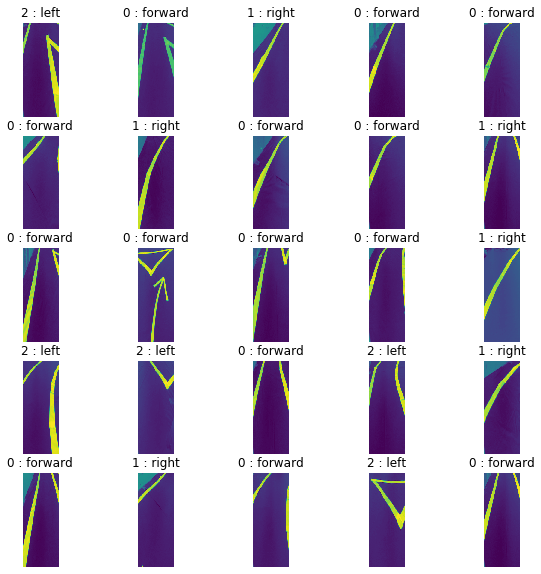

In [5]:
# 데이터 확인

from matplotlib import pyplot as plt
%matplotlib inline

plt_row = 5
plt_col = 5
plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):

    sub_plt = axarr[int(i/plt_row), int(i%plt_col)]
    sub_plt.axis('off')
    sub_plt.imshow(x_train[i].reshape(320, 120))
    
    label = np.argmax(y_train[i])
                      
    if label == 2 :
        direction = 'left'
    elif label == 1:
        direction = 'right'
    elif label == 0:
        direction = 'forward'
#     elif label == 3:
#         direction = 'backward'
                      
    sub_plt_title = str(label) + " : " + direction
    sub_plt.set_title(sub_plt_title)

plt.show()

# 3. 모델 생성

In [7]:
# image size = 160 x 320
def posla_net():
    
    # model setting
    H = 320
    W = 120
    CH = 1

    inputShape = (H, W, CH)

    activation = 'relu'
    keep_prob_conv = 0.25
    keep_prob_dense = 0.5

    #init = 'glorot_normal'
    #init = 'he_normal'
    init = 'he_uniform'
    chanDim = -1
    classes = 3
    
    model = Sequential()
    
    # CONV => RELU => POOL
    model.add(Conv2D(3, (3, 3), padding="valid", input_shape=inputShape, kernel_initializer=init, activation=activation))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(9, (3, 3), padding="valid", kernel_initializer=init, activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(18, (3, 3), padding="valid", kernel_initializer=init, activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(32, (3, 3), padding="valid", kernel_initializer=init, activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(80, kernel_initializer=init, activation=activation))
    model.add(Dropout(keep_prob_dense))
    
    model.add(Dense(15, kernel_initializer=init, activation=activation))
    model.add(Dropout(keep_prob_dense))
    
    # softmax classifier
    model.add(Dense(classes , activation = 'softmax'))
    
    return model

In [8]:
model = posla_net()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 318, 118, 3)       30        
_________________________________________________________________
batch_normalization (BatchNo (None, 318, 118, 3)       12        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 159, 59, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 157, 57, 9)        252       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 78, 28, 9)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 76, 26, 18)        1476      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 13, 18)        0         
__________

In [9]:
# from tensorflow.python.keras.utils import plot_model
# plot_model(model, to_file= 'video_net_plot.png', show_shapes = True, show_layer_names = True)

# 4. 모델 파라미터 셋팅

적은 수의 이미지 데이터가 존재할 경우 데이터를 늘리는 용도로 사용

In [10]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode="nearest")

In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [12]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.0001)

In [19]:
# initialize the model
# EPOCHS = 50
# INIT_LR = 1e-3
# BS = 32
# split_ratio = 0.2

In [13]:
EPOCHS = 10000
INIT_LR = 1e-4
BS = 256
split_ratio = 0.2

print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])
 

[INFO] compiling model...


# 5. 모델 훈련

In [14]:
from tensorflow.keras.utils import to_categorical


In [15]:
y_binary = to_categorical(y_train)

In [16]:
hist = model.fit(x_train, y_train, 
                 epochs=EPOCHS, batch_size=BS, 
                 validation_split=split_ratio, 
                 verbose = 1
                 ,callbacks=[reduce_lr]
                )

Train on 536 samples, validate on 134 samples
Epoch 1/10000
536/536 [==============================] - 4s 8ms/step - loss: 3.7415 - acc: 0.4067 - val_loss: 7.1936 - val_acc: 0.5299
Epoch 2/10000
536/536 [==============================] - 0s 414us/step - loss: 2.9767 - acc: 0.4291 - val_loss: 4.7886 - val_acc: 0.5672
Epoch 3/10000
536/536 [==============================] - 0s 457us/step - loss: 2.2156 - acc: 0.4608 - val_loss: 2.5105 - val_acc: 0.6343
Epoch 4/10000
536/536 [==============================] - 0s 408us/step - loss: 1.7310 - acc: 0.5000 - val_loss: 1.8675 - val_acc: 0.6194
Epoch 5/10000
536/536 [==============================] - 0s 411us/step - loss: 1.6174 - acc: 0.5261 - val_loss: 1.3544 - val_acc: 0.5970
Epoch 6/10000
536/536 [==============================] - 0s 407us/step - loss: 1.4675 - acc: 0.5299 - val_loss: 1.1779 - val_acc: 0.5672
Epoch 7/10000
536/536 [==============================] - 0s 436us/step - loss: 1.4228 - acc: 0.5354 - val_loss: 1.0685 - val_acc: 0.56

536/536 [==============================] - 0s 432us/step - loss: 0.7179 - acc: 0.6866 - val_loss: 0.6995 - val_acc: 0.6940
Epoch 61/10000
536/536 [==============================] - 0s 435us/step - loss: 0.7088 - acc: 0.7052 - val_loss: 0.7022 - val_acc: 0.6940
Epoch 62/10000
536/536 [==============================] - 0s 406us/step - loss: 0.7428 - acc: 0.6903 - val_loss: 0.7039 - val_acc: 0.7015
Epoch 63/10000
536/536 [==============================] - 0s 411us/step - loss: 0.7585 - acc: 0.6604 - val_loss: 0.7050 - val_acc: 0.6940
Epoch 64/10000
536/536 [==============================] - 0s 447us/step - loss: 0.6718 - acc: 0.7407 - val_loss: 0.7058 - val_acc: 0.6940
Epoch 65/10000
536/536 [==============================] - 0s 463us/step - loss: 0.7127 - acc: 0.7015 - val_loss: 0.7061 - val_acc: 0.6940
Epoch 66/10000
536/536 [==============================] - 0s 435us/step - loss: 0.6900 - acc: 0.7183 - val_loss: 0.7082 - val_acc: 0.6866
Epoch 67/10000
536/536 [=========================

536/536 [==============================] - 0s 438us/step - loss: 0.6815 - acc: 0.7201 - val_loss: 0.6859 - val_acc: 0.7388
Epoch 120/10000
536/536 [==============================] - 0s 440us/step - loss: 0.6697 - acc: 0.7201 - val_loss: 0.6880 - val_acc: 0.7388
Epoch 121/10000
536/536 [==============================] - 0s 444us/step - loss: 0.6249 - acc: 0.7463 - val_loss: 0.6946 - val_acc: 0.7313
Epoch 122/10000
536/536 [==============================] - 0s 447us/step - loss: 0.6158 - acc: 0.7052 - val_loss: 0.7017 - val_acc: 0.7463
Epoch 123/10000
536/536 [==============================] - 0s 431us/step - loss: 0.6206 - acc: 0.7313 - val_loss: 0.7117 - val_acc: 0.7463
Epoch 124/10000
536/536 [==============================] - 0s 433us/step - loss: 0.6417 - acc: 0.7183 - val_loss: 0.7165 - val_acc: 0.7313
Epoch 125/10000
536/536 [==============================] - 0s 453us/step - loss: 0.6516 - acc: 0.7090 - val_loss: 0.7197 - val_acc: 0.7313
Epoch 126/10000
536/536 [==================

536/536 [==============================] - 0s 449us/step - loss: 0.6085 - acc: 0.7257 - val_loss: 0.7064 - val_acc: 0.7537
Epoch 179/10000
536/536 [==============================] - 0s 440us/step - loss: 0.5940 - acc: 0.7183 - val_loss: 0.7002 - val_acc: 0.7388
Epoch 180/10000
536/536 [==============================] - 0s 443us/step - loss: 0.5575 - acc: 0.7631 - val_loss: 0.6963 - val_acc: 0.7388
Epoch 181/10000
536/536 [==============================] - 0s 421us/step - loss: 0.6256 - acc: 0.7090 - val_loss: 0.6942 - val_acc: 0.7388
Epoch 182/10000
536/536 [==============================] - 0s 422us/step - loss: 0.6574 - acc: 0.7332 - val_loss: 0.6946 - val_acc: 0.7388
Epoch 183/10000
536/536 [==============================] - 0s 427us/step - loss: 0.5893 - acc: 0.7463 - val_loss: 0.6960 - val_acc: 0.7388
Epoch 184/10000
536/536 [==============================] - 0s 424us/step - loss: 0.5732 - acc: 0.7537 - val_loss: 0.6958 - val_acc: 0.7388
Epoch 185/10000
536/536 [==================

536/536 [==============================] - 0s 449us/step - loss: 0.5714 - acc: 0.7351 - val_loss: 0.7302 - val_acc: 0.7463
Epoch 238/10000
536/536 [==============================] - 0s 449us/step - loss: 0.5378 - acc: 0.7705 - val_loss: 0.7311 - val_acc: 0.7463
Epoch 239/10000
536/536 [==============================] - 0s 424us/step - loss: 0.5578 - acc: 0.7612 - val_loss: 0.7307 - val_acc: 0.7463
Epoch 240/10000
536/536 [==============================] - 0s 454us/step - loss: 0.5278 - acc: 0.7724 - val_loss: 0.7309 - val_acc: 0.7463
Epoch 241/10000
536/536 [==============================] - 0s 438us/step - loss: 0.5567 - acc: 0.7556 - val_loss: 0.7325 - val_acc: 0.7463
Epoch 242/10000
536/536 [==============================] - 0s 434us/step - loss: 0.5483 - acc: 0.7631 - val_loss: 0.7353 - val_acc: 0.7537
Epoch 243/10000
536/536 [==============================] - 0s 454us/step - loss: 0.5442 - acc: 0.7687 - val_loss: 0.7371 - val_acc: 0.7537
Epoch 244/10000
536/536 [==================

536/536 [==============================] - 0s 409us/step - loss: 0.5562 - acc: 0.7649 - val_loss: 0.7453 - val_acc: 0.7164
Epoch 297/10000
536/536 [==============================] - 0s 446us/step - loss: 0.5385 - acc: 0.7873 - val_loss: 0.7476 - val_acc: 0.7239
Epoch 298/10000
536/536 [==============================] - 0s 451us/step - loss: 0.5005 - acc: 0.8022 - val_loss: 0.7498 - val_acc: 0.7463
Epoch 299/10000
536/536 [==============================] - 0s 420us/step - loss: 0.5186 - acc: 0.7892 - val_loss: 0.7543 - val_acc: 0.7313
Epoch 300/10000
536/536 [==============================] - 0s 452us/step - loss: 0.5183 - acc: 0.7929 - val_loss: 0.7583 - val_acc: 0.7463
Epoch 301/10000
536/536 [==============================] - 0s 452us/step - loss: 0.5177 - acc: 0.7817 - val_loss: 0.7617 - val_acc: 0.7463
Epoch 302/10000
536/536 [==============================] - 0s 435us/step - loss: 0.5339 - acc: 0.7612 - val_loss: 0.7622 - val_acc: 0.7388
Epoch 303/10000
536/536 [==================

536/536 [==============================] - 0s 482us/step - loss: 0.4905 - acc: 0.7910 - val_loss: 0.7918 - val_acc: 0.7164
Epoch 356/10000
536/536 [==============================] - 0s 448us/step - loss: 0.4607 - acc: 0.8097 - val_loss: 0.7945 - val_acc: 0.7239
Epoch 357/10000
536/536 [==============================] - 0s 433us/step - loss: 0.4561 - acc: 0.8022 - val_loss: 0.7964 - val_acc: 0.7239
Epoch 358/10000
536/536 [==============================] - 0s 415us/step - loss: 0.4680 - acc: 0.7910 - val_loss: 0.7966 - val_acc: 0.7388
Epoch 359/10000
536/536 [==============================] - 0s 460us/step - loss: 0.5366 - acc: 0.7817 - val_loss: 0.7952 - val_acc: 0.7388
Epoch 360/10000
536/536 [==============================] - 0s 456us/step - loss: 0.4479 - acc: 0.8153 - val_loss: 0.7966 - val_acc: 0.7239
Epoch 361/10000
536/536 [==============================] - 0s 453us/step - loss: 0.4891 - acc: 0.7910 - val_loss: 0.7983 - val_acc: 0.7239
Epoch 362/10000
536/536 [==================

536/536 [==============================] - 0s 435us/step - loss: 0.4725 - acc: 0.7966 - val_loss: 0.8148 - val_acc: 0.7313
Epoch 415/10000
536/536 [==============================] - 0s 437us/step - loss: 0.4755 - acc: 0.7799 - val_loss: 0.8080 - val_acc: 0.7388
Epoch 416/10000
536/536 [==============================] - 0s 439us/step - loss: 0.4655 - acc: 0.7929 - val_loss: 0.8050 - val_acc: 0.7463
Epoch 417/10000
536/536 [==============================] - 0s 445us/step - loss: 0.4755 - acc: 0.7854 - val_loss: 0.8101 - val_acc: 0.7388
Epoch 418/10000
536/536 [==============================] - 0s 422us/step - loss: 0.4878 - acc: 0.7929 - val_loss: 0.8192 - val_acc: 0.7388
Epoch 419/10000
536/536 [==============================] - 0s 435us/step - loss: 0.4853 - acc: 0.8041 - val_loss: 0.8277 - val_acc: 0.7388
Epoch 420/10000
536/536 [==============================] - 0s 434us/step - loss: 0.4385 - acc: 0.8209 - val_loss: 0.8307 - val_acc: 0.7388
Epoch 421/10000
536/536 [==================

536/536 [==============================] - 0s 389us/step - loss: 0.4783 - acc: 0.7873 - val_loss: 0.8405 - val_acc: 0.7239
Epoch 474/10000
536/536 [==============================] - 0s 419us/step - loss: 0.4423 - acc: 0.7966 - val_loss: 0.8270 - val_acc: 0.7239
Epoch 475/10000
536/536 [==============================] - 0s 459us/step - loss: 0.4108 - acc: 0.8321 - val_loss: 0.8166 - val_acc: 0.7239
Epoch 476/10000
536/536 [==============================] - 0s 411us/step - loss: 0.4447 - acc: 0.8228 - val_loss: 0.8079 - val_acc: 0.7164
Epoch 477/10000
536/536 [==============================] - 0s 406us/step - loss: 0.4457 - acc: 0.7985 - val_loss: 0.7991 - val_acc: 0.7164
Epoch 478/10000
536/536 [==============================] - 0s 421us/step - loss: 0.4375 - acc: 0.8209 - val_loss: 0.7943 - val_acc: 0.7164
Epoch 479/10000
536/536 [==============================] - 0s 432us/step - loss: 0.4558 - acc: 0.8116 - val_loss: 0.7942 - val_acc: 0.7164
Epoch 480/10000
536/536 [==================

536/536 [==============================] - 0s 455us/step - loss: 0.3886 - acc: 0.8507 - val_loss: 0.8959 - val_acc: 0.7239
Epoch 533/10000
536/536 [==============================] - 0s 423us/step - loss: 0.3848 - acc: 0.8377 - val_loss: 0.9057 - val_acc: 0.7239
Epoch 534/10000
536/536 [==============================] - 0s 437us/step - loss: 0.4163 - acc: 0.8116 - val_loss: 0.9067 - val_acc: 0.7239
Epoch 535/10000
536/536 [==============================] - 0s 453us/step - loss: 0.4110 - acc: 0.8246 - val_loss: 0.9011 - val_acc: 0.7239
Epoch 536/10000
536/536 [==============================] - 0s 441us/step - loss: 0.4133 - acc: 0.8153 - val_loss: 0.8983 - val_acc: 0.7388
Epoch 537/10000
536/536 [==============================] - 0s 403us/step - loss: 0.4181 - acc: 0.8284 - val_loss: 0.8943 - val_acc: 0.7388
Epoch 538/10000
536/536 [==============================] - 0s 446us/step - loss: 0.3757 - acc: 0.8321 - val_loss: 0.8941 - val_acc: 0.7239
Epoch 539/10000
536/536 [==================

536/536 [==============================] - 0s 437us/step - loss: 0.4197 - acc: 0.8041 - val_loss: 0.9143 - val_acc: 0.7463
Epoch 592/10000
536/536 [==============================] - 0s 426us/step - loss: 0.3464 - acc: 0.8526 - val_loss: 0.9210 - val_acc: 0.7388
Epoch 593/10000
536/536 [==============================] - 0s 402us/step - loss: 0.3983 - acc: 0.8265 - val_loss: 0.9241 - val_acc: 0.7388
Epoch 594/10000
536/536 [==============================] - 0s 431us/step - loss: 0.3836 - acc: 0.8377 - val_loss: 0.9216 - val_acc: 0.7388
Epoch 595/10000
536/536 [==============================] - 0s 461us/step - loss: 0.4015 - acc: 0.8358 - val_loss: 0.9138 - val_acc: 0.7388
Epoch 596/10000
536/536 [==============================] - 0s 436us/step - loss: 0.3516 - acc: 0.8545 - val_loss: 0.9088 - val_acc: 0.7388
Epoch 597/10000
536/536 [==============================] - 0s 448us/step - loss: 0.4221 - acc: 0.8228 - val_loss: 0.9072 - val_acc: 0.7388
Epoch 598/10000
536/536 [==================

536/536 [==============================] - 0s 447us/step - loss: 0.3630 - acc: 0.8377 - val_loss: 0.9126 - val_acc: 0.7313
Epoch 651/10000
536/536 [==============================] - 0s 431us/step - loss: 0.3901 - acc: 0.8340 - val_loss: 0.9067 - val_acc: 0.7388
Epoch 652/10000
536/536 [==============================] - 0s 445us/step - loss: 0.3640 - acc: 0.8377 - val_loss: 0.9035 - val_acc: 0.7388
Epoch 653/10000
536/536 [==============================] - 0s 439us/step - loss: 0.3337 - acc: 0.8433 - val_loss: 0.9008 - val_acc: 0.7313
Epoch 654/10000
536/536 [==============================] - 0s 438us/step - loss: 0.3835 - acc: 0.8265 - val_loss: 0.9027 - val_acc: 0.7313
Epoch 655/10000
536/536 [==============================] - 0s 447us/step - loss: 0.3525 - acc: 0.8507 - val_loss: 0.9021 - val_acc: 0.7239
Epoch 656/10000
536/536 [==============================] - 0s 410us/step - loss: 0.3924 - acc: 0.8097 - val_loss: 0.9027 - val_acc: 0.7239
Epoch 657/10000
536/536 [==================

536/536 [==============================] - 0s 446us/step - loss: 0.3339 - acc: 0.8694 - val_loss: 1.0241 - val_acc: 0.7239
Epoch 710/10000
536/536 [==============================] - 0s 432us/step - loss: 0.3621 - acc: 0.8563 - val_loss: 1.0337 - val_acc: 0.7164
Epoch 711/10000
536/536 [==============================] - 0s 426us/step - loss: 0.3336 - acc: 0.8433 - val_loss: 1.0437 - val_acc: 0.7090
Epoch 712/10000
536/536 [==============================] - 0s 451us/step - loss: 0.3572 - acc: 0.8246 - val_loss: 1.0410 - val_acc: 0.7090
Epoch 713/10000
536/536 [==============================] - 0s 435us/step - loss: 0.3373 - acc: 0.8433 - val_loss: 1.0422 - val_acc: 0.7239
Epoch 714/10000
536/536 [==============================] - 0s 455us/step - loss: 0.3508 - acc: 0.8470 - val_loss: 1.0383 - val_acc: 0.7313
Epoch 715/10000
536/536 [==============================] - 0s 441us/step - loss: 0.3146 - acc: 0.8601 - val_loss: 1.0283 - val_acc: 0.7239
Epoch 716/10000
536/536 [==================

536/536 [==============================] - 0s 407us/step - loss: 0.3000 - acc: 0.8713 - val_loss: 1.0288 - val_acc: 0.7239
Epoch 769/10000
536/536 [==============================] - 0s 457us/step - loss: 0.3245 - acc: 0.8750 - val_loss: 1.0267 - val_acc: 0.7239
Epoch 770/10000
536/536 [==============================] - 0s 437us/step - loss: 0.3001 - acc: 0.8675 - val_loss: 1.0173 - val_acc: 0.7239
Epoch 771/10000
536/536 [==============================] - 0s 437us/step - loss: 0.3171 - acc: 0.8694 - val_loss: 1.0077 - val_acc: 0.7239
Epoch 772/10000
536/536 [==============================] - 0s 460us/step - loss: 0.3035 - acc: 0.8713 - val_loss: 1.0020 - val_acc: 0.7239
Epoch 773/10000
536/536 [==============================] - 0s 445us/step - loss: 0.3555 - acc: 0.8433 - val_loss: 0.9979 - val_acc: 0.7239
Epoch 774/10000
536/536 [==============================] - 0s 447us/step - loss: 0.3106 - acc: 0.8713 - val_loss: 1.0004 - val_acc: 0.7239
Epoch 775/10000
536/536 [==================

536/536 [==============================] - 0s 411us/step - loss: 0.2992 - acc: 0.8582 - val_loss: 1.1342 - val_acc: 0.7239
Epoch 828/10000
536/536 [==============================] - 0s 426us/step - loss: 0.3019 - acc: 0.8638 - val_loss: 1.1383 - val_acc: 0.7239
Epoch 829/10000
536/536 [==============================] - 0s 438us/step - loss: 0.2982 - acc: 0.8750 - val_loss: 1.1293 - val_acc: 0.7164
Epoch 830/10000
536/536 [==============================] - 0s 449us/step - loss: 0.3159 - acc: 0.8750 - val_loss: 1.1083 - val_acc: 0.7239
Epoch 831/10000
536/536 [==============================] - 0s 438us/step - loss: 0.3072 - acc: 0.8713 - val_loss: 1.0910 - val_acc: 0.7239
Epoch 832/10000
536/536 [==============================] - 0s 392us/step - loss: 0.3517 - acc: 0.8526 - val_loss: 1.0843 - val_acc: 0.7164
Epoch 833/10000
536/536 [==============================] - 0s 413us/step - loss: 0.3356 - acc: 0.8675 - val_loss: 1.0958 - val_acc: 0.7239
Epoch 834/10000
536/536 [==================

536/536 [==============================] - 0s 430us/step - loss: 0.2799 - acc: 0.8750 - val_loss: 1.1910 - val_acc: 0.7090
Epoch 887/10000
536/536 [==============================] - 0s 436us/step - loss: 0.2791 - acc: 0.8694 - val_loss: 1.1944 - val_acc: 0.7164
Epoch 888/10000
536/536 [==============================] - 0s 446us/step - loss: 0.2744 - acc: 0.8806 - val_loss: 1.1960 - val_acc: 0.7164
Epoch 889/10000
536/536 [==============================] - 0s 438us/step - loss: 0.2814 - acc: 0.8806 - val_loss: 1.1873 - val_acc: 0.7164
Epoch 890/10000
536/536 [==============================] - 0s 430us/step - loss: 0.2437 - acc: 0.8993 - val_loss: 1.1922 - val_acc: 0.7164
Epoch 891/10000
536/536 [==============================] - 0s 444us/step - loss: 0.2817 - acc: 0.8713 - val_loss: 1.1985 - val_acc: 0.7164
Epoch 892/10000
536/536 [==============================] - 0s 440us/step - loss: 0.3076 - acc: 0.8489 - val_loss: 1.1708 - val_acc: 0.7164
Epoch 893/10000
536/536 [==================

536/536 [==============================] - 0s 425us/step - loss: 0.2542 - acc: 0.8937 - val_loss: 1.1702 - val_acc: 0.7388
Epoch 946/10000
536/536 [==============================] - 0s 418us/step - loss: 0.2652 - acc: 0.8843 - val_loss: 1.1829 - val_acc: 0.7239
Epoch 947/10000
536/536 [==============================] - 0s 430us/step - loss: 0.2632 - acc: 0.8825 - val_loss: 1.2053 - val_acc: 0.7239
Epoch 948/10000
536/536 [==============================] - 0s 423us/step - loss: 0.2554 - acc: 0.8862 - val_loss: 1.2160 - val_acc: 0.7239
Epoch 949/10000
536/536 [==============================] - 0s 423us/step - loss: 0.2730 - acc: 0.9049 - val_loss: 1.2262 - val_acc: 0.7164
Epoch 950/10000
536/536 [==============================] - 0s 449us/step - loss: 0.2756 - acc: 0.8825 - val_loss: 1.2327 - val_acc: 0.7164
Epoch 951/10000
536/536 [==============================] - 0s 413us/step - loss: 0.2759 - acc: 0.8862 - val_loss: 1.2283 - val_acc: 0.7164
Epoch 952/10000
536/536 [==================

536/536 [==============================] - 0s 435us/step - loss: 0.2261 - acc: 0.9049 - val_loss: 1.2461 - val_acc: 0.7090
Epoch 1005/10000
536/536 [==============================] - 0s 450us/step - loss: 0.2306 - acc: 0.9216 - val_loss: 1.2438 - val_acc: 0.7090
Epoch 1006/10000
536/536 [==============================] - 0s 433us/step - loss: 0.2476 - acc: 0.8937 - val_loss: 1.2467 - val_acc: 0.7015
Epoch 1007/10000
536/536 [==============================] - 0s 443us/step - loss: 0.2758 - acc: 0.8787 - val_loss: 1.2433 - val_acc: 0.7015
Epoch 1008/10000
536/536 [==============================] - 0s 424us/step - loss: 0.2552 - acc: 0.8769 - val_loss: 1.2375 - val_acc: 0.7015
Epoch 1009/10000
536/536 [==============================] - 0s 446us/step - loss: 0.2539 - acc: 0.8918 - val_loss: 1.2316 - val_acc: 0.7015
Epoch 1010/10000
536/536 [==============================] - 0s 430us/step - loss: 0.2636 - acc: 0.8825 - val_loss: 1.2346 - val_acc: 0.7090
Epoch 1011/10000
536/536 [===========

536/536 [==============================] - 0s 436us/step - loss: 0.2114 - acc: 0.9123 - val_loss: 1.3417 - val_acc: 0.7239
Epoch 1063/10000
536/536 [==============================] - 0s 456us/step - loss: 0.2249 - acc: 0.8993 - val_loss: 1.3219 - val_acc: 0.7164
Epoch 1064/10000
536/536 [==============================] - 0s 419us/step - loss: 0.2265 - acc: 0.8993 - val_loss: 1.3126 - val_acc: 0.7164
Epoch 1065/10000
536/536 [==============================] - 0s 420us/step - loss: 0.2218 - acc: 0.9160 - val_loss: 1.3133 - val_acc: 0.7090
Epoch 1066/10000
536/536 [==============================] - 0s 405us/step - loss: 0.2277 - acc: 0.9049 - val_loss: 1.3232 - val_acc: 0.7164
Epoch 1067/10000
536/536 [==============================] - 0s 403us/step - loss: 0.2124 - acc: 0.9067 - val_loss: 1.3372 - val_acc: 0.7090
Epoch 1068/10000
536/536 [==============================] - 0s 437us/step - loss: 0.2225 - acc: 0.9067 - val_loss: 1.3574 - val_acc: 0.7164
Epoch 1069/10000
536/536 [===========

536/536 [==============================] - 0s 438us/step - loss: 0.1990 - acc: 0.9291 - val_loss: 1.3954 - val_acc: 0.7090
Epoch 1121/10000
536/536 [==============================] - 0s 451us/step - loss: 0.2034 - acc: 0.9104 - val_loss: 1.3858 - val_acc: 0.7090
Epoch 1122/10000
536/536 [==============================] - 0s 453us/step - loss: 0.1991 - acc: 0.9086 - val_loss: 1.3799 - val_acc: 0.7090
Epoch 1123/10000
536/536 [==============================] - 0s 455us/step - loss: 0.2616 - acc: 0.8993 - val_loss: 1.3766 - val_acc: 0.7239
Epoch 1124/10000
536/536 [==============================] - 0s 420us/step - loss: 0.2134 - acc: 0.9104 - val_loss: 1.3942 - val_acc: 0.7164
Epoch 1125/10000
536/536 [==============================] - 0s 442us/step - loss: 0.2054 - acc: 0.9235 - val_loss: 1.4245 - val_acc: 0.7090
Epoch 1126/10000
536/536 [==============================] - 0s 430us/step - loss: 0.2213 - acc: 0.9123 - val_loss: 1.4489 - val_acc: 0.7239
Epoch 1127/10000
536/536 [===========

536/536 [==============================] - 0s 436us/step - loss: 0.2054 - acc: 0.9104 - val_loss: 1.4867 - val_acc: 0.7164
Epoch 1179/10000
536/536 [==============================] - 0s 424us/step - loss: 0.1820 - acc: 0.9235 - val_loss: 1.4932 - val_acc: 0.7164
Epoch 1180/10000
536/536 [==============================] - 0s 432us/step - loss: 0.1793 - acc: 0.9328 - val_loss: 1.5138 - val_acc: 0.7090
Epoch 1181/10000
536/536 [==============================] - 0s 471us/step - loss: 0.2123 - acc: 0.9011 - val_loss: 1.5373 - val_acc: 0.7164
Epoch 1182/10000
536/536 [==============================] - 0s 458us/step - loss: 0.2034 - acc: 0.9049 - val_loss: 1.5529 - val_acc: 0.7164
Epoch 1183/10000
536/536 [==============================] - 0s 416us/step - loss: 0.1865 - acc: 0.9179 - val_loss: 1.5629 - val_acc: 0.7164
Epoch 1184/10000
536/536 [==============================] - 0s 441us/step - loss: 0.1865 - acc: 0.9216 - val_loss: 1.5697 - val_acc: 0.7164
Epoch 1185/10000
536/536 [===========

536/536 [==============================] - 0s 443us/step - loss: 0.2013 - acc: 0.9198 - val_loss: 1.4567 - val_acc: 0.7090
Epoch 1237/10000
536/536 [==============================] - 0s 434us/step - loss: 0.2045 - acc: 0.9030 - val_loss: 1.4627 - val_acc: 0.7164
Epoch 1238/10000
536/536 [==============================] - 0s 417us/step - loss: 0.1682 - acc: 0.9272 - val_loss: 1.4793 - val_acc: 0.7164
Epoch 1239/10000
536/536 [==============================] - 0s 452us/step - loss: 0.2085 - acc: 0.9216 - val_loss: 1.4910 - val_acc: 0.7164
Epoch 1240/10000
536/536 [==============================] - 0s 427us/step - loss: 0.1852 - acc: 0.9254 - val_loss: 1.5030 - val_acc: 0.7090
Epoch 1241/10000
536/536 [==============================] - 0s 426us/step - loss: 0.1709 - acc: 0.9272 - val_loss: 1.5238 - val_acc: 0.7164
Epoch 1242/10000
536/536 [==============================] - 0s 442us/step - loss: 0.1906 - acc: 0.9104 - val_loss: 1.5617 - val_acc: 0.7090
Epoch 1243/10000
536/536 [===========

536/536 [==============================] - 0s 436us/step - loss: 0.1824 - acc: 0.9216 - val_loss: 1.6377 - val_acc: 0.7090
Epoch 1295/10000
536/536 [==============================] - 0s 433us/step - loss: 0.1755 - acc: 0.9198 - val_loss: 1.6832 - val_acc: 0.7164
Epoch 1296/10000
536/536 [==============================] - 0s 446us/step - loss: 0.1882 - acc: 0.9198 - val_loss: 1.6914 - val_acc: 0.7164
Epoch 1297/10000
536/536 [==============================] - 0s 450us/step - loss: 0.1961 - acc: 0.9104 - val_loss: 1.6708 - val_acc: 0.7164
Epoch 1298/10000
536/536 [==============================] - 0s 434us/step - loss: 0.1800 - acc: 0.9160 - val_loss: 1.6430 - val_acc: 0.7164
Epoch 1299/10000
536/536 [==============================] - 0s 433us/step - loss: 0.1613 - acc: 0.9328 - val_loss: 1.6131 - val_acc: 0.7164
Epoch 1300/10000
536/536 [==============================] - 0s 454us/step - loss: 0.2007 - acc: 0.9067 - val_loss: 1.6021 - val_acc: 0.7164
Epoch 1301/10000
536/536 [===========

536/536 [==============================] - 0s 441us/step - loss: 0.1658 - acc: 0.9216 - val_loss: 1.7008 - val_acc: 0.6940
Epoch 1353/10000
536/536 [==============================] - 0s 448us/step - loss: 0.2051 - acc: 0.9104 - val_loss: 1.6975 - val_acc: 0.7015
Epoch 1354/10000
536/536 [==============================] - 0s 434us/step - loss: 0.1550 - acc: 0.9347 - val_loss: 1.7106 - val_acc: 0.6940
Epoch 1355/10000
536/536 [==============================] - 0s 448us/step - loss: 0.1931 - acc: 0.9123 - val_loss: 1.7224 - val_acc: 0.7090
Epoch 1356/10000
536/536 [==============================] - 0s 436us/step - loss: 0.1941 - acc: 0.9049 - val_loss: 1.7014 - val_acc: 0.7090
Epoch 1357/10000
536/536 [==============================] - 0s 453us/step - loss: 0.1594 - acc: 0.9347 - val_loss: 1.6725 - val_acc: 0.7015
Epoch 1358/10000
536/536 [==============================] - 0s 427us/step - loss: 0.1412 - acc: 0.9347 - val_loss: 1.6729 - val_acc: 0.7015
Epoch 1359/10000
536/536 [===========

536/536 [==============================] - 0s 440us/step - loss: 0.1588 - acc: 0.9291 - val_loss: 1.6928 - val_acc: 0.7090
Epoch 1411/10000
536/536 [==============================] - 0s 405us/step - loss: 0.1626 - acc: 0.9310 - val_loss: 1.6991 - val_acc: 0.7090
Epoch 1412/10000
536/536 [==============================] - 0s 438us/step - loss: 0.1775 - acc: 0.9310 - val_loss: 1.6824 - val_acc: 0.7090
Epoch 1413/10000
536/536 [==============================] - 0s 447us/step - loss: 0.1620 - acc: 0.9216 - val_loss: 1.6497 - val_acc: 0.7090
Epoch 1414/10000
536/536 [==============================] - 0s 452us/step - loss: 0.1821 - acc: 0.9160 - val_loss: 1.6350 - val_acc: 0.7090
Epoch 1415/10000
536/536 [==============================] - 0s 447us/step - loss: 0.1832 - acc: 0.9272 - val_loss: 1.6491 - val_acc: 0.7164
Epoch 1416/10000
536/536 [==============================] - 0s 447us/step - loss: 0.1571 - acc: 0.9310 - val_loss: 1.6775 - val_acc: 0.7015
Epoch 1417/10000
536/536 [===========

536/536 [==============================] - 0s 448us/step - loss: 0.1608 - acc: 0.9328 - val_loss: 1.7144 - val_acc: 0.7164
Epoch 1469/10000
536/536 [==============================] - 0s 436us/step - loss: 0.1486 - acc: 0.9328 - val_loss: 1.7240 - val_acc: 0.7164
Epoch 1470/10000
536/536 [==============================] - 0s 447us/step - loss: 0.1496 - acc: 0.9328 - val_loss: 1.7197 - val_acc: 0.7239
Epoch 1471/10000
536/536 [==============================] - 0s 421us/step - loss: 0.1341 - acc: 0.9478 - val_loss: 1.7075 - val_acc: 0.7239
Epoch 1472/10000
536/536 [==============================] - 0s 444us/step - loss: 0.1566 - acc: 0.9347 - val_loss: 1.7137 - val_acc: 0.7164
Epoch 1473/10000
536/536 [==============================] - 0s 460us/step - loss: 0.1482 - acc: 0.9347 - val_loss: 1.7261 - val_acc: 0.7164
Epoch 1474/10000
536/536 [==============================] - 0s 400us/step - loss: 0.1290 - acc: 0.9366 - val_loss: 1.7382 - val_acc: 0.7164
Epoch 1475/10000
536/536 [===========

536/536 [==============================] - 0s 462us/step - loss: 0.1518 - acc: 0.9216 - val_loss: 1.8167 - val_acc: 0.6866
Epoch 1527/10000
536/536 [==============================] - 0s 434us/step - loss: 0.1418 - acc: 0.9310 - val_loss: 1.8414 - val_acc: 0.6791
Epoch 1528/10000
536/536 [==============================] - 0s 444us/step - loss: 0.1277 - acc: 0.9459 - val_loss: 1.8555 - val_acc: 0.6791
Epoch 1529/10000
536/536 [==============================] - 0s 442us/step - loss: 0.1235 - acc: 0.9627 - val_loss: 1.8549 - val_acc: 0.7015
Epoch 1530/10000
536/536 [==============================] - 0s 399us/step - loss: 0.1378 - acc: 0.9328 - val_loss: 1.8438 - val_acc: 0.7090
Epoch 1531/10000
536/536 [==============================] - 0s 452us/step - loss: 0.1310 - acc: 0.9347 - val_loss: 1.8366 - val_acc: 0.7015
Epoch 1532/10000
536/536 [==============================] - 0s 452us/step - loss: 0.1506 - acc: 0.9310 - val_loss: 1.8366 - val_acc: 0.7015
Epoch 1533/10000
536/536 [===========

536/536 [==============================] - 0s 449us/step - loss: 0.1317 - acc: 0.9384 - val_loss: 1.9797 - val_acc: 0.7164
Epoch 1585/10000
536/536 [==============================] - 0s 442us/step - loss: 0.1476 - acc: 0.9347 - val_loss: 1.9773 - val_acc: 0.7164
Epoch 1586/10000
536/536 [==============================] - 0s 437us/step - loss: 0.1594 - acc: 0.9328 - val_loss: 1.9762 - val_acc: 0.7090
Epoch 1587/10000
536/536 [==============================] - 0s 454us/step - loss: 0.1484 - acc: 0.9328 - val_loss: 1.9765 - val_acc: 0.7164
Epoch 1588/10000
536/536 [==============================] - 0s 412us/step - loss: 0.1429 - acc: 0.9440 - val_loss: 1.9642 - val_acc: 0.7239
Epoch 1589/10000
536/536 [==============================] - 0s 419us/step - loss: 0.1521 - acc: 0.9254 - val_loss: 1.9428 - val_acc: 0.7239
Epoch 1590/10000
536/536 [==============================] - 0s 401us/step - loss: 0.1623 - acc: 0.9328 - val_loss: 1.9212 - val_acc: 0.7164
Epoch 1591/10000
536/536 [===========

536/536 [==============================] - 0s 404us/step - loss: 0.1423 - acc: 0.9328 - val_loss: 1.8697 - val_acc: 0.7015
Epoch 1643/10000
536/536 [==============================] - 0s 433us/step - loss: 0.1501 - acc: 0.9347 - val_loss: 1.8588 - val_acc: 0.7015
Epoch 1644/10000
536/536 [==============================] - 0s 419us/step - loss: 0.1386 - acc: 0.9347 - val_loss: 1.8551 - val_acc: 0.7015
Epoch 1645/10000
536/536 [==============================] - 0s 454us/step - loss: 0.1168 - acc: 0.9590 - val_loss: 1.8711 - val_acc: 0.7015
Epoch 1646/10000
536/536 [==============================] - 0s 442us/step - loss: 0.1373 - acc: 0.9515 - val_loss: 1.9032 - val_acc: 0.6940
Epoch 1647/10000
536/536 [==============================] - 0s 443us/step - loss: 0.1296 - acc: 0.9496 - val_loss: 1.9367 - val_acc: 0.7090
Epoch 1648/10000
536/536 [==============================] - 0s 447us/step - loss: 0.1637 - acc: 0.9160 - val_loss: 1.9496 - val_acc: 0.7090
Epoch 1649/10000
536/536 [===========

536/536 [==============================] - 0s 397us/step - loss: 0.1347 - acc: 0.9384 - val_loss: 1.9752 - val_acc: 0.6940
Epoch 1701/10000
536/536 [==============================] - 0s 418us/step - loss: 0.1415 - acc: 0.9310 - val_loss: 1.9817 - val_acc: 0.6940
Epoch 1702/10000
536/536 [==============================] - 0s 437us/step - loss: 0.1258 - acc: 0.9366 - val_loss: 1.9885 - val_acc: 0.6940
Epoch 1703/10000
536/536 [==============================] - 0s 435us/step - loss: 0.1087 - acc: 0.9478 - val_loss: 1.9999 - val_acc: 0.6866
Epoch 1704/10000
536/536 [==============================] - 0s 440us/step - loss: 0.1187 - acc: 0.9422 - val_loss: 2.0129 - val_acc: 0.7015
Epoch 1705/10000
536/536 [==============================] - 0s 447us/step - loss: 0.1346 - acc: 0.9422 - val_loss: 2.0212 - val_acc: 0.7015
Epoch 1706/10000
536/536 [==============================] - 0s 434us/step - loss: 0.1363 - acc: 0.9347 - val_loss: 2.0208 - val_acc: 0.7015
Epoch 1707/10000
536/536 [===========

536/536 [==============================] - 0s 452us/step - loss: 0.1562 - acc: 0.9272 - val_loss: 2.1052 - val_acc: 0.6940
Epoch 1759/10000
536/536 [==============================] - 0s 448us/step - loss: 0.1170 - acc: 0.9534 - val_loss: 2.0947 - val_acc: 0.6940
Epoch 1760/10000
536/536 [==============================] - 0s 440us/step - loss: 0.1156 - acc: 0.9478 - val_loss: 2.0890 - val_acc: 0.6940
Epoch 1761/10000
536/536 [==============================] - 0s 439us/step - loss: 0.1168 - acc: 0.9496 - val_loss: 2.0753 - val_acc: 0.6940
Epoch 1762/10000
536/536 [==============================] - 0s 433us/step - loss: 0.1140 - acc: 0.9459 - val_loss: 2.0722 - val_acc: 0.6940
Epoch 1763/10000
536/536 [==============================] - 0s 453us/step - loss: 0.1397 - acc: 0.9422 - val_loss: 2.0740 - val_acc: 0.6940
Epoch 1764/10000
536/536 [==============================] - 0s 449us/step - loss: 0.1247 - acc: 0.9403 - val_loss: 2.0875 - val_acc: 0.7015
Epoch 1765/10000
536/536 [===========

536/536 [==============================] - 0s 430us/step - loss: 0.1085 - acc: 0.9459 - val_loss: 2.1070 - val_acc: 0.7015
Epoch 1817/10000
536/536 [==============================] - 0s 430us/step - loss: 0.1353 - acc: 0.9384 - val_loss: 2.1144 - val_acc: 0.6940
Epoch 1818/10000
536/536 [==============================] - 0s 395us/step - loss: 0.1114 - acc: 0.9478 - val_loss: 2.1052 - val_acc: 0.7015
Epoch 1819/10000
536/536 [==============================] - 0s 396us/step - loss: 0.1375 - acc: 0.9422 - val_loss: 2.0791 - val_acc: 0.6866
Epoch 1820/10000
536/536 [==============================] - 0s 420us/step - loss: 0.1284 - acc: 0.9422 - val_loss: 2.0556 - val_acc: 0.7015
Epoch 1821/10000
536/536 [==============================] - 0s 448us/step - loss: 0.1334 - acc: 0.9347 - val_loss: 2.0531 - val_acc: 0.7015
Epoch 1822/10000
536/536 [==============================] - 0s 440us/step - loss: 0.1237 - acc: 0.9384 - val_loss: 2.0572 - val_acc: 0.7015
Epoch 1823/10000
536/536 [===========

536/536 [==============================] - 0s 447us/step - loss: 0.1526 - acc: 0.9198 - val_loss: 2.2197 - val_acc: 0.6866
Epoch 1875/10000
536/536 [==============================] - 0s 449us/step - loss: 0.1267 - acc: 0.9440 - val_loss: 2.2047 - val_acc: 0.6866
Epoch 1876/10000
536/536 [==============================] - 0s 418us/step - loss: 0.1240 - acc: 0.9534 - val_loss: 2.2105 - val_acc: 0.6866
Epoch 1877/10000
536/536 [==============================] - 0s 450us/step - loss: 0.1073 - acc: 0.9664 - val_loss: 2.2296 - val_acc: 0.6940
Epoch 1878/10000
536/536 [==============================] - 0s 438us/step - loss: 0.1232 - acc: 0.9478 - val_loss: 2.2575 - val_acc: 0.6940
Epoch 1879/10000
536/536 [==============================] - 0s 439us/step - loss: 0.1277 - acc: 0.9422 - val_loss: 2.2661 - val_acc: 0.6940
Epoch 1880/10000
536/536 [==============================] - 0s 415us/step - loss: 0.1354 - acc: 0.9366 - val_loss: 2.2727 - val_acc: 0.6940
Epoch 1881/10000
536/536 [===========

536/536 [==============================] - 0s 428us/step - loss: 0.1039 - acc: 0.9496 - val_loss: 2.1732 - val_acc: 0.6940
Epoch 1933/10000
536/536 [==============================] - 0s 432us/step - loss: 0.1189 - acc: 0.9459 - val_loss: 2.2028 - val_acc: 0.7015
Epoch 1934/10000
536/536 [==============================] - 0s 436us/step - loss: 0.1188 - acc: 0.9515 - val_loss: 2.2641 - val_acc: 0.7015
Epoch 1935/10000
536/536 [==============================] - 0s 446us/step - loss: 0.1192 - acc: 0.9459 - val_loss: 2.2982 - val_acc: 0.7015
Epoch 1936/10000
536/536 [==============================] - 0s 451us/step - loss: 0.1202 - acc: 0.9459 - val_loss: 2.3034 - val_acc: 0.7015
Epoch 1937/10000
536/536 [==============================] - 0s 455us/step - loss: 0.1045 - acc: 0.9459 - val_loss: 2.2830 - val_acc: 0.7015
Epoch 1938/10000
536/536 [==============================] - 0s 419us/step - loss: 0.1191 - acc: 0.9440 - val_loss: 2.2415 - val_acc: 0.6940
Epoch 1939/10000
536/536 [===========

536/536 [==============================] - 0s 449us/step - loss: 0.1316 - acc: 0.9459 - val_loss: 2.4424 - val_acc: 0.7015
Epoch 1991/10000
536/536 [==============================] - 0s 440us/step - loss: 0.1189 - acc: 0.9459 - val_loss: 2.4515 - val_acc: 0.6940
Epoch 1992/10000
536/536 [==============================] - 0s 416us/step - loss: 0.1166 - acc: 0.9422 - val_loss: 2.4441 - val_acc: 0.6940
Epoch 1993/10000
536/536 [==============================] - 0s 452us/step - loss: 0.1371 - acc: 0.9272 - val_loss: 2.4144 - val_acc: 0.6940
Epoch 1994/10000
536/536 [==============================] - 0s 458us/step - loss: 0.1077 - acc: 0.9422 - val_loss: 2.3900 - val_acc: 0.7090
Epoch 1995/10000
536/536 [==============================] - 0s 437us/step - loss: 0.1378 - acc: 0.9403 - val_loss: 2.3928 - val_acc: 0.6940
Epoch 1996/10000
536/536 [==============================] - 0s 442us/step - loss: 0.1097 - acc: 0.9571 - val_loss: 2.3801 - val_acc: 0.7015
Epoch 1997/10000
536/536 [===========

536/536 [==============================] - 0s 445us/step - loss: 0.1126 - acc: 0.9534 - val_loss: 2.2218 - val_acc: 0.7015
Epoch 2049/10000
536/536 [==============================] - 0s 434us/step - loss: 0.1229 - acc: 0.9515 - val_loss: 2.2519 - val_acc: 0.7015
Epoch 2050/10000
536/536 [==============================] - 0s 434us/step - loss: 0.1259 - acc: 0.9496 - val_loss: 2.2948 - val_acc: 0.7015
Epoch 2051/10000
536/536 [==============================] - 0s 434us/step - loss: 0.1192 - acc: 0.9534 - val_loss: 2.3268 - val_acc: 0.7015
Epoch 2052/10000
536/536 [==============================] - 0s 447us/step - loss: 0.1286 - acc: 0.9440 - val_loss: 2.3524 - val_acc: 0.6940
Epoch 2053/10000
536/536 [==============================] - 0s 460us/step - loss: 0.1240 - acc: 0.9403 - val_loss: 2.3740 - val_acc: 0.6940
Epoch 2054/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0925 - acc: 0.9534 - val_loss: 2.4123 - val_acc: 0.6940
Epoch 2055/10000
536/536 [===========

536/536 [==============================] - 0s 422us/step - loss: 0.1036 - acc: 0.9515 - val_loss: 2.4731 - val_acc: 0.6791
Epoch 2107/10000
536/536 [==============================] - 0s 455us/step - loss: 0.1109 - acc: 0.9478 - val_loss: 2.4904 - val_acc: 0.6866
Epoch 2108/10000
536/536 [==============================] - 0s 439us/step - loss: 0.1265 - acc: 0.9366 - val_loss: 2.5128 - val_acc: 0.6866
Epoch 2109/10000
536/536 [==============================] - 0s 425us/step - loss: 0.1116 - acc: 0.9422 - val_loss: 2.5104 - val_acc: 0.6866
Epoch 2110/10000
536/536 [==============================] - 0s 448us/step - loss: 0.1053 - acc: 0.9534 - val_loss: 2.5149 - val_acc: 0.6940
Epoch 2111/10000
536/536 [==============================] - 0s 443us/step - loss: 0.1032 - acc: 0.9422 - val_loss: 2.5135 - val_acc: 0.7015
Epoch 2112/10000
536/536 [==============================] - 0s 447us/step - loss: 0.0859 - acc: 0.9664 - val_loss: 2.5133 - val_acc: 0.7015
Epoch 2113/10000
536/536 [===========

536/536 [==============================] - 0s 431us/step - loss: 0.1390 - acc: 0.9347 - val_loss: 2.2924 - val_acc: 0.7015
Epoch 2165/10000
536/536 [==============================] - 0s 446us/step - loss: 0.1254 - acc: 0.9496 - val_loss: 2.2635 - val_acc: 0.7015
Epoch 2166/10000
536/536 [==============================] - 0s 439us/step - loss: 0.1230 - acc: 0.9478 - val_loss: 2.2463 - val_acc: 0.7090
Epoch 2167/10000
536/536 [==============================] - 0s 434us/step - loss: 0.1007 - acc: 0.9590 - val_loss: 2.2415 - val_acc: 0.7164
Epoch 2168/10000
536/536 [==============================] - 0s 450us/step - loss: 0.1107 - acc: 0.9552 - val_loss: 2.2374 - val_acc: 0.7164
Epoch 2169/10000
536/536 [==============================] - 0s 451us/step - loss: 0.1100 - acc: 0.9534 - val_loss: 2.2312 - val_acc: 0.7164
Epoch 2170/10000
536/536 [==============================] - 0s 418us/step - loss: 0.1294 - acc: 0.9384 - val_loss: 2.2411 - val_acc: 0.7090
Epoch 2171/10000
536/536 [===========

536/536 [==============================] - 0s 429us/step - loss: 0.1123 - acc: 0.9478 - val_loss: 2.4919 - val_acc: 0.7090
Epoch 2223/10000
536/536 [==============================] - 0s 454us/step - loss: 0.1126 - acc: 0.9478 - val_loss: 2.4847 - val_acc: 0.7090
Epoch 2224/10000
536/536 [==============================] - 0s 416us/step - loss: 0.1071 - acc: 0.9534 - val_loss: 2.4962 - val_acc: 0.7164
Epoch 2225/10000
536/536 [==============================] - 0s 433us/step - loss: 0.1015 - acc: 0.9534 - val_loss: 2.5077 - val_acc: 0.7164
Epoch 2226/10000
536/536 [==============================] - 0s 452us/step - loss: 0.1043 - acc: 0.9496 - val_loss: 2.5022 - val_acc: 0.7090
Epoch 2227/10000
536/536 [==============================] - 0s 452us/step - loss: 0.1114 - acc: 0.9384 - val_loss: 2.4871 - val_acc: 0.7015
Epoch 2228/10000
536/536 [==============================] - 0s 438us/step - loss: 0.1139 - acc: 0.9440 - val_loss: 2.4771 - val_acc: 0.7015
Epoch 2229/10000
536/536 [===========

536/536 [==============================] - 0s 452us/step - loss: 0.1101 - acc: 0.9552 - val_loss: 2.6939 - val_acc: 0.6866
Epoch 2281/10000
536/536 [==============================] - 0s 442us/step - loss: 0.1167 - acc: 0.9403 - val_loss: 2.7020 - val_acc: 0.6940
Epoch 2282/10000
536/536 [==============================] - 0s 461us/step - loss: 0.1110 - acc: 0.9403 - val_loss: 2.6771 - val_acc: 0.6940
Epoch 2283/10000
536/536 [==============================] - 0s 459us/step - loss: 0.1036 - acc: 0.9515 - val_loss: 2.6182 - val_acc: 0.6866
Epoch 2284/10000
536/536 [==============================] - 0s 414us/step - loss: 0.0995 - acc: 0.9646 - val_loss: 2.5848 - val_acc: 0.6940
Epoch 2285/10000
536/536 [==============================] - 0s 446us/step - loss: 0.1025 - acc: 0.9534 - val_loss: 2.5522 - val_acc: 0.7015
Epoch 2286/10000
536/536 [==============================] - 0s 464us/step - loss: 0.0883 - acc: 0.9646 - val_loss: 2.5419 - val_acc: 0.6940
Epoch 2287/10000
536/536 [===========

536/536 [==============================] - 0s 445us/step - loss: 0.0981 - acc: 0.9552 - val_loss: 2.6725 - val_acc: 0.7090
Epoch 2339/10000
536/536 [==============================] - 0s 430us/step - loss: 0.1120 - acc: 0.9459 - val_loss: 2.6754 - val_acc: 0.7090
Epoch 2340/10000
536/536 [==============================] - 0s 445us/step - loss: 0.1106 - acc: 0.9403 - val_loss: 2.6614 - val_acc: 0.7090
Epoch 2341/10000
536/536 [==============================] - 0s 452us/step - loss: 0.1143 - acc: 0.9478 - val_loss: 2.6328 - val_acc: 0.7090
Epoch 2342/10000
536/536 [==============================] - 0s 407us/step - loss: 0.1029 - acc: 0.9646 - val_loss: 2.5655 - val_acc: 0.7090
Epoch 2343/10000
536/536 [==============================] - 0s 454us/step - loss: 0.1045 - acc: 0.9534 - val_loss: 2.5285 - val_acc: 0.7239
Epoch 2344/10000
536/536 [==============================] - 0s 429us/step - loss: 0.1103 - acc: 0.9478 - val_loss: 2.5023 - val_acc: 0.7313
Epoch 2345/10000
536/536 [===========

536/536 [==============================] - 0s 452us/step - loss: 0.1028 - acc: 0.9590 - val_loss: 2.3479 - val_acc: 0.7015
Epoch 2397/10000
536/536 [==============================] - 0s 452us/step - loss: 0.1122 - acc: 0.9478 - val_loss: 2.3946 - val_acc: 0.7015
Epoch 2398/10000
536/536 [==============================] - 0s 444us/step - loss: 0.1151 - acc: 0.9422 - val_loss: 2.4253 - val_acc: 0.6940
Epoch 2399/10000
536/536 [==============================] - 0s 426us/step - loss: 0.1220 - acc: 0.9422 - val_loss: 2.4522 - val_acc: 0.6940
Epoch 2400/10000
536/536 [==============================] - 0s 442us/step - loss: 0.0979 - acc: 0.9646 - val_loss: 2.4680 - val_acc: 0.6940
Epoch 2401/10000
536/536 [==============================] - 0s 460us/step - loss: 0.1430 - acc: 0.9272 - val_loss: 2.4597 - val_acc: 0.6940
Epoch 2402/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0943 - acc: 0.9590 - val_loss: 2.4601 - val_acc: 0.6940
Epoch 2403/10000
536/536 [===========

536/536 [==============================] - 0s 445us/step - loss: 0.1214 - acc: 0.9366 - val_loss: 2.4439 - val_acc: 0.6940
Epoch 2455/10000
536/536 [==============================] - 0s 424us/step - loss: 0.1066 - acc: 0.9496 - val_loss: 2.4189 - val_acc: 0.7015
Epoch 2456/10000
536/536 [==============================] - 0s 452us/step - loss: 0.1047 - acc: 0.9571 - val_loss: 2.3717 - val_acc: 0.6940
Epoch 2457/10000
536/536 [==============================] - 0s 459us/step - loss: 0.1053 - acc: 0.9571 - val_loss: 2.3603 - val_acc: 0.6940
Epoch 2458/10000
536/536 [==============================] - 0s 434us/step - loss: 0.1063 - acc: 0.9534 - val_loss: 2.3717 - val_acc: 0.7015
Epoch 2459/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0976 - acc: 0.9515 - val_loss: 2.3892 - val_acc: 0.7015
Epoch 2460/10000
536/536 [==============================] - 0s 452us/step - loss: 0.0988 - acc: 0.9534 - val_loss: 2.4126 - val_acc: 0.7015
Epoch 2461/10000
536/536 [===========

536/536 [==============================] - 0s 458us/step - loss: 0.1540 - acc: 0.9310 - val_loss: 2.5465 - val_acc: 0.7015
Epoch 2513/10000
536/536 [==============================] - 0s 432us/step - loss: 0.0831 - acc: 0.9683 - val_loss: 2.5436 - val_acc: 0.7164
Epoch 2514/10000
536/536 [==============================] - 0s 443us/step - loss: 0.0976 - acc: 0.9590 - val_loss: 2.5377 - val_acc: 0.7090
Epoch 2515/10000
536/536 [==============================] - 0s 453us/step - loss: 0.0977 - acc: 0.9459 - val_loss: 2.5390 - val_acc: 0.7090
Epoch 2516/10000
536/536 [==============================] - 0s 429us/step - loss: 0.0796 - acc: 0.9627 - val_loss: 2.5423 - val_acc: 0.7015
Epoch 2517/10000
536/536 [==============================] - 0s 426us/step - loss: 0.0805 - acc: 0.9590 - val_loss: 2.5558 - val_acc: 0.6940
Epoch 2518/10000
536/536 [==============================] - 0s 441us/step - loss: 0.1128 - acc: 0.9478 - val_loss: 2.5794 - val_acc: 0.6866
Epoch 2519/10000
536/536 [===========

536/536 [==============================] - 0s 423us/step - loss: 0.0889 - acc: 0.9459 - val_loss: 2.7604 - val_acc: 0.6940
Epoch 2571/10000
536/536 [==============================] - 0s 447us/step - loss: 0.0903 - acc: 0.9571 - val_loss: 2.7057 - val_acc: 0.7015
Epoch 2572/10000
536/536 [==============================] - 0s 453us/step - loss: 0.0844 - acc: 0.9683 - val_loss: 2.6787 - val_acc: 0.7015
Epoch 2573/10000
536/536 [==============================] - 0s 453us/step - loss: 0.1030 - acc: 0.9571 - val_loss: 2.6870 - val_acc: 0.7090
Epoch 2574/10000
536/536 [==============================] - 0s 450us/step - loss: 0.1030 - acc: 0.9440 - val_loss: 2.7010 - val_acc: 0.6866
Epoch 2575/10000
536/536 [==============================] - 0s 404us/step - loss: 0.1124 - acc: 0.9440 - val_loss: 2.7093 - val_acc: 0.6791
Epoch 2576/10000
536/536 [==============================] - 0s 438us/step - loss: 0.0924 - acc: 0.9608 - val_loss: 2.7032 - val_acc: 0.6791
Epoch 2577/10000
536/536 [===========

536/536 [==============================] - 0s 430us/step - loss: 0.1166 - acc: 0.9496 - val_loss: 2.7329 - val_acc: 0.6940
Epoch 2629/10000
536/536 [==============================] - 0s 447us/step - loss: 0.0777 - acc: 0.9664 - val_loss: 2.7574 - val_acc: 0.6866
Epoch 2630/10000
536/536 [==============================] - 0s 454us/step - loss: 0.1033 - acc: 0.9440 - val_loss: 2.7660 - val_acc: 0.6866
Epoch 2631/10000
536/536 [==============================] - 0s 438us/step - loss: 0.0733 - acc: 0.9646 - val_loss: 2.7607 - val_acc: 0.6866
Epoch 2632/10000
536/536 [==============================] - 0s 431us/step - loss: 0.1017 - acc: 0.9478 - val_loss: 2.7441 - val_acc: 0.6866
Epoch 2633/10000
536/536 [==============================] - 0s 414us/step - loss: 0.0788 - acc: 0.9627 - val_loss: 2.7185 - val_acc: 0.6866
Epoch 2634/10000
536/536 [==============================] - 0s 458us/step - loss: 0.0951 - acc: 0.9646 - val_loss: 2.7139 - val_acc: 0.6866
Epoch 2635/10000
536/536 [===========

536/536 [==============================] - 0s 441us/step - loss: 0.1045 - acc: 0.9440 - val_loss: 2.6139 - val_acc: 0.6940
Epoch 2687/10000
536/536 [==============================] - 0s 446us/step - loss: 0.1001 - acc: 0.9478 - val_loss: 2.6192 - val_acc: 0.6940
Epoch 2688/10000
536/536 [==============================] - 0s 423us/step - loss: 0.0992 - acc: 0.9496 - val_loss: 2.6248 - val_acc: 0.6866
Epoch 2689/10000
536/536 [==============================] - 0s 449us/step - loss: 0.0891 - acc: 0.9571 - val_loss: 2.6419 - val_acc: 0.6866
Epoch 2690/10000
536/536 [==============================] - 0s 425us/step - loss: 0.1162 - acc: 0.9440 - val_loss: 2.6357 - val_acc: 0.6791
Epoch 2691/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0996 - acc: 0.9496 - val_loss: 2.6186 - val_acc: 0.6866
Epoch 2692/10000
536/536 [==============================] - 0s 418us/step - loss: 0.0794 - acc: 0.9571 - val_loss: 2.6088 - val_acc: 0.6866
Epoch 2693/10000
536/536 [===========

536/536 [==============================] - 0s 419us/step - loss: 0.1030 - acc: 0.9478 - val_loss: 2.7013 - val_acc: 0.6866
Epoch 2745/10000
536/536 [==============================] - 0s 428us/step - loss: 0.0746 - acc: 0.9646 - val_loss: 2.7074 - val_acc: 0.6866
Epoch 2746/10000
536/536 [==============================] - 0s 436us/step - loss: 0.0881 - acc: 0.9627 - val_loss: 2.7043 - val_acc: 0.6866
Epoch 2747/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0881 - acc: 0.9608 - val_loss: 2.7251 - val_acc: 0.6866
Epoch 2748/10000
536/536 [==============================] - 0s 455us/step - loss: 0.0863 - acc: 0.9627 - val_loss: 2.7800 - val_acc: 0.6866
Epoch 2749/10000
536/536 [==============================] - 0s 439us/step - loss: 0.1064 - acc: 0.9459 - val_loss: 2.8332 - val_acc: 0.6866
Epoch 2750/10000
536/536 [==============================] - 0s 466us/step - loss: 0.0783 - acc: 0.9627 - val_loss: 2.8282 - val_acc: 0.6791
Epoch 2751/10000
536/536 [===========

536/536 [==============================] - 0s 446us/step - loss: 0.0986 - acc: 0.9590 - val_loss: 2.8190 - val_acc: 0.6866
Epoch 2803/10000
536/536 [==============================] - 0s 437us/step - loss: 0.0898 - acc: 0.9534 - val_loss: 2.7943 - val_acc: 0.6866
Epoch 2804/10000
536/536 [==============================] - 0s 422us/step - loss: 0.0788 - acc: 0.9608 - val_loss: 2.7741 - val_acc: 0.6866
Epoch 2805/10000
536/536 [==============================] - 0s 422us/step - loss: 0.0890 - acc: 0.9608 - val_loss: 2.7669 - val_acc: 0.6791
Epoch 2806/10000
536/536 [==============================] - 0s 448us/step - loss: 0.0968 - acc: 0.9571 - val_loss: 2.7730 - val_acc: 0.6791
Epoch 2807/10000
536/536 [==============================] - 0s 447us/step - loss: 0.0868 - acc: 0.9627 - val_loss: 2.7824 - val_acc: 0.6791
Epoch 2808/10000
536/536 [==============================] - 0s 440us/step - loss: 0.0732 - acc: 0.9683 - val_loss: 2.7914 - val_acc: 0.6866
Epoch 2809/10000
536/536 [===========

536/536 [==============================] - 0s 445us/step - loss: 0.0984 - acc: 0.9515 - val_loss: 2.6357 - val_acc: 0.6940
Epoch 2861/10000
536/536 [==============================] - 0s 433us/step - loss: 0.1117 - acc: 0.9384 - val_loss: 2.6088 - val_acc: 0.7164
Epoch 2862/10000
536/536 [==============================] - 0s 431us/step - loss: 0.1017 - acc: 0.9552 - val_loss: 2.6116 - val_acc: 0.7164
Epoch 2863/10000
536/536 [==============================] - 0s 449us/step - loss: 0.0950 - acc: 0.9608 - val_loss: 2.6450 - val_acc: 0.6940
Epoch 2864/10000
536/536 [==============================] - 0s 419us/step - loss: 0.0973 - acc: 0.9608 - val_loss: 2.6807 - val_acc: 0.6940
Epoch 2865/10000
536/536 [==============================] - 0s 426us/step - loss: 0.0785 - acc: 0.9664 - val_loss: 2.7161 - val_acc: 0.6940
Epoch 2866/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0918 - acc: 0.9608 - val_loss: 2.7511 - val_acc: 0.6940
Epoch 2867/10000
536/536 [===========

536/536 [==============================] - 0s 451us/step - loss: 0.0822 - acc: 0.9608 - val_loss: 2.8356 - val_acc: 0.6940
Epoch 2919/10000
536/536 [==============================] - 0s 444us/step - loss: 0.0861 - acc: 0.9664 - val_loss: 2.8549 - val_acc: 0.6940
Epoch 2920/10000
536/536 [==============================] - 0s 446us/step - loss: 0.0817 - acc: 0.9590 - val_loss: 2.8842 - val_acc: 0.6940
Epoch 2921/10000
536/536 [==============================] - 0s 458us/step - loss: 0.1087 - acc: 0.9366 - val_loss: 2.8289 - val_acc: 0.7015
Epoch 2922/10000
536/536 [==============================] - 0s 456us/step - loss: 0.0880 - acc: 0.9608 - val_loss: 2.7477 - val_acc: 0.7090
Epoch 2923/10000
536/536 [==============================] - 0s 445us/step - loss: 0.1193 - acc: 0.9422 - val_loss: 2.7308 - val_acc: 0.6940
Epoch 2924/10000
536/536 [==============================] - 0s 433us/step - loss: 0.0673 - acc: 0.9646 - val_loss: 2.7371 - val_acc: 0.6866
Epoch 2925/10000
536/536 [===========

536/536 [==============================] - 0s 426us/step - loss: 0.0788 - acc: 0.9683 - val_loss: 2.7209 - val_acc: 0.6940
Epoch 2977/10000
536/536 [==============================] - 0s 441us/step - loss: 0.1025 - acc: 0.9515 - val_loss: 2.7318 - val_acc: 0.6940
Epoch 2978/10000
536/536 [==============================] - 0s 452us/step - loss: 0.1186 - acc: 0.9440 - val_loss: 2.7192 - val_acc: 0.6940
Epoch 2979/10000
536/536 [==============================] - 0s 457us/step - loss: 0.0986 - acc: 0.9515 - val_loss: 2.7124 - val_acc: 0.7015
Epoch 2980/10000
536/536 [==============================] - 0s 428us/step - loss: 0.0729 - acc: 0.9757 - val_loss: 2.7185 - val_acc: 0.7015
Epoch 2981/10000
536/536 [==============================] - 0s 457us/step - loss: 0.0905 - acc: 0.9608 - val_loss: 2.7269 - val_acc: 0.7015
Epoch 2982/10000
536/536 [==============================] - 0s 447us/step - loss: 0.1103 - acc: 0.9478 - val_loss: 2.7070 - val_acc: 0.7015
Epoch 2983/10000
536/536 [===========

536/536 [==============================] - 0s 455us/step - loss: 0.0791 - acc: 0.9664 - val_loss: 2.8070 - val_acc: 0.6940
Epoch 3035/10000
536/536 [==============================] - 0s 437us/step - loss: 0.0983 - acc: 0.9534 - val_loss: 2.8040 - val_acc: 0.6940
Epoch 3036/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0872 - acc: 0.9683 - val_loss: 2.7966 - val_acc: 0.6940
Epoch 3037/10000
536/536 [==============================] - 0s 432us/step - loss: 0.0960 - acc: 0.9534 - val_loss: 2.7719 - val_acc: 0.6940
Epoch 3038/10000
536/536 [==============================] - 0s 443us/step - loss: 0.0850 - acc: 0.9552 - val_loss: 2.7320 - val_acc: 0.7015
Epoch 3039/10000
536/536 [==============================] - 0s 442us/step - loss: 0.0774 - acc: 0.9701 - val_loss: 2.6973 - val_acc: 0.7015
Epoch 3040/10000
536/536 [==============================] - 0s 428us/step - loss: 0.1101 - acc: 0.9422 - val_loss: 2.6745 - val_acc: 0.7015
Epoch 3041/10000
536/536 [===========

536/536 [==============================] - 0s 443us/step - loss: 0.0969 - acc: 0.9552 - val_loss: 2.9124 - val_acc: 0.6866
Epoch 3093/10000
536/536 [==============================] - 0s 429us/step - loss: 0.0870 - acc: 0.9608 - val_loss: 2.9092 - val_acc: 0.6940
Epoch 3094/10000
536/536 [==============================] - 0s 429us/step - loss: 0.1029 - acc: 0.9515 - val_loss: 2.8973 - val_acc: 0.6940
Epoch 3095/10000
536/536 [==============================] - 0s 460us/step - loss: 0.0984 - acc: 0.9552 - val_loss: 2.8813 - val_acc: 0.6940
Epoch 3096/10000
536/536 [==============================] - 0s 414us/step - loss: 0.0858 - acc: 0.9683 - val_loss: 2.8586 - val_acc: 0.6940
Epoch 3097/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0889 - acc: 0.9627 - val_loss: 2.8544 - val_acc: 0.6940
Epoch 3098/10000
536/536 [==============================] - 0s 425us/step - loss: 0.1024 - acc: 0.9515 - val_loss: 2.8549 - val_acc: 0.6866
Epoch 3099/10000
536/536 [===========

536/536 [==============================] - 0s 447us/step - loss: 0.0822 - acc: 0.9534 - val_loss: 2.7144 - val_acc: 0.6940
Epoch 3151/10000
536/536 [==============================] - 0s 445us/step - loss: 0.1134 - acc: 0.9291 - val_loss: 2.6993 - val_acc: 0.6940
Epoch 3152/10000
536/536 [==============================] - 0s 448us/step - loss: 0.0868 - acc: 0.9552 - val_loss: 2.6750 - val_acc: 0.6940
Epoch 3153/10000
536/536 [==============================] - 0s 468us/step - loss: 0.0997 - acc: 0.9515 - val_loss: 2.6600 - val_acc: 0.6940
Epoch 3154/10000
536/536 [==============================] - 0s 459us/step - loss: 0.0937 - acc: 0.9496 - val_loss: 2.6517 - val_acc: 0.7015
Epoch 3155/10000
536/536 [==============================] - 0s 410us/step - loss: 0.0983 - acc: 0.9552 - val_loss: 2.6605 - val_acc: 0.7015
Epoch 3156/10000
536/536 [==============================] - 0s 436us/step - loss: 0.0889 - acc: 0.9571 - val_loss: 2.6796 - val_acc: 0.7015
Epoch 3157/10000
536/536 [===========

536/536 [==============================] - 0s 428us/step - loss: 0.0788 - acc: 0.9627 - val_loss: 2.8344 - val_acc: 0.7239
Epoch 3209/10000
536/536 [==============================] - 0s 426us/step - loss: 0.0903 - acc: 0.9552 - val_loss: 2.8184 - val_acc: 0.7239
Epoch 3210/10000
536/536 [==============================] - 0s 447us/step - loss: 0.0931 - acc: 0.9515 - val_loss: 2.8376 - val_acc: 0.7164
Epoch 3211/10000
536/536 [==============================] - 0s 428us/step - loss: 0.0778 - acc: 0.9627 - val_loss: 2.8904 - val_acc: 0.6940
Epoch 3212/10000
536/536 [==============================] - 0s 401us/step - loss: 0.0930 - acc: 0.9534 - val_loss: 2.9476 - val_acc: 0.7015
Epoch 3213/10000
536/536 [==============================] - 0s 455us/step - loss: 0.0851 - acc: 0.9571 - val_loss: 2.9921 - val_acc: 0.7015
Epoch 3214/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0764 - acc: 0.9534 - val_loss: 3.0216 - val_acc: 0.7015
Epoch 3215/10000
536/536 [===========

536/536 [==============================] - 0s 432us/step - loss: 0.0890 - acc: 0.9571 - val_loss: 2.7518 - val_acc: 0.7015
Epoch 3267/10000
536/536 [==============================] - 0s 454us/step - loss: 0.0646 - acc: 0.9701 - val_loss: 2.7445 - val_acc: 0.7090
Epoch 3268/10000
536/536 [==============================] - 0s 456us/step - loss: 0.0750 - acc: 0.9627 - val_loss: 2.7383 - val_acc: 0.7164
Epoch 3269/10000
536/536 [==============================] - 0s 435us/step - loss: 0.0821 - acc: 0.9627 - val_loss: 2.7385 - val_acc: 0.7164
Epoch 3270/10000
536/536 [==============================] - 0s 449us/step - loss: 0.0703 - acc: 0.9608 - val_loss: 2.7441 - val_acc: 0.7164
Epoch 3271/10000
536/536 [==============================] - 0s 435us/step - loss: 0.0764 - acc: 0.9646 - val_loss: 2.7729 - val_acc: 0.7090
Epoch 3272/10000
536/536 [==============================] - 0s 435us/step - loss: 0.0688 - acc: 0.9739 - val_loss: 2.8127 - val_acc: 0.7090
Epoch 3273/10000
536/536 [===========

536/536 [==============================] - 0s 440us/step - loss: 0.0773 - acc: 0.9608 - val_loss: 2.8328 - val_acc: 0.7164
Epoch 3325/10000
536/536 [==============================] - 0s 446us/step - loss: 0.0938 - acc: 0.9459 - val_loss: 2.8439 - val_acc: 0.7164
Epoch 3326/10000
536/536 [==============================] - 0s 396us/step - loss: 0.0765 - acc: 0.9608 - val_loss: 2.8483 - val_acc: 0.7164
Epoch 3327/10000
536/536 [==============================] - 0s 410us/step - loss: 0.0716 - acc: 0.9627 - val_loss: 2.8611 - val_acc: 0.7239
Epoch 3328/10000
536/536 [==============================] - 0s 389us/step - loss: 0.0821 - acc: 0.9608 - val_loss: 2.8853 - val_acc: 0.7164
Epoch 3329/10000
536/536 [==============================] - 0s 408us/step - loss: 0.0792 - acc: 0.9590 - val_loss: 2.9036 - val_acc: 0.7090
Epoch 3330/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0671 - acc: 0.9683 - val_loss: 2.8990 - val_acc: 0.7090
Epoch 3331/10000
536/536 [===========

536/536 [==============================] - 0s 446us/step - loss: 0.0790 - acc: 0.9590 - val_loss: 2.9083 - val_acc: 0.6940
Epoch 3383/10000
536/536 [==============================] - 0s 424us/step - loss: 0.0850 - acc: 0.9534 - val_loss: 2.9361 - val_acc: 0.6940
Epoch 3384/10000
536/536 [==============================] - 0s 438us/step - loss: 0.0890 - acc: 0.9590 - val_loss: 2.9764 - val_acc: 0.6940
Epoch 3385/10000
536/536 [==============================] - 0s 434us/step - loss: 0.0741 - acc: 0.9608 - val_loss: 3.0507 - val_acc: 0.6940
Epoch 3386/10000
536/536 [==============================] - 0s 452us/step - loss: 0.0922 - acc: 0.9590 - val_loss: 3.0608 - val_acc: 0.7015
Epoch 3387/10000
536/536 [==============================] - 0s 442us/step - loss: 0.0992 - acc: 0.9534 - val_loss: 3.0340 - val_acc: 0.7015
Epoch 3388/10000
536/536 [==============================] - 0s 445us/step - loss: 0.1138 - acc: 0.9403 - val_loss: 3.0004 - val_acc: 0.7015
Epoch 3389/10000
536/536 [===========

536/536 [==============================] - 0s 421us/step - loss: 0.0817 - acc: 0.9664 - val_loss: 2.8678 - val_acc: 0.7164
Epoch 3441/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0753 - acc: 0.9664 - val_loss: 2.8680 - val_acc: 0.7164
Epoch 3442/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0765 - acc: 0.9646 - val_loss: 2.8654 - val_acc: 0.7164
Epoch 3443/10000
536/536 [==============================] - 0s 442us/step - loss: 0.0925 - acc: 0.9590 - val_loss: 2.8680 - val_acc: 0.7164
Epoch 3444/10000
536/536 [==============================] - 0s 416us/step - loss: 0.0924 - acc: 0.9534 - val_loss: 2.8884 - val_acc: 0.7015
Epoch 3445/10000
536/536 [==============================] - 0s 436us/step - loss: 0.0768 - acc: 0.9646 - val_loss: 2.9059 - val_acc: 0.6940
Epoch 3446/10000
536/536 [==============================] - 0s 426us/step - loss: 0.0834 - acc: 0.9627 - val_loss: 2.8941 - val_acc: 0.7015
Epoch 3447/10000
536/536 [===========

536/536 [==============================] - 0s 438us/step - loss: 0.0774 - acc: 0.9683 - val_loss: 3.1616 - val_acc: 0.6866
Epoch 3499/10000
536/536 [==============================] - 0s 434us/step - loss: 0.1039 - acc: 0.9552 - val_loss: 3.1678 - val_acc: 0.6866
Epoch 3500/10000
536/536 [==============================] - 0s 444us/step - loss: 0.0940 - acc: 0.9478 - val_loss: 3.1570 - val_acc: 0.6866
Epoch 3501/10000
536/536 [==============================] - 0s 433us/step - loss: 0.0746 - acc: 0.9627 - val_loss: 3.1428 - val_acc: 0.6866
Epoch 3502/10000
536/536 [==============================] - 0s 440us/step - loss: 0.0839 - acc: 0.9627 - val_loss: 3.1519 - val_acc: 0.6791
Epoch 3503/10000
536/536 [==============================] - 0s 432us/step - loss: 0.0672 - acc: 0.9720 - val_loss: 3.1409 - val_acc: 0.6866
Epoch 3504/10000
536/536 [==============================] - 0s 442us/step - loss: 0.0861 - acc: 0.9627 - val_loss: 3.1285 - val_acc: 0.6866
Epoch 3505/10000
536/536 [===========

536/536 [==============================] - 0s 450us/step - loss: 0.0862 - acc: 0.9534 - val_loss: 3.0194 - val_acc: 0.6940
Epoch 3557/10000
536/536 [==============================] - 0s 443us/step - loss: 0.1076 - acc: 0.9440 - val_loss: 3.0265 - val_acc: 0.6940
Epoch 3558/10000
536/536 [==============================] - 0s 442us/step - loss: 0.0599 - acc: 0.9720 - val_loss: 3.0230 - val_acc: 0.6940
Epoch 3559/10000
536/536 [==============================] - 0s 434us/step - loss: 0.0771 - acc: 0.9590 - val_loss: 3.0255 - val_acc: 0.6940
Epoch 3560/10000
536/536 [==============================] - 0s 445us/step - loss: 0.0777 - acc: 0.9571 - val_loss: 3.0273 - val_acc: 0.6940
Epoch 3561/10000
536/536 [==============================] - 0s 436us/step - loss: 0.0887 - acc: 0.9534 - val_loss: 3.0521 - val_acc: 0.6940
Epoch 3562/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0994 - acc: 0.9496 - val_loss: 3.0757 - val_acc: 0.6866
Epoch 3563/10000
536/536 [===========

536/536 [==============================] - 0s 433us/step - loss: 0.0987 - acc: 0.9422 - val_loss: 2.9340 - val_acc: 0.7090
Epoch 3615/10000
536/536 [==============================] - 0s 419us/step - loss: 0.0953 - acc: 0.9459 - val_loss: 2.9298 - val_acc: 0.7090
Epoch 3616/10000
536/536 [==============================] - 0s 434us/step - loss: 0.0785 - acc: 0.9571 - val_loss: 2.9754 - val_acc: 0.6866
Epoch 3617/10000
536/536 [==============================] - 0s 436us/step - loss: 0.0765 - acc: 0.9608 - val_loss: 2.9630 - val_acc: 0.6866
Epoch 3618/10000
536/536 [==============================] - 0s 437us/step - loss: 0.0961 - acc: 0.9496 - val_loss: 2.9090 - val_acc: 0.6866
Epoch 3619/10000
536/536 [==============================] - 0s 433us/step - loss: 0.0774 - acc: 0.9683 - val_loss: 2.8745 - val_acc: 0.6866
Epoch 3620/10000
536/536 [==============================] - 0s 429us/step - loss: 0.0875 - acc: 0.9515 - val_loss: 2.8604 - val_acc: 0.6940
Epoch 3621/10000
536/536 [===========

536/536 [==============================] - 0s 457us/step - loss: 0.0689 - acc: 0.9720 - val_loss: 2.9084 - val_acc: 0.7015
Epoch 3673/10000
536/536 [==============================] - 0s 435us/step - loss: 0.0703 - acc: 0.9683 - val_loss: 2.8406 - val_acc: 0.7164
Epoch 3674/10000
536/536 [==============================] - 0s 431us/step - loss: 0.0842 - acc: 0.9571 - val_loss: 2.8134 - val_acc: 0.7239
Epoch 3675/10000
536/536 [==============================] - 0s 442us/step - loss: 0.0845 - acc: 0.9646 - val_loss: 2.8109 - val_acc: 0.7239
Epoch 3676/10000
536/536 [==============================] - 0s 451us/step - loss: 0.0994 - acc: 0.9496 - val_loss: 2.8120 - val_acc: 0.7313
Epoch 3677/10000
536/536 [==============================] - 0s 445us/step - loss: 0.0867 - acc: 0.9646 - val_loss: 2.8289 - val_acc: 0.7239
Epoch 3678/10000
536/536 [==============================] - 0s 430us/step - loss: 0.0788 - acc: 0.9646 - val_loss: 2.8559 - val_acc: 0.7090
Epoch 3679/10000
536/536 [===========

536/536 [==============================] - 0s 447us/step - loss: 0.0844 - acc: 0.9608 - val_loss: 2.8920 - val_acc: 0.7164
Epoch 3731/10000
536/536 [==============================] - 0s 451us/step - loss: 0.0817 - acc: 0.9552 - val_loss: 2.8969 - val_acc: 0.7164
Epoch 3732/10000
536/536 [==============================] - 0s 445us/step - loss: 0.0756 - acc: 0.9552 - val_loss: 2.8860 - val_acc: 0.7164
Epoch 3733/10000
536/536 [==============================] - 0s 437us/step - loss: 0.1045 - acc: 0.9496 - val_loss: 2.8605 - val_acc: 0.7164
Epoch 3734/10000
536/536 [==============================] - 0s 398us/step - loss: 0.0843 - acc: 0.9646 - val_loss: 2.8563 - val_acc: 0.7164
Epoch 3735/10000
536/536 [==============================] - 0s 413us/step - loss: 0.0878 - acc: 0.9552 - val_loss: 2.8575 - val_acc: 0.7239
Epoch 3736/10000
536/536 [==============================] - 0s 422us/step - loss: 0.0789 - acc: 0.9683 - val_loss: 2.8575 - val_acc: 0.7313
Epoch 3737/10000
536/536 [===========

536/536 [==============================] - 0s 426us/step - loss: 0.0665 - acc: 0.9720 - val_loss: 2.9144 - val_acc: 0.7090
Epoch 3789/10000
536/536 [==============================] - 0s 445us/step - loss: 0.0771 - acc: 0.9608 - val_loss: 2.9104 - val_acc: 0.7164
Epoch 3790/10000
536/536 [==============================] - 0s 430us/step - loss: 0.0788 - acc: 0.9627 - val_loss: 2.9161 - val_acc: 0.7090
Epoch 3791/10000
536/536 [==============================] - 0s 447us/step - loss: 0.0810 - acc: 0.9534 - val_loss: 2.9142 - val_acc: 0.7015
Epoch 3792/10000
536/536 [==============================] - 0s 466us/step - loss: 0.0651 - acc: 0.9795 - val_loss: 2.9085 - val_acc: 0.7015
Epoch 3793/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0847 - acc: 0.9590 - val_loss: 2.9046 - val_acc: 0.7015
Epoch 3794/10000
536/536 [==============================] - 0s 453us/step - loss: 0.0850 - acc: 0.9683 - val_loss: 2.9039 - val_acc: 0.7015
Epoch 3795/10000
536/536 [===========

536/536 [==============================] - 0s 454us/step - loss: 0.0804 - acc: 0.9627 - val_loss: 3.1586 - val_acc: 0.7015
Epoch 3847/10000
536/536 [==============================] - 0s 419us/step - loss: 0.0803 - acc: 0.9552 - val_loss: 3.1590 - val_acc: 0.7015
Epoch 3848/10000
536/536 [==============================] - 0s 454us/step - loss: 0.0833 - acc: 0.9534 - val_loss: 3.1610 - val_acc: 0.7015
Epoch 3849/10000
536/536 [==============================] - 0s 443us/step - loss: 0.0748 - acc: 0.9590 - val_loss: 3.1619 - val_acc: 0.7015
Epoch 3850/10000
536/536 [==============================] - 0s 456us/step - loss: 0.0470 - acc: 0.9776 - val_loss: 3.1663 - val_acc: 0.7015
Epoch 3851/10000
536/536 [==============================] - 0s 446us/step - loss: 0.0867 - acc: 0.9590 - val_loss: 3.1713 - val_acc: 0.7015
Epoch 3852/10000
536/536 [==============================] - 0s 447us/step - loss: 0.0711 - acc: 0.9701 - val_loss: 3.1753 - val_acc: 0.7015
Epoch 3853/10000
536/536 [===========

536/536 [==============================] - 0s 408us/step - loss: 0.0839 - acc: 0.9534 - val_loss: 3.1843 - val_acc: 0.7015
Epoch 3905/10000
536/536 [==============================] - 0s 433us/step - loss: 0.0770 - acc: 0.9627 - val_loss: 3.1773 - val_acc: 0.7015
Epoch 3906/10000
536/536 [==============================] - 0s 446us/step - loss: 0.0654 - acc: 0.9701 - val_loss: 3.1753 - val_acc: 0.7015
Epoch 3907/10000
536/536 [==============================] - 0s 427us/step - loss: 0.0750 - acc: 0.9608 - val_loss: 3.1593 - val_acc: 0.7015
Epoch 3908/10000
536/536 [==============================] - 0s 451us/step - loss: 0.0699 - acc: 0.9664 - val_loss: 3.1531 - val_acc: 0.7015
Epoch 3909/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0570 - acc: 0.9739 - val_loss: 3.1565 - val_acc: 0.7015
Epoch 3910/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0636 - acc: 0.9683 - val_loss: 3.1641 - val_acc: 0.7015
Epoch 3911/10000
536/536 [===========

536/536 [==============================] - 0s 452us/step - loss: 0.0632 - acc: 0.9664 - val_loss: 2.9711 - val_acc: 0.7090
Epoch 3963/10000
536/536 [==============================] - 0s 446us/step - loss: 0.0708 - acc: 0.9608 - val_loss: 2.9475 - val_acc: 0.7090
Epoch 3964/10000
536/536 [==============================] - 0s 435us/step - loss: 0.0671 - acc: 0.9683 - val_loss: 2.9298 - val_acc: 0.7090
Epoch 3965/10000
536/536 [==============================] - 0s 423us/step - loss: 0.0809 - acc: 0.9646 - val_loss: 2.9274 - val_acc: 0.7090
Epoch 3966/10000
536/536 [==============================] - 0s 442us/step - loss: 0.0859 - acc: 0.9534 - val_loss: 2.9440 - val_acc: 0.7164
Epoch 3967/10000
536/536 [==============================] - 0s 435us/step - loss: 0.0998 - acc: 0.9552 - val_loss: 2.9627 - val_acc: 0.7090
Epoch 3968/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0737 - acc: 0.9646 - val_loss: 2.9718 - val_acc: 0.7164
Epoch 3969/10000
536/536 [===========

536/536 [==============================] - 0s 463us/step - loss: 0.0731 - acc: 0.9683 - val_loss: 3.0438 - val_acc: 0.7090
Epoch 4021/10000
536/536 [==============================] - 0s 418us/step - loss: 0.1048 - acc: 0.9440 - val_loss: 3.0593 - val_acc: 0.7090
Epoch 4022/10000
536/536 [==============================] - 0s 452us/step - loss: 0.0621 - acc: 0.9701 - val_loss: 3.0738 - val_acc: 0.7090
Epoch 4023/10000
536/536 [==============================] - 0s 428us/step - loss: 0.0863 - acc: 0.9590 - val_loss: 3.0900 - val_acc: 0.7015
Epoch 4024/10000
536/536 [==============================] - 0s 445us/step - loss: 0.0781 - acc: 0.9627 - val_loss: 3.1176 - val_acc: 0.7015
Epoch 4025/10000
536/536 [==============================] - 0s 448us/step - loss: 0.0597 - acc: 0.9683 - val_loss: 3.1389 - val_acc: 0.6940
Epoch 4026/10000
536/536 [==============================] - 0s 449us/step - loss: 0.0712 - acc: 0.9646 - val_loss: 3.1575 - val_acc: 0.6940
Epoch 4027/10000
536/536 [===========

536/536 [==============================] - 0s 448us/step - loss: 0.0698 - acc: 0.9608 - val_loss: 2.9752 - val_acc: 0.6940
Epoch 4079/10000
536/536 [==============================] - 0s 443us/step - loss: 0.0734 - acc: 0.9608 - val_loss: 2.9999 - val_acc: 0.6940
Epoch 4080/10000
536/536 [==============================] - 0s 451us/step - loss: 0.0622 - acc: 0.9664 - val_loss: 3.0231 - val_acc: 0.7015
Epoch 4081/10000
536/536 [==============================] - 0s 408us/step - loss: 0.0635 - acc: 0.9683 - val_loss: 3.0478 - val_acc: 0.7090
Epoch 4082/10000
536/536 [==============================] - 0s 447us/step - loss: 0.0592 - acc: 0.9683 - val_loss: 3.0570 - val_acc: 0.7090
Epoch 4083/10000
536/536 [==============================] - 0s 464us/step - loss: 0.0937 - acc: 0.9440 - val_loss: 3.0736 - val_acc: 0.7090
Epoch 4084/10000
536/536 [==============================] - 0s 424us/step - loss: 0.0992 - acc: 0.9496 - val_loss: 3.0686 - val_acc: 0.7090
Epoch 4085/10000
536/536 [===========

536/536 [==============================] - 0s 434us/step - loss: 0.0936 - acc: 0.9552 - val_loss: 3.5178 - val_acc: 0.6567
Epoch 4137/10000
536/536 [==============================] - 0s 438us/step - loss: 0.1134 - acc: 0.9496 - val_loss: 3.4774 - val_acc: 0.6567
Epoch 4138/10000
536/536 [==============================] - 0s 434us/step - loss: 0.1138 - acc: 0.9571 - val_loss: 3.2324 - val_acc: 0.6791
Epoch 4139/10000
536/536 [==============================] - 0s 433us/step - loss: 0.1030 - acc: 0.9478 - val_loss: 2.9788 - val_acc: 0.6940
Epoch 4140/10000
536/536 [==============================] - 0s 432us/step - loss: 0.0614 - acc: 0.9757 - val_loss: 2.9197 - val_acc: 0.7164
Epoch 4141/10000
536/536 [==============================] - 0s 438us/step - loss: 0.0862 - acc: 0.9646 - val_loss: 2.9021 - val_acc: 0.7239
Epoch 4142/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0747 - acc: 0.9590 - val_loss: 2.9110 - val_acc: 0.7239
Epoch 4143/10000
536/536 [===========

536/536 [==============================] - 0s 441us/step - loss: 0.0800 - acc: 0.9627 - val_loss: 3.0325 - val_acc: 0.7015
Epoch 4195/10000
536/536 [==============================] - 0s 433us/step - loss: 0.0796 - acc: 0.9590 - val_loss: 3.0331 - val_acc: 0.7015
Epoch 4196/10000
536/536 [==============================] - 0s 437us/step - loss: 0.0927 - acc: 0.9459 - val_loss: 3.0249 - val_acc: 0.7015
Epoch 4197/10000
536/536 [==============================] - 0s 434us/step - loss: 0.0800 - acc: 0.9608 - val_loss: 3.0166 - val_acc: 0.7015
Epoch 4198/10000
536/536 [==============================] - 0s 454us/step - loss: 0.0781 - acc: 0.9664 - val_loss: 2.9974 - val_acc: 0.7015
Epoch 4199/10000
536/536 [==============================] - 0s 440us/step - loss: 0.0900 - acc: 0.9552 - val_loss: 3.0081 - val_acc: 0.7015
Epoch 4200/10000
536/536 [==============================] - 0s 440us/step - loss: 0.0682 - acc: 0.9664 - val_loss: 3.0310 - val_acc: 0.7015
Epoch 4201/10000
536/536 [===========

536/536 [==============================] - 0s 435us/step - loss: 0.0961 - acc: 0.9440 - val_loss: 3.1723 - val_acc: 0.7090
Epoch 4253/10000
536/536 [==============================] - 0s 422us/step - loss: 0.0583 - acc: 0.9720 - val_loss: 3.1708 - val_acc: 0.7090
Epoch 4254/10000
536/536 [==============================] - 0s 410us/step - loss: 0.0841 - acc: 0.9478 - val_loss: 3.1747 - val_acc: 0.7090
Epoch 4255/10000
536/536 [==============================] - 0s 459us/step - loss: 0.0586 - acc: 0.9701 - val_loss: 3.1698 - val_acc: 0.7090
Epoch 4256/10000
536/536 [==============================] - 0s 443us/step - loss: 0.0874 - acc: 0.9608 - val_loss: 3.1476 - val_acc: 0.7090
Epoch 4257/10000
536/536 [==============================] - 0s 449us/step - loss: 0.0565 - acc: 0.9739 - val_loss: 3.1118 - val_acc: 0.7090
Epoch 4258/10000
536/536 [==============================] - 0s 435us/step - loss: 0.0629 - acc: 0.9683 - val_loss: 3.0828 - val_acc: 0.7090
Epoch 4259/10000
536/536 [===========

536/536 [==============================] - 0s 433us/step - loss: 0.0664 - acc: 0.9646 - val_loss: 3.1658 - val_acc: 0.6940
Epoch 4311/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0665 - acc: 0.9608 - val_loss: 3.2139 - val_acc: 0.6940
Epoch 4312/10000
536/536 [==============================] - 0s 401us/step - loss: 0.0648 - acc: 0.9664 - val_loss: 3.2326 - val_acc: 0.6940
Epoch 4313/10000
536/536 [==============================] - 0s 422us/step - loss: 0.0751 - acc: 0.9627 - val_loss: 3.2491 - val_acc: 0.7015
Epoch 4314/10000
536/536 [==============================] - 0s 444us/step - loss: 0.0735 - acc: 0.9515 - val_loss: 3.2350 - val_acc: 0.7015
Epoch 4315/10000
536/536 [==============================] - 0s 443us/step - loss: 0.0738 - acc: 0.9608 - val_loss: 3.2085 - val_acc: 0.6940
Epoch 4316/10000
536/536 [==============================] - 0s 434us/step - loss: 0.0729 - acc: 0.9534 - val_loss: 3.1960 - val_acc: 0.6940
Epoch 4317/10000
536/536 [===========

536/536 [==============================] - 0s 446us/step - loss: 0.0686 - acc: 0.9590 - val_loss: 3.0994 - val_acc: 0.7164
Epoch 4369/10000
536/536 [==============================] - 0s 421us/step - loss: 0.0764 - acc: 0.9590 - val_loss: 3.0871 - val_acc: 0.7164
Epoch 4370/10000
536/536 [==============================] - 0s 446us/step - loss: 0.0582 - acc: 0.9683 - val_loss: 3.0778 - val_acc: 0.7164
Epoch 4371/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0746 - acc: 0.9646 - val_loss: 3.0767 - val_acc: 0.7164
Epoch 4372/10000
536/536 [==============================] - 0s 451us/step - loss: 0.0699 - acc: 0.9627 - val_loss: 3.0770 - val_acc: 0.7164
Epoch 4373/10000
536/536 [==============================] - 0s 440us/step - loss: 0.0714 - acc: 0.9646 - val_loss: 3.0759 - val_acc: 0.7164
Epoch 4374/10000
536/536 [==============================] - 0s 424us/step - loss: 0.0713 - acc: 0.9608 - val_loss: 3.0785 - val_acc: 0.7164
Epoch 4375/10000
536/536 [===========

536/536 [==============================] - 0s 436us/step - loss: 0.0736 - acc: 0.9627 - val_loss: 3.2083 - val_acc: 0.7164
Epoch 4427/10000
536/536 [==============================] - 0s 421us/step - loss: 0.0668 - acc: 0.9646 - val_loss: 3.2048 - val_acc: 0.7164
Epoch 4428/10000
536/536 [==============================] - 0s 429us/step - loss: 0.0841 - acc: 0.9534 - val_loss: 3.2190 - val_acc: 0.7164
Epoch 4429/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0824 - acc: 0.9590 - val_loss: 3.2371 - val_acc: 0.7090
Epoch 4430/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0671 - acc: 0.9608 - val_loss: 3.2427 - val_acc: 0.7090
Epoch 4431/10000
536/536 [==============================] - 0s 408us/step - loss: 0.0984 - acc: 0.9440 - val_loss: 3.2537 - val_acc: 0.7015
Epoch 4432/10000
536/536 [==============================] - 0s 456us/step - loss: 0.0658 - acc: 0.9683 - val_loss: 3.2583 - val_acc: 0.7015
Epoch 4433/10000
536/536 [===========

536/536 [==============================] - 0s 431us/step - loss: 0.0496 - acc: 0.9795 - val_loss: 3.3483 - val_acc: 0.7164
Epoch 4485/10000
536/536 [==============================] - 0s 434us/step - loss: 0.0811 - acc: 0.9701 - val_loss: 3.3366 - val_acc: 0.7239
Epoch 4486/10000
536/536 [==============================] - 0s 451us/step - loss: 0.0860 - acc: 0.9608 - val_loss: 3.3419 - val_acc: 0.7164
Epoch 4487/10000
536/536 [==============================] - 0s 415us/step - loss: 0.1011 - acc: 0.9515 - val_loss: 3.3241 - val_acc: 0.7164
Epoch 4488/10000
536/536 [==============================] - 0s 438us/step - loss: 0.0667 - acc: 0.9646 - val_loss: 3.2880 - val_acc: 0.7015
Epoch 4489/10000
536/536 [==============================] - 0s 425us/step - loss: 0.0709 - acc: 0.9590 - val_loss: 3.2814 - val_acc: 0.7015
Epoch 4490/10000
536/536 [==============================] - 0s 421us/step - loss: 0.0809 - acc: 0.9571 - val_loss: 3.2622 - val_acc: 0.7015
Epoch 4491/10000
536/536 [===========

536/536 [==============================] - 0s 451us/step - loss: 0.0541 - acc: 0.9739 - val_loss: 3.1033 - val_acc: 0.7015
Epoch 4543/10000
536/536 [==============================] - 0s 456us/step - loss: 0.0792 - acc: 0.9534 - val_loss: 3.1093 - val_acc: 0.7015
Epoch 4544/10000
536/536 [==============================] - 0s 445us/step - loss: 0.0653 - acc: 0.9683 - val_loss: 3.1188 - val_acc: 0.7015
Epoch 4545/10000
536/536 [==============================] - 0s 433us/step - loss: 0.0778 - acc: 0.9646 - val_loss: 3.1212 - val_acc: 0.7015
Epoch 4546/10000
536/536 [==============================] - 0s 447us/step - loss: 0.0816 - acc: 0.9496 - val_loss: 3.1339 - val_acc: 0.7015
Epoch 4547/10000
536/536 [==============================] - 0s 446us/step - loss: 0.0863 - acc: 0.9590 - val_loss: 3.1364 - val_acc: 0.7090
Epoch 4548/10000
536/536 [==============================] - 0s 452us/step - loss: 0.0733 - acc: 0.9720 - val_loss: 3.1582 - val_acc: 0.7090
Epoch 4549/10000
536/536 [===========

536/536 [==============================] - 0s 440us/step - loss: 0.0814 - acc: 0.9608 - val_loss: 3.0877 - val_acc: 0.7090
Epoch 4601/10000
536/536 [==============================] - 0s 435us/step - loss: 0.0682 - acc: 0.9627 - val_loss: 3.0965 - val_acc: 0.7090
Epoch 4602/10000
536/536 [==============================] - 0s 428us/step - loss: 0.0677 - acc: 0.9646 - val_loss: 3.1145 - val_acc: 0.7015
Epoch 4603/10000
536/536 [==============================] - 0s 429us/step - loss: 0.0622 - acc: 0.9646 - val_loss: 3.1244 - val_acc: 0.7015
Epoch 4604/10000
536/536 [==============================] - 0s 449us/step - loss: 0.0690 - acc: 0.9571 - val_loss: 3.1176 - val_acc: 0.7090
Epoch 4605/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0619 - acc: 0.9664 - val_loss: 3.1170 - val_acc: 0.7090
Epoch 4606/10000
536/536 [==============================] - 0s 430us/step - loss: 0.0756 - acc: 0.9590 - val_loss: 3.1163 - val_acc: 0.7090
Epoch 4607/10000
536/536 [===========

536/536 [==============================] - 0s 436us/step - loss: 0.0699 - acc: 0.9701 - val_loss: 3.2048 - val_acc: 0.7164
Epoch 4659/10000
536/536 [==============================] - 0s 452us/step - loss: 0.0610 - acc: 0.9720 - val_loss: 3.1654 - val_acc: 0.7239
Epoch 4660/10000
536/536 [==============================] - 0s 447us/step - loss: 0.0689 - acc: 0.9646 - val_loss: 3.1407 - val_acc: 0.7239
Epoch 4661/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0737 - acc: 0.9627 - val_loss: 3.1268 - val_acc: 0.7164
Epoch 4662/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0753 - acc: 0.9683 - val_loss: 3.1065 - val_acc: 0.7164
Epoch 4663/10000
536/536 [==============================] - 0s 451us/step - loss: 0.0670 - acc: 0.9646 - val_loss: 3.0885 - val_acc: 0.7164
Epoch 4664/10000
536/536 [==============================] - 0s 460us/step - loss: 0.0588 - acc: 0.9795 - val_loss: 3.0865 - val_acc: 0.7164
Epoch 4665/10000
536/536 [===========

536/536 [==============================] - 0s 436us/step - loss: 0.1116 - acc: 0.9403 - val_loss: 3.2905 - val_acc: 0.6940
Epoch 4717/10000
536/536 [==============================] - 0s 435us/step - loss: 0.0839 - acc: 0.9534 - val_loss: 3.2596 - val_acc: 0.7015
Epoch 4718/10000
536/536 [==============================] - 0s 442us/step - loss: 0.0785 - acc: 0.9496 - val_loss: 3.2197 - val_acc: 0.7164
Epoch 4719/10000
536/536 [==============================] - 0s 407us/step - loss: 0.0670 - acc: 0.9608 - val_loss: 3.1513 - val_acc: 0.7239
Epoch 4720/10000
536/536 [==============================] - 0s 437us/step - loss: 0.0771 - acc: 0.9552 - val_loss: 3.1094 - val_acc: 0.7313
Epoch 4721/10000
536/536 [==============================] - 0s 444us/step - loss: 0.0528 - acc: 0.9757 - val_loss: 3.1337 - val_acc: 0.7090
Epoch 4722/10000
536/536 [==============================] - 0s 456us/step - loss: 0.0646 - acc: 0.9664 - val_loss: 3.1495 - val_acc: 0.7164
Epoch 4723/10000
536/536 [===========

536/536 [==============================] - 0s 422us/step - loss: 0.0711 - acc: 0.9664 - val_loss: 3.0307 - val_acc: 0.7090
Epoch 4775/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0856 - acc: 0.9646 - val_loss: 3.0578 - val_acc: 0.6940
Epoch 4776/10000
536/536 [==============================] - 0s 445us/step - loss: 0.0854 - acc: 0.9590 - val_loss: 3.0032 - val_acc: 0.7090
Epoch 4777/10000
536/536 [==============================] - 0s 447us/step - loss: 0.0759 - acc: 0.9590 - val_loss: 2.9750 - val_acc: 0.7015
Epoch 4778/10000
536/536 [==============================] - 0s 418us/step - loss: 0.0654 - acc: 0.9720 - val_loss: 2.9482 - val_acc: 0.7015
Epoch 4779/10000
536/536 [==============================] - 0s 458us/step - loss: 0.0650 - acc: 0.9795 - val_loss: 2.9326 - val_acc: 0.7090
Epoch 4780/10000
536/536 [==============================] - 0s 436us/step - loss: 0.0765 - acc: 0.9646 - val_loss: 2.9446 - val_acc: 0.7090
Epoch 4781/10000
536/536 [===========

536/536 [==============================] - 0s 439us/step - loss: 0.0859 - acc: 0.9590 - val_loss: 2.8647 - val_acc: 0.7239
Epoch 4833/10000
536/536 [==============================] - 0s 443us/step - loss: 0.0809 - acc: 0.9627 - val_loss: 2.9218 - val_acc: 0.7090
Epoch 4834/10000
536/536 [==============================] - 0s 432us/step - loss: 0.0996 - acc: 0.9515 - val_loss: 2.9918 - val_acc: 0.6940
Epoch 4835/10000
536/536 [==============================] - 0s 448us/step - loss: 0.0814 - acc: 0.9590 - val_loss: 3.0688 - val_acc: 0.6791
Epoch 4836/10000
536/536 [==============================] - 0s 445us/step - loss: 0.0692 - acc: 0.9664 - val_loss: 3.1165 - val_acc: 0.6866
Epoch 4837/10000
536/536 [==============================] - 0s 436us/step - loss: 0.0765 - acc: 0.9627 - val_loss: 3.0992 - val_acc: 0.6866
Epoch 4838/10000
536/536 [==============================] - 0s 451us/step - loss: 0.0800 - acc: 0.9571 - val_loss: 3.0800 - val_acc: 0.6866
Epoch 4839/10000
536/536 [===========

536/536 [==============================] - 0s 452us/step - loss: 0.0812 - acc: 0.9552 - val_loss: 3.1878 - val_acc: 0.7239
Epoch 4891/10000
536/536 [==============================] - 0s 440us/step - loss: 0.0835 - acc: 0.9478 - val_loss: 3.1985 - val_acc: 0.7239
Epoch 4892/10000
536/536 [==============================] - 0s 406us/step - loss: 0.0781 - acc: 0.9552 - val_loss: 3.2174 - val_acc: 0.7164
Epoch 4893/10000
536/536 [==============================] - 0s 425us/step - loss: 0.0674 - acc: 0.9608 - val_loss: 3.2595 - val_acc: 0.7090
Epoch 4894/10000
536/536 [==============================] - 0s 446us/step - loss: 0.0771 - acc: 0.9590 - val_loss: 3.3032 - val_acc: 0.7090
Epoch 4895/10000
536/536 [==============================] - 0s 447us/step - loss: 0.0685 - acc: 0.9720 - val_loss: 3.3279 - val_acc: 0.7090
Epoch 4896/10000
536/536 [==============================] - 0s 435us/step - loss: 0.0565 - acc: 0.9701 - val_loss: 3.3409 - val_acc: 0.7090
Epoch 4897/10000
536/536 [===========

536/536 [==============================] - 0s 457us/step - loss: 0.0825 - acc: 0.9683 - val_loss: 2.9875 - val_acc: 0.7090
Epoch 4949/10000
536/536 [==============================] - 0s 455us/step - loss: 0.0725 - acc: 0.9627 - val_loss: 3.0066 - val_acc: 0.7090
Epoch 4950/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0778 - acc: 0.9683 - val_loss: 3.0256 - val_acc: 0.7090
Epoch 4951/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0658 - acc: 0.9701 - val_loss: 3.0354 - val_acc: 0.7090
Epoch 4952/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0727 - acc: 0.9664 - val_loss: 3.0372 - val_acc: 0.7090
Epoch 4953/10000
536/536 [==============================] - 0s 448us/step - loss: 0.0848 - acc: 0.9608 - val_loss: 3.0385 - val_acc: 0.7090
Epoch 4954/10000
536/536 [==============================] - 0s 440us/step - loss: 0.0663 - acc: 0.9664 - val_loss: 3.0398 - val_acc: 0.7015
Epoch 4955/10000
536/536 [===========

536/536 [==============================] - 0s 428us/step - loss: 0.0631 - acc: 0.9739 - val_loss: 3.2509 - val_acc: 0.7015
Epoch 5007/10000
536/536 [==============================] - 0s 447us/step - loss: 0.0994 - acc: 0.9571 - val_loss: 3.2571 - val_acc: 0.7015
Epoch 5008/10000
536/536 [==============================] - 0s 432us/step - loss: 0.0650 - acc: 0.9646 - val_loss: 3.2726 - val_acc: 0.6940
Epoch 5009/10000
536/536 [==============================] - 0s 423us/step - loss: 0.0697 - acc: 0.9683 - val_loss: 3.2943 - val_acc: 0.7015
Epoch 5010/10000
536/536 [==============================] - 0s 449us/step - loss: 0.0854 - acc: 0.9608 - val_loss: 3.3303 - val_acc: 0.7015
Epoch 5011/10000
536/536 [==============================] - 0s 430us/step - loss: 0.0659 - acc: 0.9664 - val_loss: 3.3484 - val_acc: 0.7015
Epoch 5012/10000
536/536 [==============================] - 0s 455us/step - loss: 0.0526 - acc: 0.9739 - val_loss: 3.3517 - val_acc: 0.7015
Epoch 5013/10000
536/536 [===========

536/536 [==============================] - 0s 450us/step - loss: 0.0696 - acc: 0.9627 - val_loss: 3.0943 - val_acc: 0.7164
Epoch 5065/10000
536/536 [==============================] - 0s 425us/step - loss: 0.0558 - acc: 0.9757 - val_loss: 3.0778 - val_acc: 0.7164
Epoch 5066/10000
536/536 [==============================] - 0s 421us/step - loss: 0.0610 - acc: 0.9683 - val_loss: 3.0588 - val_acc: 0.7090
Epoch 5067/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0703 - acc: 0.9608 - val_loss: 3.0401 - val_acc: 0.7164
Epoch 5068/10000
536/536 [==============================] - 0s 423us/step - loss: 0.0751 - acc: 0.9646 - val_loss: 3.0254 - val_acc: 0.7164
Epoch 5069/10000
536/536 [==============================] - 0s 442us/step - loss: 0.0620 - acc: 0.9664 - val_loss: 3.0135 - val_acc: 0.7164
Epoch 5070/10000
536/536 [==============================] - 0s 437us/step - loss: 0.0646 - acc: 0.9664 - val_loss: 3.0218 - val_acc: 0.7164
Epoch 5071/10000
536/536 [===========

536/536 [==============================] - 0s 450us/step - loss: 0.0541 - acc: 0.9683 - val_loss: 3.1438 - val_acc: 0.7090
Epoch 5123/10000
536/536 [==============================] - 0s 440us/step - loss: 0.0543 - acc: 0.9683 - val_loss: 3.1422 - val_acc: 0.7090
Epoch 5124/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0625 - acc: 0.9608 - val_loss: 3.1491 - val_acc: 0.7090
Epoch 5125/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0526 - acc: 0.9757 - val_loss: 3.1759 - val_acc: 0.7015
Epoch 5126/10000
536/536 [==============================] - 0s 418us/step - loss: 0.0542 - acc: 0.9720 - val_loss: 3.1960 - val_acc: 0.7015
Epoch 5127/10000
536/536 [==============================] - 0s 447us/step - loss: 0.0742 - acc: 0.9590 - val_loss: 3.2538 - val_acc: 0.7015
Epoch 5128/10000
536/536 [==============================] - 0s 399us/step - loss: 0.0689 - acc: 0.9646 - val_loss: 3.2777 - val_acc: 0.7015
Epoch 5129/10000
536/536 [===========

536/536 [==============================] - 0s 449us/step - loss: 0.0638 - acc: 0.9646 - val_loss: 2.9834 - val_acc: 0.7239
Epoch 5181/10000
536/536 [==============================] - 0s 459us/step - loss: 0.0634 - acc: 0.9683 - val_loss: 2.9913 - val_acc: 0.7239
Epoch 5182/10000
536/536 [==============================] - 0s 428us/step - loss: 0.0517 - acc: 0.9739 - val_loss: 3.0004 - val_acc: 0.7239
Epoch 5183/10000
536/536 [==============================] - 0s 421us/step - loss: 0.0759 - acc: 0.9590 - val_loss: 3.0202 - val_acc: 0.7239
Epoch 5184/10000
536/536 [==============================] - 0s 430us/step - loss: 0.0663 - acc: 0.9664 - val_loss: 3.0552 - val_acc: 0.7090
Epoch 5185/10000
536/536 [==============================] - 0s 455us/step - loss: 0.0770 - acc: 0.9571 - val_loss: 3.0619 - val_acc: 0.7090
Epoch 5186/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0570 - acc: 0.9664 - val_loss: 3.0860 - val_acc: 0.7239
Epoch 5187/10000
536/536 [===========

536/536 [==============================] - 0s 443us/step - loss: 0.0686 - acc: 0.9627 - val_loss: 2.8571 - val_acc: 0.7239
Epoch 5239/10000
536/536 [==============================] - 0s 431us/step - loss: 0.0707 - acc: 0.9664 - val_loss: 2.8981 - val_acc: 0.7239
Epoch 5240/10000
536/536 [==============================] - 0s 446us/step - loss: 0.0777 - acc: 0.9646 - val_loss: 2.9213 - val_acc: 0.7239
Epoch 5241/10000
536/536 [==============================] - 0s 454us/step - loss: 0.0693 - acc: 0.9627 - val_loss: 2.9373 - val_acc: 0.7313
Epoch 5242/10000
536/536 [==============================] - 0s 440us/step - loss: 0.0689 - acc: 0.9608 - val_loss: 2.9538 - val_acc: 0.7239
Epoch 5243/10000
536/536 [==============================] - 0s 454us/step - loss: 0.0691 - acc: 0.9683 - val_loss: 2.9714 - val_acc: 0.7164
Epoch 5244/10000
536/536 [==============================] - 0s 456us/step - loss: 0.0641 - acc: 0.9646 - val_loss: 2.9850 - val_acc: 0.7164
Epoch 5245/10000
536/536 [===========

536/536 [==============================] - 0s 432us/step - loss: 0.0657 - acc: 0.9627 - val_loss: 3.2194 - val_acc: 0.7164
Epoch 5297/10000
536/536 [==============================] - 0s 429us/step - loss: 0.0662 - acc: 0.9627 - val_loss: 3.2165 - val_acc: 0.7164
Epoch 5298/10000
536/536 [==============================] - 0s 428us/step - loss: 0.0631 - acc: 0.9701 - val_loss: 3.2106 - val_acc: 0.7164
Epoch 5299/10000
536/536 [==============================] - 0s 437us/step - loss: 0.0653 - acc: 0.9664 - val_loss: 3.2032 - val_acc: 0.7164
Epoch 5300/10000
536/536 [==============================] - 0s 433us/step - loss: 0.0677 - acc: 0.9608 - val_loss: 3.2030 - val_acc: 0.7239
Epoch 5301/10000
536/536 [==============================] - 0s 442us/step - loss: 0.0677 - acc: 0.9646 - val_loss: 3.2162 - val_acc: 0.7239
Epoch 5302/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0712 - acc: 0.9571 - val_loss: 3.2224 - val_acc: 0.7239
Epoch 5303/10000
536/536 [===========

536/536 [==============================] - 0s 435us/step - loss: 0.0644 - acc: 0.9608 - val_loss: 3.3692 - val_acc: 0.7015
Epoch 5355/10000
536/536 [==============================] - 0s 449us/step - loss: 0.0676 - acc: 0.9627 - val_loss: 3.3747 - val_acc: 0.7015
Epoch 5356/10000
536/536 [==============================] - 0s 447us/step - loss: 0.0850 - acc: 0.9608 - val_loss: 3.3191 - val_acc: 0.6940
Epoch 5357/10000
536/536 [==============================] - 0s 454us/step - loss: 0.0766 - acc: 0.9646 - val_loss: 3.2214 - val_acc: 0.7090
Epoch 5358/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0702 - acc: 0.9664 - val_loss: 3.1112 - val_acc: 0.7015
Epoch 5359/10000
536/536 [==============================] - 0s 427us/step - loss: 0.0892 - acc: 0.9571 - val_loss: 3.0358 - val_acc: 0.7164
Epoch 5360/10000
536/536 [==============================] - 0s 436us/step - loss: 0.0646 - acc: 0.9646 - val_loss: 2.9984 - val_acc: 0.7164
Epoch 5361/10000
536/536 [===========

536/536 [==============================] - 0s 422us/step - loss: 0.0730 - acc: 0.9627 - val_loss: 3.2594 - val_acc: 0.6791
Epoch 5413/10000
536/536 [==============================] - 0s 437us/step - loss: 0.0661 - acc: 0.9646 - val_loss: 3.2710 - val_acc: 0.6791
Epoch 5414/10000
536/536 [==============================] - 0s 454us/step - loss: 0.0559 - acc: 0.9757 - val_loss: 3.2867 - val_acc: 0.6716
Epoch 5415/10000
536/536 [==============================] - 0s 422us/step - loss: 0.0806 - acc: 0.9571 - val_loss: 3.3065 - val_acc: 0.6716
Epoch 5416/10000
536/536 [==============================] - 0s 453us/step - loss: 0.0689 - acc: 0.9683 - val_loss: 3.3141 - val_acc: 0.6716
Epoch 5417/10000
536/536 [==============================] - 0s 434us/step - loss: 0.0754 - acc: 0.9646 - val_loss: 3.3166 - val_acc: 0.6716
Epoch 5418/10000
536/536 [==============================] - 0s 446us/step - loss: 0.0607 - acc: 0.9664 - val_loss: 3.3039 - val_acc: 0.6716
Epoch 5419/10000
536/536 [===========

536/536 [==============================] - 0s 425us/step - loss: 0.0530 - acc: 0.9701 - val_loss: 3.4421 - val_acc: 0.7015
Epoch 5471/10000
536/536 [==============================] - 0s 443us/step - loss: 0.0609 - acc: 0.9608 - val_loss: 3.4257 - val_acc: 0.7015
Epoch 5472/10000
536/536 [==============================] - 0s 446us/step - loss: 0.0491 - acc: 0.9795 - val_loss: 3.4068 - val_acc: 0.7015
Epoch 5473/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0775 - acc: 0.9590 - val_loss: 3.3872 - val_acc: 0.7015
Epoch 5474/10000
536/536 [==============================] - 0s 444us/step - loss: 0.0383 - acc: 0.9851 - val_loss: 3.3747 - val_acc: 0.7015
Epoch 5475/10000
536/536 [==============================] - 0s 452us/step - loss: 0.0688 - acc: 0.9701 - val_loss: 3.3587 - val_acc: 0.6940
Epoch 5476/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0585 - acc: 0.9739 - val_loss: 3.3232 - val_acc: 0.6940
Epoch 5477/10000
536/536 [===========

536/536 [==============================] - 0s 447us/step - loss: 0.0676 - acc: 0.9720 - val_loss: 3.3307 - val_acc: 0.6940
Epoch 5529/10000
536/536 [==============================] - 0s 437us/step - loss: 0.0677 - acc: 0.9739 - val_loss: 3.3407 - val_acc: 0.6940
Epoch 5530/10000
536/536 [==============================] - 0s 442us/step - loss: 0.0771 - acc: 0.9515 - val_loss: 3.3891 - val_acc: 0.6940
Epoch 5531/10000
536/536 [==============================] - 0s 436us/step - loss: 0.0862 - acc: 0.9496 - val_loss: 3.4172 - val_acc: 0.6940
Epoch 5532/10000
536/536 [==============================] - 0s 445us/step - loss: 0.0594 - acc: 0.9720 - val_loss: 3.3892 - val_acc: 0.6866
Epoch 5533/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0755 - acc: 0.9571 - val_loss: 3.3023 - val_acc: 0.6940
Epoch 5534/10000
536/536 [==============================] - 0s 430us/step - loss: 0.0766 - acc: 0.9627 - val_loss: 3.1590 - val_acc: 0.7015
Epoch 5535/10000
536/536 [===========

536/536 [==============================] - 0s 444us/step - loss: 0.0592 - acc: 0.9739 - val_loss: 3.0866 - val_acc: 0.6940
Epoch 5587/10000
536/536 [==============================] - 0s 449us/step - loss: 0.0605 - acc: 0.9683 - val_loss: 3.1493 - val_acc: 0.7015
Epoch 5588/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0609 - acc: 0.9683 - val_loss: 3.2006 - val_acc: 0.7015
Epoch 5589/10000
536/536 [==============================] - 0s 423us/step - loss: 0.0501 - acc: 0.9701 - val_loss: 3.2325 - val_acc: 0.7015
Epoch 5590/10000
536/536 [==============================] - 0s 449us/step - loss: 0.0641 - acc: 0.9646 - val_loss: 3.2248 - val_acc: 0.7015
Epoch 5591/10000
536/536 [==============================] - 0s 453us/step - loss: 0.0612 - acc: 0.9664 - val_loss: 3.2099 - val_acc: 0.7015
Epoch 5592/10000
536/536 [==============================] - 0s 434us/step - loss: 0.0595 - acc: 0.9646 - val_loss: 3.1977 - val_acc: 0.7015
Epoch 5593/10000
536/536 [===========

536/536 [==============================] - 0s 448us/step - loss: 0.0712 - acc: 0.9646 - val_loss: 3.5009 - val_acc: 0.6940
Epoch 5645/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0637 - acc: 0.9646 - val_loss: 3.5447 - val_acc: 0.6940
Epoch 5646/10000
536/536 [==============================] - 0s 434us/step - loss: 0.0553 - acc: 0.9664 - val_loss: 3.5763 - val_acc: 0.6940
Epoch 5647/10000
536/536 [==============================] - 0s 404us/step - loss: 0.0722 - acc: 0.9720 - val_loss: 3.5414 - val_acc: 0.6940
Epoch 5648/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0642 - acc: 0.9683 - val_loss: 3.4730 - val_acc: 0.6940
Epoch 5649/10000
536/536 [==============================] - 0s 418us/step - loss: 0.0833 - acc: 0.9552 - val_loss: 3.3917 - val_acc: 0.7015
Epoch 5650/10000
536/536 [==============================] - 0s 452us/step - loss: 0.0672 - acc: 0.9608 - val_loss: 3.2990 - val_acc: 0.7015
Epoch 5651/10000
536/536 [===========

536/536 [==============================] - 0s 420us/step - loss: 0.0737 - acc: 0.9683 - val_loss: 3.2017 - val_acc: 0.7015
Epoch 5703/10000
536/536 [==============================] - 0s 428us/step - loss: 0.0745 - acc: 0.9646 - val_loss: 3.2564 - val_acc: 0.6940
Epoch 5704/10000
536/536 [==============================] - 0s 459us/step - loss: 0.0480 - acc: 0.9757 - val_loss: 3.3631 - val_acc: 0.6716
Epoch 5705/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0651 - acc: 0.9757 - val_loss: 3.4411 - val_acc: 0.6791
Epoch 5706/10000
536/536 [==============================] - 0s 448us/step - loss: 0.0606 - acc: 0.9739 - val_loss: 3.4669 - val_acc: 0.6791
Epoch 5707/10000
536/536 [==============================] - 0s 442us/step - loss: 0.0713 - acc: 0.9646 - val_loss: 3.4660 - val_acc: 0.6791
Epoch 5708/10000
536/536 [==============================] - 0s 454us/step - loss: 0.0864 - acc: 0.9646 - val_loss: 3.4209 - val_acc: 0.6791
Epoch 5709/10000
536/536 [===========

536/536 [==============================] - 0s 442us/step - loss: 0.0730 - acc: 0.9683 - val_loss: 3.0189 - val_acc: 0.7239
Epoch 5761/10000
536/536 [==============================] - 0s 434us/step - loss: 0.0858 - acc: 0.9571 - val_loss: 3.0385 - val_acc: 0.7313
Epoch 5762/10000
536/536 [==============================] - 0s 431us/step - loss: 0.0693 - acc: 0.9683 - val_loss: 3.0366 - val_acc: 0.7313
Epoch 5763/10000
536/536 [==============================] - 0s 421us/step - loss: 0.0606 - acc: 0.9701 - val_loss: 3.0258 - val_acc: 0.7313
Epoch 5764/10000
536/536 [==============================] - 0s 443us/step - loss: 0.0820 - acc: 0.9627 - val_loss: 2.9774 - val_acc: 0.7313
Epoch 5765/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0765 - acc: 0.9590 - val_loss: 2.9001 - val_acc: 0.7388
Epoch 5766/10000
536/536 [==============================] - 0s 427us/step - loss: 0.0855 - acc: 0.9478 - val_loss: 2.8372 - val_acc: 0.7537
Epoch 5767/10000
536/536 [===========

536/536 [==============================] - 0s 446us/step - loss: 0.0468 - acc: 0.9776 - val_loss: 3.0363 - val_acc: 0.7239
Epoch 5819/10000
536/536 [==============================] - 0s 445us/step - loss: 0.0703 - acc: 0.9646 - val_loss: 3.0410 - val_acc: 0.7239
Epoch 5820/10000
536/536 [==============================] - 0s 455us/step - loss: 0.0607 - acc: 0.9720 - val_loss: 3.0434 - val_acc: 0.7164
Epoch 5821/10000
536/536 [==============================] - 0s 430us/step - loss: 0.0775 - acc: 0.9571 - val_loss: 3.0470 - val_acc: 0.7090
Epoch 5822/10000
536/536 [==============================] - 0s 448us/step - loss: 0.0555 - acc: 0.9720 - val_loss: 3.0590 - val_acc: 0.7090
Epoch 5823/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0484 - acc: 0.9720 - val_loss: 3.0684 - val_acc: 0.7164
Epoch 5824/10000
536/536 [==============================] - 0s 452us/step - loss: 0.0662 - acc: 0.9683 - val_loss: 3.0743 - val_acc: 0.7239
Epoch 5825/10000
536/536 [===========

536/536 [==============================] - 0s 437us/step - loss: 0.0657 - acc: 0.9646 - val_loss: 3.0769 - val_acc: 0.7090
Epoch 5877/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0615 - acc: 0.9664 - val_loss: 3.0398 - val_acc: 0.7164
Epoch 5878/10000
536/536 [==============================] - 0s 432us/step - loss: 0.0831 - acc: 0.9496 - val_loss: 3.0083 - val_acc: 0.7313
Epoch 5879/10000
536/536 [==============================] - 0s 448us/step - loss: 0.0582 - acc: 0.9739 - val_loss: 2.9800 - val_acc: 0.7313
Epoch 5880/10000
536/536 [==============================] - 0s 433us/step - loss: 0.0607 - acc: 0.9664 - val_loss: 2.9687 - val_acc: 0.7388
Epoch 5881/10000
536/536 [==============================] - 0s 440us/step - loss: 0.0626 - acc: 0.9664 - val_loss: 2.9779 - val_acc: 0.7388
Epoch 5882/10000
536/536 [==============================] - 0s 435us/step - loss: 0.0506 - acc: 0.9757 - val_loss: 2.9980 - val_acc: 0.7388
Epoch 5883/10000
536/536 [===========

536/536 [==============================] - 0s 429us/step - loss: 0.0634 - acc: 0.9795 - val_loss: 3.0764 - val_acc: 0.7239
Epoch 5935/10000
536/536 [==============================] - 0s 440us/step - loss: 0.0757 - acc: 0.9646 - val_loss: 3.0711 - val_acc: 0.7239
Epoch 5936/10000
536/536 [==============================] - 0s 444us/step - loss: 0.0664 - acc: 0.9646 - val_loss: 3.0703 - val_acc: 0.7239
Epoch 5937/10000
536/536 [==============================] - 0s 456us/step - loss: 0.0605 - acc: 0.9683 - val_loss: 3.0697 - val_acc: 0.7239
Epoch 5938/10000
536/536 [==============================] - 0s 438us/step - loss: 0.0650 - acc: 0.9683 - val_loss: 3.0716 - val_acc: 0.7239
Epoch 5939/10000
536/536 [==============================] - 0s 434us/step - loss: 0.0613 - acc: 0.9664 - val_loss: 3.0747 - val_acc: 0.7239
Epoch 5940/10000
536/536 [==============================] - 0s 443us/step - loss: 0.0671 - acc: 0.9627 - val_loss: 3.0790 - val_acc: 0.7239
Epoch 5941/10000
536/536 [===========

536/536 [==============================] - 0s 439us/step - loss: 0.0621 - acc: 0.9627 - val_loss: 3.2259 - val_acc: 0.7164
Epoch 5993/10000
536/536 [==============================] - 0s 436us/step - loss: 0.0616 - acc: 0.9701 - val_loss: 3.2332 - val_acc: 0.7164
Epoch 5994/10000
536/536 [==============================] - 0s 446us/step - loss: 0.0658 - acc: 0.9664 - val_loss: 3.2389 - val_acc: 0.7164
Epoch 5995/10000
536/536 [==============================] - 0s 455us/step - loss: 0.0643 - acc: 0.9646 - val_loss: 3.2546 - val_acc: 0.7164
Epoch 5996/10000
536/536 [==============================] - 0s 445us/step - loss: 0.0564 - acc: 0.9683 - val_loss: 3.2717 - val_acc: 0.7090
Epoch 5997/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0883 - acc: 0.9459 - val_loss: 3.2767 - val_acc: 0.7090
Epoch 5998/10000
536/536 [==============================] - 0s 422us/step - loss: 0.0714 - acc: 0.9646 - val_loss: 3.2821 - val_acc: 0.7090
Epoch 5999/10000
536/536 [===========

536/536 [==============================] - 0s 444us/step - loss: 0.0562 - acc: 0.9701 - val_loss: 3.2607 - val_acc: 0.6940
Epoch 6051/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0743 - acc: 0.9627 - val_loss: 3.2431 - val_acc: 0.6940
Epoch 6052/10000
536/536 [==============================] - 0s 445us/step - loss: 0.0585 - acc: 0.9701 - val_loss: 3.2275 - val_acc: 0.6940
Epoch 6053/10000
536/536 [==============================] - 0s 434us/step - loss: 0.0583 - acc: 0.9664 - val_loss: 3.2098 - val_acc: 0.6940
Epoch 6054/10000
536/536 [==============================] - 0s 433us/step - loss: 0.0472 - acc: 0.9720 - val_loss: 3.1896 - val_acc: 0.6940
Epoch 6055/10000
536/536 [==============================] - 0s 442us/step - loss: 0.0395 - acc: 0.9813 - val_loss: 3.1789 - val_acc: 0.6940
Epoch 6056/10000
536/536 [==============================] - 0s 448us/step - loss: 0.0671 - acc: 0.9646 - val_loss: 3.1853 - val_acc: 0.6940
Epoch 6057/10000
536/536 [===========

536/536 [==============================] - 0s 444us/step - loss: 0.0648 - acc: 0.9701 - val_loss: 3.1802 - val_acc: 0.7090
Epoch 6109/10000
536/536 [==============================] - 0s 409us/step - loss: 0.0721 - acc: 0.9701 - val_loss: 3.1516 - val_acc: 0.7090
Epoch 6110/10000
536/536 [==============================] - 0s 445us/step - loss: 0.0919 - acc: 0.9534 - val_loss: 3.1312 - val_acc: 0.7239
Epoch 6111/10000
536/536 [==============================] - 0s 432us/step - loss: 0.0724 - acc: 0.9608 - val_loss: 3.1312 - val_acc: 0.7313
Epoch 6112/10000
536/536 [==============================] - 0s 455us/step - loss: 0.0608 - acc: 0.9683 - val_loss: 3.1315 - val_acc: 0.7313
Epoch 6113/10000
536/536 [==============================] - 0s 434us/step - loss: 0.0822 - acc: 0.9478 - val_loss: 3.1326 - val_acc: 0.7313
Epoch 6114/10000
536/536 [==============================] - 0s 408us/step - loss: 0.0622 - acc: 0.9627 - val_loss: 3.1373 - val_acc: 0.7313
Epoch 6115/10000
536/536 [===========

536/536 [==============================] - 0s 439us/step - loss: 0.0492 - acc: 0.9720 - val_loss: 3.2647 - val_acc: 0.7015
Epoch 6167/10000
536/536 [==============================] - 0s 454us/step - loss: 0.0683 - acc: 0.9627 - val_loss: 3.2595 - val_acc: 0.7015
Epoch 6168/10000
536/536 [==============================] - 0s 447us/step - loss: 0.0570 - acc: 0.9720 - val_loss: 3.2656 - val_acc: 0.7090
Epoch 6169/10000
536/536 [==============================] - 0s 447us/step - loss: 0.0666 - acc: 0.9646 - val_loss: 3.2808 - val_acc: 0.7090
Epoch 6170/10000
536/536 [==============================] - 0s 454us/step - loss: 0.0643 - acc: 0.9646 - val_loss: 3.3082 - val_acc: 0.7090
Epoch 6171/10000
536/536 [==============================] - 0s 437us/step - loss: 0.0828 - acc: 0.9590 - val_loss: 3.3237 - val_acc: 0.7090
Epoch 6172/10000
536/536 [==============================] - 0s 433us/step - loss: 0.0578 - acc: 0.9701 - val_loss: 3.3484 - val_acc: 0.7164
Epoch 6173/10000
536/536 [===========

536/536 [==============================] - 0s 440us/step - loss: 0.0769 - acc: 0.9496 - val_loss: 3.4984 - val_acc: 0.6866
Epoch 6225/10000
536/536 [==============================] - 0s 427us/step - loss: 0.0684 - acc: 0.9720 - val_loss: 3.5060 - val_acc: 0.6866
Epoch 6226/10000
536/536 [==============================] - 0s 458us/step - loss: 0.0616 - acc: 0.9608 - val_loss: 3.4938 - val_acc: 0.6866
Epoch 6227/10000
536/536 [==============================] - 0s 433us/step - loss: 0.0615 - acc: 0.9664 - val_loss: 3.4851 - val_acc: 0.6940
Epoch 6228/10000
536/536 [==============================] - 0s 416us/step - loss: 0.0625 - acc: 0.9664 - val_loss: 3.4765 - val_acc: 0.6940
Epoch 6229/10000
536/536 [==============================] - 0s 427us/step - loss: 0.0737 - acc: 0.9608 - val_loss: 3.4796 - val_acc: 0.6940
Epoch 6230/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0628 - acc: 0.9701 - val_loss: 3.4685 - val_acc: 0.6940
Epoch 6231/10000
536/536 [===========

536/536 [==============================] - 0s 452us/step - loss: 0.0775 - acc: 0.9627 - val_loss: 3.3570 - val_acc: 0.7015
Epoch 6283/10000
536/536 [==============================] - 0s 440us/step - loss: 0.0623 - acc: 0.9720 - val_loss: 3.3479 - val_acc: 0.7015
Epoch 6284/10000
536/536 [==============================] - 0s 440us/step - loss: 0.0710 - acc: 0.9664 - val_loss: 3.4452 - val_acc: 0.7015
Epoch 6285/10000
536/536 [==============================] - 0s 432us/step - loss: 0.0571 - acc: 0.9739 - val_loss: 3.5155 - val_acc: 0.7015
Epoch 6286/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0541 - acc: 0.9739 - val_loss: 3.5671 - val_acc: 0.7090
Epoch 6287/10000
536/536 [==============================] - 0s 448us/step - loss: 0.0751 - acc: 0.9590 - val_loss: 3.5813 - val_acc: 0.7090
Epoch 6288/10000
536/536 [==============================] - 0s 437us/step - loss: 0.0750 - acc: 0.9627 - val_loss: 3.5256 - val_acc: 0.7090
Epoch 6289/10000
536/536 [===========

536/536 [==============================] - 0s 440us/step - loss: 0.0654 - acc: 0.9701 - val_loss: 3.5190 - val_acc: 0.6940
Epoch 6341/10000
536/536 [==============================] - 0s 433us/step - loss: 0.0808 - acc: 0.9534 - val_loss: 3.5081 - val_acc: 0.6940
Epoch 6342/10000
536/536 [==============================] - 0s 432us/step - loss: 0.0718 - acc: 0.9608 - val_loss: 3.4993 - val_acc: 0.6940
Epoch 6343/10000
536/536 [==============================] - 0s 442us/step - loss: 0.0663 - acc: 0.9646 - val_loss: 3.4953 - val_acc: 0.6940
Epoch 6344/10000
536/536 [==============================] - 0s 438us/step - loss: 0.0457 - acc: 0.9757 - val_loss: 3.5116 - val_acc: 0.6940
Epoch 6345/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0590 - acc: 0.9683 - val_loss: 3.5259 - val_acc: 0.6940
Epoch 6346/10000
536/536 [==============================] - 0s 451us/step - loss: 0.0658 - acc: 0.9646 - val_loss: 3.5331 - val_acc: 0.6940
Epoch 6347/10000
536/536 [===========

536/536 [==============================] - 0s 444us/step - loss: 0.0419 - acc: 0.9757 - val_loss: 3.5424 - val_acc: 0.7015
Epoch 6399/10000
536/536 [==============================] - 0s 456us/step - loss: 0.0694 - acc: 0.9552 - val_loss: 3.5163 - val_acc: 0.7015
Epoch 6400/10000
536/536 [==============================] - 0s 425us/step - loss: 0.0550 - acc: 0.9701 - val_loss: 3.5075 - val_acc: 0.7015
Epoch 6401/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0714 - acc: 0.9627 - val_loss: 3.4994 - val_acc: 0.7015
Epoch 6402/10000
536/536 [==============================] - 0s 458us/step - loss: 0.0489 - acc: 0.9776 - val_loss: 3.5022 - val_acc: 0.7015
Epoch 6403/10000
536/536 [==============================] - 0s 449us/step - loss: 0.0645 - acc: 0.9590 - val_loss: 3.5130 - val_acc: 0.7015
Epoch 6404/10000
536/536 [==============================] - 0s 437us/step - loss: 0.0568 - acc: 0.9664 - val_loss: 3.5224 - val_acc: 0.7015
Epoch 6405/10000
536/536 [===========

536/536 [==============================] - 0s 427us/step - loss: 0.0634 - acc: 0.9608 - val_loss: 3.6852 - val_acc: 0.6866
Epoch 6457/10000
536/536 [==============================] - 0s 437us/step - loss: 0.0707 - acc: 0.9627 - val_loss: 3.6653 - val_acc: 0.6866
Epoch 6458/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0711 - acc: 0.9608 - val_loss: 3.6329 - val_acc: 0.6940
Epoch 6459/10000
536/536 [==============================] - 0s 432us/step - loss: 0.0622 - acc: 0.9683 - val_loss: 3.6159 - val_acc: 0.6940
Epoch 6460/10000
536/536 [==============================] - 0s 444us/step - loss: 0.0799 - acc: 0.9627 - val_loss: 3.5781 - val_acc: 0.7090
Epoch 6461/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0566 - acc: 0.9720 - val_loss: 3.5444 - val_acc: 0.7090
Epoch 6462/10000
536/536 [==============================] - 0s 448us/step - loss: 0.0725 - acc: 0.9590 - val_loss: 3.5160 - val_acc: 0.6940
Epoch 6463/10000
536/536 [===========

536/536 [==============================] - 0s 434us/step - loss: 0.0591 - acc: 0.9701 - val_loss: 3.5220 - val_acc: 0.7164
Epoch 6515/10000
536/536 [==============================] - 0s 419us/step - loss: 0.0596 - acc: 0.9683 - val_loss: 3.4518 - val_acc: 0.7164
Epoch 6516/10000
536/536 [==============================] - 0s 448us/step - loss: 0.0583 - acc: 0.9683 - val_loss: 3.4184 - val_acc: 0.7164
Epoch 6517/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0528 - acc: 0.9720 - val_loss: 3.3775 - val_acc: 0.7164
Epoch 6518/10000
536/536 [==============================] - 0s 431us/step - loss: 0.0801 - acc: 0.9534 - val_loss: 3.3603 - val_acc: 0.7164
Epoch 6519/10000
536/536 [==============================] - 0s 454us/step - loss: 0.0668 - acc: 0.9683 - val_loss: 3.3668 - val_acc: 0.7164
Epoch 6520/10000
536/536 [==============================] - 0s 451us/step - loss: 0.0978 - acc: 0.9496 - val_loss: 3.3487 - val_acc: 0.7164
Epoch 6521/10000
536/536 [===========

536/536 [==============================] - 0s 437us/step - loss: 0.0731 - acc: 0.9627 - val_loss: 3.3286 - val_acc: 0.7015
Epoch 6573/10000
536/536 [==============================] - 0s 458us/step - loss: 0.0720 - acc: 0.9701 - val_loss: 3.3563 - val_acc: 0.6940
Epoch 6574/10000
536/536 [==============================] - 0s 451us/step - loss: 0.0541 - acc: 0.9701 - val_loss: 3.3875 - val_acc: 0.6940
Epoch 6575/10000
536/536 [==============================] - 0s 446us/step - loss: 0.0561 - acc: 0.9720 - val_loss: 3.4070 - val_acc: 0.6866
Epoch 6576/10000
536/536 [==============================] - 0s 432us/step - loss: 0.0698 - acc: 0.9552 - val_loss: 3.4094 - val_acc: 0.6866
Epoch 6577/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0589 - acc: 0.9701 - val_loss: 3.4704 - val_acc: 0.6716
Epoch 6578/10000
536/536 [==============================] - 0s 445us/step - loss: 0.0556 - acc: 0.9720 - val_loss: 3.4289 - val_acc: 0.6940
Epoch 6579/10000
536/536 [===========

536/536 [==============================] - 0s 444us/step - loss: 0.0981 - acc: 0.9478 - val_loss: 3.5022 - val_acc: 0.7090
Epoch 6631/10000
536/536 [==============================] - 0s 446us/step - loss: 0.0680 - acc: 0.9664 - val_loss: 3.4678 - val_acc: 0.7090
Epoch 6632/10000
536/536 [==============================] - 0s 454us/step - loss: 0.0679 - acc: 0.9646 - val_loss: 3.4345 - val_acc: 0.7090
Epoch 6633/10000
536/536 [==============================] - 0s 444us/step - loss: 0.0817 - acc: 0.9496 - val_loss: 3.4000 - val_acc: 0.7090
Epoch 6634/10000
536/536 [==============================] - 0s 438us/step - loss: 0.0656 - acc: 0.9701 - val_loss: 3.3812 - val_acc: 0.7090
Epoch 6635/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0639 - acc: 0.9683 - val_loss: 3.3487 - val_acc: 0.7090
Epoch 6636/10000
536/536 [==============================] - 0s 435us/step - loss: 0.0425 - acc: 0.9832 - val_loss: 3.2960 - val_acc: 0.7015
Epoch 6637/10000
536/536 [===========

536/536 [==============================] - 0s 444us/step - loss: 0.0421 - acc: 0.9757 - val_loss: 3.4442 - val_acc: 0.7090
Epoch 6689/10000
536/536 [==============================] - 0s 448us/step - loss: 0.0788 - acc: 0.9515 - val_loss: 3.4542 - val_acc: 0.7090
Epoch 6690/10000
536/536 [==============================] - 0s 427us/step - loss: 0.0537 - acc: 0.9683 - val_loss: 3.4768 - val_acc: 0.7015
Epoch 6691/10000
536/536 [==============================] - 0s 448us/step - loss: 0.0462 - acc: 0.9776 - val_loss: 3.4945 - val_acc: 0.7015
Epoch 6692/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0632 - acc: 0.9646 - val_loss: 3.5021 - val_acc: 0.7015
Epoch 6693/10000
536/536 [==============================] - 0s 447us/step - loss: 0.0683 - acc: 0.9627 - val_loss: 3.5013 - val_acc: 0.7015
Epoch 6694/10000
536/536 [==============================] - 0s 433us/step - loss: 0.0702 - acc: 0.9608 - val_loss: 3.4949 - val_acc: 0.7015
Epoch 6695/10000
536/536 [===========

536/536 [==============================] - 0s 446us/step - loss: 0.0530 - acc: 0.9795 - val_loss: 3.4781 - val_acc: 0.7164
Epoch 6747/10000
536/536 [==============================] - 0s 433us/step - loss: 0.0554 - acc: 0.9683 - val_loss: 3.4307 - val_acc: 0.7239
Epoch 6748/10000
536/536 [==============================] - 0s 437us/step - loss: 0.0646 - acc: 0.9608 - val_loss: 3.3814 - val_acc: 0.7239
Epoch 6749/10000
536/536 [==============================] - 0s 442us/step - loss: 0.0678 - acc: 0.9664 - val_loss: 3.3353 - val_acc: 0.7239
Epoch 6750/10000
536/536 [==============================] - 0s 452us/step - loss: 0.0770 - acc: 0.9646 - val_loss: 3.3243 - val_acc: 0.7239
Epoch 6751/10000
536/536 [==============================] - 0s 431us/step - loss: 0.0638 - acc: 0.9664 - val_loss: 3.3343 - val_acc: 0.7239
Epoch 6752/10000
536/536 [==============================] - 0s 447us/step - loss: 0.0485 - acc: 0.9720 - val_loss: 3.3393 - val_acc: 0.7239
Epoch 6753/10000
536/536 [===========

536/536 [==============================] - 0s 425us/step - loss: 0.0601 - acc: 0.9720 - val_loss: 3.5348 - val_acc: 0.7164
Epoch 6805/10000
536/536 [==============================] - 0s 403us/step - loss: 0.0616 - acc: 0.9683 - val_loss: 3.5463 - val_acc: 0.7164
Epoch 6806/10000
536/536 [==============================] - 0s 426us/step - loss: 0.0630 - acc: 0.9664 - val_loss: 3.5340 - val_acc: 0.7164
Epoch 6807/10000
536/536 [==============================] - 0s 396us/step - loss: 0.0566 - acc: 0.9664 - val_loss: 3.4989 - val_acc: 0.7164
Epoch 6808/10000
536/536 [==============================] - 0s 413us/step - loss: 0.0855 - acc: 0.9534 - val_loss: 3.4809 - val_acc: 0.7164
Epoch 6809/10000
536/536 [==============================] - 0s 444us/step - loss: 0.0792 - acc: 0.9571 - val_loss: 3.4753 - val_acc: 0.7090
Epoch 6810/10000
536/536 [==============================] - 0s 446us/step - loss: 0.0537 - acc: 0.9683 - val_loss: 3.4748 - val_acc: 0.7090
Epoch 6811/10000
536/536 [===========

536/536 [==============================] - 0s 444us/step - loss: 0.0495 - acc: 0.9720 - val_loss: 3.3512 - val_acc: 0.7239
Epoch 6863/10000
536/536 [==============================] - 0s 434us/step - loss: 0.0592 - acc: 0.9683 - val_loss: 3.3340 - val_acc: 0.7164
Epoch 6864/10000
536/536 [==============================] - 0s 425us/step - loss: 0.0738 - acc: 0.9608 - val_loss: 3.3237 - val_acc: 0.7164
Epoch 6865/10000
536/536 [==============================] - 0s 430us/step - loss: 0.0617 - acc: 0.9701 - val_loss: 3.3216 - val_acc: 0.7164
Epoch 6866/10000
536/536 [==============================] - 0s 440us/step - loss: 0.0613 - acc: 0.9683 - val_loss: 3.3243 - val_acc: 0.7164
Epoch 6867/10000
536/536 [==============================] - 0s 446us/step - loss: 0.0691 - acc: 0.9646 - val_loss: 3.3444 - val_acc: 0.7164
Epoch 6868/10000
536/536 [==============================] - 0s 431us/step - loss: 0.0470 - acc: 0.9739 - val_loss: 3.3741 - val_acc: 0.7164
Epoch 6869/10000
536/536 [===========

536/536 [==============================] - 0s 454us/step - loss: 0.0534 - acc: 0.9720 - val_loss: 3.4712 - val_acc: 0.7015
Epoch 6921/10000
536/536 [==============================] - 0s 448us/step - loss: 0.0399 - acc: 0.9813 - val_loss: 3.4810 - val_acc: 0.7015
Epoch 6922/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0712 - acc: 0.9608 - val_loss: 3.4841 - val_acc: 0.7015
Epoch 6923/10000
536/536 [==============================] - 0s 431us/step - loss: 0.0555 - acc: 0.9776 - val_loss: 3.4843 - val_acc: 0.7015
Epoch 6924/10000
536/536 [==============================] - 0s 447us/step - loss: 0.0630 - acc: 0.9646 - val_loss: 3.4776 - val_acc: 0.7015
Epoch 6925/10000
536/536 [==============================] - 0s 449us/step - loss: 0.0662 - acc: 0.9590 - val_loss: 3.4733 - val_acc: 0.7015
Epoch 6926/10000
536/536 [==============================] - 0s 434us/step - loss: 0.0531 - acc: 0.9757 - val_loss: 3.4700 - val_acc: 0.7015
Epoch 6927/10000
536/536 [===========

536/536 [==============================] - 0s 443us/step - loss: 0.0719 - acc: 0.9608 - val_loss: 3.2965 - val_acc: 0.7239
Epoch 6979/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0611 - acc: 0.9683 - val_loss: 3.2955 - val_acc: 0.7239
Epoch 6980/10000
536/536 [==============================] - 0s 451us/step - loss: 0.0635 - acc: 0.9664 - val_loss: 3.2953 - val_acc: 0.7239
Epoch 6981/10000
536/536 [==============================] - 0s 427us/step - loss: 0.0716 - acc: 0.9627 - val_loss: 3.2983 - val_acc: 0.7239
Epoch 6982/10000
536/536 [==============================] - 0s 456us/step - loss: 0.0683 - acc: 0.9683 - val_loss: 3.3172 - val_acc: 0.7164
Epoch 6983/10000
536/536 [==============================] - 0s 431us/step - loss: 0.0646 - acc: 0.9646 - val_loss: 3.3474 - val_acc: 0.7090
Epoch 6984/10000
536/536 [==============================] - 0s 445us/step - loss: 0.0759 - acc: 0.9496 - val_loss: 3.3696 - val_acc: 0.7090
Epoch 6985/10000
536/536 [===========

536/536 [==============================] - 0s 444us/step - loss: 0.0752 - acc: 0.9646 - val_loss: 3.2293 - val_acc: 0.7313
Epoch 7037/10000
536/536 [==============================] - 0s 453us/step - loss: 0.0671 - acc: 0.9590 - val_loss: 3.2311 - val_acc: 0.7239
Epoch 7038/10000
536/536 [==============================] - 0s 438us/step - loss: 0.0610 - acc: 0.9646 - val_loss: 3.2336 - val_acc: 0.7239
Epoch 7039/10000
536/536 [==============================] - 0s 426us/step - loss: 0.0616 - acc: 0.9739 - val_loss: 3.2368 - val_acc: 0.7164
Epoch 7040/10000
536/536 [==============================] - 0s 440us/step - loss: 0.0550 - acc: 0.9701 - val_loss: 3.2380 - val_acc: 0.7164
Epoch 7041/10000
536/536 [==============================] - 0s 415us/step - loss: 0.0608 - acc: 0.9683 - val_loss: 3.2491 - val_acc: 0.7164
Epoch 7042/10000
536/536 [==============================] - 0s 431us/step - loss: 0.0532 - acc: 0.9776 - val_loss: 3.2574 - val_acc: 0.7164
Epoch 7043/10000
536/536 [===========

536/536 [==============================] - 0s 447us/step - loss: 0.0635 - acc: 0.9646 - val_loss: 3.2371 - val_acc: 0.7239
Epoch 7095/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0849 - acc: 0.9646 - val_loss: 3.3160 - val_acc: 0.7164
Epoch 7096/10000
536/536 [==============================] - 0s 457us/step - loss: 0.0598 - acc: 0.9701 - val_loss: 3.3994 - val_acc: 0.7015
Epoch 7097/10000
536/536 [==============================] - 0s 443us/step - loss: 0.0589 - acc: 0.9646 - val_loss: 3.4655 - val_acc: 0.7015
Epoch 7098/10000
536/536 [==============================] - 0s 438us/step - loss: 0.0552 - acc: 0.9720 - val_loss: 3.5380 - val_acc: 0.6791
Epoch 7099/10000
536/536 [==============================] - 0s 426us/step - loss: 0.0618 - acc: 0.9646 - val_loss: 3.5936 - val_acc: 0.6791
Epoch 7100/10000
536/536 [==============================] - 0s 433us/step - loss: 0.0670 - acc: 0.9683 - val_loss: 3.5618 - val_acc: 0.6791
Epoch 7101/10000
536/536 [===========

536/536 [==============================] - 0s 433us/step - loss: 0.0549 - acc: 0.9701 - val_loss: 3.3558 - val_acc: 0.7090
Epoch 7153/10000
536/536 [==============================] - 0s 427us/step - loss: 0.0632 - acc: 0.9627 - val_loss: 3.3539 - val_acc: 0.7090
Epoch 7154/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0760 - acc: 0.9590 - val_loss: 3.3283 - val_acc: 0.7090
Epoch 7155/10000
536/536 [==============================] - 0s 429us/step - loss: 0.0636 - acc: 0.9683 - val_loss: 3.2884 - val_acc: 0.7164
Epoch 7156/10000
536/536 [==============================] - 0s 449us/step - loss: 0.0599 - acc: 0.9757 - val_loss: 3.2559 - val_acc: 0.7090
Epoch 7157/10000
536/536 [==============================] - 0s 429us/step - loss: 0.0625 - acc: 0.9683 - val_loss: 3.2414 - val_acc: 0.7090
Epoch 7158/10000
536/536 [==============================] - 0s 410us/step - loss: 0.0570 - acc: 0.9776 - val_loss: 3.2367 - val_acc: 0.7164
Epoch 7159/10000
536/536 [===========

536/536 [==============================] - 0s 447us/step - loss: 0.0756 - acc: 0.9664 - val_loss: 3.3328 - val_acc: 0.7463
Epoch 7211/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0728 - acc: 0.9720 - val_loss: 3.3371 - val_acc: 0.7463
Epoch 7212/10000
536/536 [==============================] - 0s 457us/step - loss: 0.0684 - acc: 0.9590 - val_loss: 3.3347 - val_acc: 0.7463
Epoch 7213/10000
536/536 [==============================] - 0s 440us/step - loss: 0.0641 - acc: 0.9646 - val_loss: 3.3355 - val_acc: 0.7463
Epoch 7214/10000
536/536 [==============================] - 0s 418us/step - loss: 0.0580 - acc: 0.9683 - val_loss: 3.4103 - val_acc: 0.7239
Epoch 7215/10000
536/536 [==============================] - 0s 395us/step - loss: 0.0641 - acc: 0.9720 - val_loss: 3.4770 - val_acc: 0.7015
Epoch 7216/10000
536/536 [==============================] - 0s 422us/step - loss: 0.0540 - acc: 0.9720 - val_loss: 3.5491 - val_acc: 0.6940
Epoch 7217/10000
536/536 [===========

536/536 [==============================] - 0s 441us/step - loss: 0.0590 - acc: 0.9664 - val_loss: 3.3360 - val_acc: 0.7313
Epoch 7269/10000
536/536 [==============================] - 0s 444us/step - loss: 0.0547 - acc: 0.9646 - val_loss: 3.3340 - val_acc: 0.7313
Epoch 7270/10000
536/536 [==============================] - 0s 438us/step - loss: 0.0535 - acc: 0.9739 - val_loss: 3.3282 - val_acc: 0.7313
Epoch 7271/10000
536/536 [==============================] - 0s 433us/step - loss: 0.0643 - acc: 0.9701 - val_loss: 3.3243 - val_acc: 0.7313
Epoch 7272/10000
536/536 [==============================] - 0s 440us/step - loss: 0.0769 - acc: 0.9590 - val_loss: 3.3180 - val_acc: 0.7313
Epoch 7273/10000
536/536 [==============================] - 0s 434us/step - loss: 0.0579 - acc: 0.9683 - val_loss: 3.3185 - val_acc: 0.7313
Epoch 7274/10000
536/536 [==============================] - 0s 444us/step - loss: 0.0636 - acc: 0.9646 - val_loss: 3.3212 - val_acc: 0.7313
Epoch 7275/10000
536/536 [===========

536/536 [==============================] - 0s 450us/step - loss: 0.0517 - acc: 0.9683 - val_loss: 3.3786 - val_acc: 0.7239
Epoch 7327/10000
536/536 [==============================] - 0s 418us/step - loss: 0.0646 - acc: 0.9627 - val_loss: 3.3681 - val_acc: 0.7239
Epoch 7328/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0488 - acc: 0.9701 - val_loss: 3.3609 - val_acc: 0.7239
Epoch 7329/10000
536/536 [==============================] - 0s 425us/step - loss: 0.0736 - acc: 0.9608 - val_loss: 3.3565 - val_acc: 0.7239
Epoch 7330/10000
536/536 [==============================] - 0s 444us/step - loss: 0.0776 - acc: 0.9627 - val_loss: 3.3515 - val_acc: 0.7313
Epoch 7331/10000
536/536 [==============================] - 0s 449us/step - loss: 0.0556 - acc: 0.9701 - val_loss: 3.3492 - val_acc: 0.7313
Epoch 7332/10000
536/536 [==============================] - 0s 444us/step - loss: 0.0642 - acc: 0.9627 - val_loss: 3.3452 - val_acc: 0.7313
Epoch 7333/10000
536/536 [===========

536/536 [==============================] - 0s 447us/step - loss: 0.0542 - acc: 0.9795 - val_loss: 3.5216 - val_acc: 0.7164
Epoch 7385/10000
536/536 [==============================] - 0s 443us/step - loss: 0.0509 - acc: 0.9720 - val_loss: 3.5221 - val_acc: 0.7164
Epoch 7386/10000
536/536 [==============================] - 0s 429us/step - loss: 0.0553 - acc: 0.9720 - val_loss: 3.5183 - val_acc: 0.7164
Epoch 7387/10000
536/536 [==============================] - 0s 434us/step - loss: 0.0660 - acc: 0.9646 - val_loss: 3.5132 - val_acc: 0.7164
Epoch 7388/10000
536/536 [==============================] - 0s 448us/step - loss: 0.0598 - acc: 0.9683 - val_loss: 3.5048 - val_acc: 0.7164
Epoch 7389/10000
536/536 [==============================] - 0s 435us/step - loss: 0.0389 - acc: 0.9832 - val_loss: 3.5000 - val_acc: 0.7164
Epoch 7390/10000
536/536 [==============================] - 0s 435us/step - loss: 0.0635 - acc: 0.9683 - val_loss: 3.5248 - val_acc: 0.7164
Epoch 7391/10000
536/536 [===========

536/536 [==============================] - 0s 448us/step - loss: 0.0606 - acc: 0.9646 - val_loss: 3.3782 - val_acc: 0.7239
Epoch 7443/10000
536/536 [==============================] - 0s 448us/step - loss: 0.0594 - acc: 0.9720 - val_loss: 3.3853 - val_acc: 0.7239
Epoch 7444/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0601 - acc: 0.9664 - val_loss: 3.3913 - val_acc: 0.7239
Epoch 7445/10000
536/536 [==============================] - 0s 434us/step - loss: 0.0694 - acc: 0.9590 - val_loss: 3.3952 - val_acc: 0.7239
Epoch 7446/10000
536/536 [==============================] - 0s 438us/step - loss: 0.0559 - acc: 0.9646 - val_loss: 3.3970 - val_acc: 0.7239
Epoch 7447/10000
536/536 [==============================] - 0s 435us/step - loss: 0.0770 - acc: 0.9515 - val_loss: 3.4009 - val_acc: 0.7239
Epoch 7448/10000
536/536 [==============================] - 0s 425us/step - loss: 0.0623 - acc: 0.9627 - val_loss: 3.4094 - val_acc: 0.7164
Epoch 7449/10000
536/536 [===========

536/536 [==============================] - 0s 463us/step - loss: 0.0517 - acc: 0.9720 - val_loss: 3.1993 - val_acc: 0.7463
Epoch 7501/10000
536/536 [==============================] - 0s 476us/step - loss: 0.0533 - acc: 0.9739 - val_loss: 3.2046 - val_acc: 0.7463
Epoch 7502/10000
536/536 [==============================] - 0s 437us/step - loss: 0.0628 - acc: 0.9757 - val_loss: 3.2232 - val_acc: 0.7463
Epoch 7503/10000
536/536 [==============================] - 0s 454us/step - loss: 0.0643 - acc: 0.9683 - val_loss: 3.2643 - val_acc: 0.7463
Epoch 7504/10000
536/536 [==============================] - 0s 456us/step - loss: 0.0705 - acc: 0.9683 - val_loss: 3.3137 - val_acc: 0.7239
Epoch 7505/10000
536/536 [==============================] - 0s 418us/step - loss: 0.0855 - acc: 0.9608 - val_loss: 3.3475 - val_acc: 0.7239
Epoch 7506/10000
536/536 [==============================] - 0s 412us/step - loss: 0.0700 - acc: 0.9552 - val_loss: 3.3473 - val_acc: 0.7239
Epoch 7507/10000
536/536 [===========

536/536 [==============================] - 0s 430us/step - loss: 0.0529 - acc: 0.9664 - val_loss: 3.4252 - val_acc: 0.7239
Epoch 7559/10000
536/536 [==============================] - 0s 445us/step - loss: 0.0522 - acc: 0.9757 - val_loss: 3.4220 - val_acc: 0.7239
Epoch 7560/10000
536/536 [==============================] - 0s 445us/step - loss: 0.0831 - acc: 0.9478 - val_loss: 3.4251 - val_acc: 0.7239
Epoch 7561/10000
536/536 [==============================] - 0s 457us/step - loss: 0.0614 - acc: 0.9739 - val_loss: 3.4372 - val_acc: 0.7239
Epoch 7562/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0628 - acc: 0.9646 - val_loss: 3.4467 - val_acc: 0.7239
Epoch 7563/10000
536/536 [==============================] - 0s 445us/step - loss: 0.0560 - acc: 0.9757 - val_loss: 3.4576 - val_acc: 0.7239
Epoch 7564/10000
536/536 [==============================] - 0s 435us/step - loss: 0.0487 - acc: 0.9701 - val_loss: 3.4592 - val_acc: 0.7239
Epoch 7565/10000
536/536 [===========

536/536 [==============================] - 0s 450us/step - loss: 0.0495 - acc: 0.9720 - val_loss: 3.7252 - val_acc: 0.7090
Epoch 7617/10000
536/536 [==============================] - 0s 440us/step - loss: 0.0790 - acc: 0.9608 - val_loss: 3.7244 - val_acc: 0.7090
Epoch 7618/10000
536/536 [==============================] - 0s 419us/step - loss: 0.0605 - acc: 0.9701 - val_loss: 3.6804 - val_acc: 0.7090
Epoch 7619/10000
536/536 [==============================] - 0s 424us/step - loss: 0.0600 - acc: 0.9701 - val_loss: 3.6437 - val_acc: 0.7090
Epoch 7620/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0683 - acc: 0.9664 - val_loss: 3.6112 - val_acc: 0.7090
Epoch 7621/10000
536/536 [==============================] - 0s 436us/step - loss: 0.0480 - acc: 0.9739 - val_loss: 3.5838 - val_acc: 0.7090
Epoch 7622/10000
536/536 [==============================] - 0s 438us/step - loss: 0.0671 - acc: 0.9571 - val_loss: 3.5649 - val_acc: 0.7090
Epoch 7623/10000
536/536 [===========

536/536 [==============================] - 0s 431us/step - loss: 0.0730 - acc: 0.9664 - val_loss: 3.2524 - val_acc: 0.7239
Epoch 7675/10000
536/536 [==============================] - 0s 436us/step - loss: 0.0766 - acc: 0.9552 - val_loss: 3.2217 - val_acc: 0.7239
Epoch 7676/10000
536/536 [==============================] - 0s 436us/step - loss: 0.0770 - acc: 0.9683 - val_loss: 3.1884 - val_acc: 0.7090
Epoch 7677/10000
536/536 [==============================] - 0s 422us/step - loss: 0.0616 - acc: 0.9776 - val_loss: 3.1646 - val_acc: 0.7015
Epoch 7678/10000
536/536 [==============================] - 0s 443us/step - loss: 0.0682 - acc: 0.9701 - val_loss: 3.1600 - val_acc: 0.7090
Epoch 7679/10000
536/536 [==============================] - 0s 454us/step - loss: 0.0801 - acc: 0.9627 - val_loss: 3.1541 - val_acc: 0.7090
Epoch 7680/10000
536/536 [==============================] - 0s 419us/step - loss: 0.0732 - acc: 0.9608 - val_loss: 3.1328 - val_acc: 0.7164
Epoch 7681/10000
536/536 [===========

536/536 [==============================] - 0s 443us/step - loss: 0.0587 - acc: 0.9627 - val_loss: 3.3074 - val_acc: 0.7388
Epoch 7733/10000
536/536 [==============================] - 0s 407us/step - loss: 0.0685 - acc: 0.9701 - val_loss: 3.2982 - val_acc: 0.7388
Epoch 7734/10000
536/536 [==============================] - 0s 448us/step - loss: 0.0560 - acc: 0.9664 - val_loss: 3.2933 - val_acc: 0.7388
Epoch 7735/10000
536/536 [==============================] - 0s 442us/step - loss: 0.0668 - acc: 0.9608 - val_loss: 3.2946 - val_acc: 0.7313
Epoch 7736/10000
536/536 [==============================] - 0s 427us/step - loss: 0.0541 - acc: 0.9720 - val_loss: 3.2969 - val_acc: 0.7313
Epoch 7737/10000
536/536 [==============================] - 0s 433us/step - loss: 0.0567 - acc: 0.9701 - val_loss: 3.2990 - val_acc: 0.7313
Epoch 7738/10000
536/536 [==============================] - 0s 446us/step - loss: 0.0560 - acc: 0.9701 - val_loss: 3.2971 - val_acc: 0.7313
Epoch 7739/10000
536/536 [===========

536/536 [==============================] - 0s 446us/step - loss: 0.0664 - acc: 0.9571 - val_loss: 3.4137 - val_acc: 0.7090
Epoch 7791/10000
536/536 [==============================] - 0s 430us/step - loss: 0.0606 - acc: 0.9701 - val_loss: 3.4116 - val_acc: 0.7090
Epoch 7792/10000
536/536 [==============================] - 0s 437us/step - loss: 0.0606 - acc: 0.9683 - val_loss: 3.4055 - val_acc: 0.7015
Epoch 7793/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0573 - acc: 0.9664 - val_loss: 3.4069 - val_acc: 0.7015
Epoch 7794/10000
536/536 [==============================] - 0s 444us/step - loss: 0.0626 - acc: 0.9646 - val_loss: 3.4114 - val_acc: 0.7015
Epoch 7795/10000
536/536 [==============================] - 0s 440us/step - loss: 0.0558 - acc: 0.9664 - val_loss: 3.4131 - val_acc: 0.7015
Epoch 7796/10000
536/536 [==============================] - 0s 431us/step - loss: 0.0390 - acc: 0.9813 - val_loss: 3.4125 - val_acc: 0.7015
Epoch 7797/10000
536/536 [===========

536/536 [==============================] - 0s 436us/step - loss: 0.0531 - acc: 0.9683 - val_loss: 3.3562 - val_acc: 0.7164
Epoch 7849/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0654 - acc: 0.9646 - val_loss: 3.3584 - val_acc: 0.7164
Epoch 7850/10000
536/536 [==============================] - 0s 417us/step - loss: 0.0580 - acc: 0.9664 - val_loss: 3.3591 - val_acc: 0.7164
Epoch 7851/10000
536/536 [==============================] - 0s 446us/step - loss: 0.0568 - acc: 0.9646 - val_loss: 3.3396 - val_acc: 0.7164
Epoch 7852/10000
536/536 [==============================] - 0s 436us/step - loss: 0.0585 - acc: 0.9627 - val_loss: 3.2830 - val_acc: 0.7239
Epoch 7853/10000
536/536 [==============================] - 0s 420us/step - loss: 0.0762 - acc: 0.9571 - val_loss: 3.2514 - val_acc: 0.7313
Epoch 7854/10000
536/536 [==============================] - 0s 438us/step - loss: 0.0535 - acc: 0.9757 - val_loss: 3.2289 - val_acc: 0.7313
Epoch 7855/10000
536/536 [===========

536/536 [==============================] - 0s 444us/step - loss: 0.0574 - acc: 0.9701 - val_loss: 3.3456 - val_acc: 0.7090
Epoch 7907/10000
536/536 [==============================] - 0s 444us/step - loss: 0.0485 - acc: 0.9739 - val_loss: 3.3917 - val_acc: 0.7090
Epoch 7908/10000
536/536 [==============================] - 0s 434us/step - loss: 0.0656 - acc: 0.9683 - val_loss: 3.4173 - val_acc: 0.7090
Epoch 7909/10000
536/536 [==============================] - 0s 403us/step - loss: 0.0832 - acc: 0.9608 - val_loss: 3.4535 - val_acc: 0.7015
Epoch 7910/10000
536/536 [==============================] - 0s 449us/step - loss: 0.0736 - acc: 0.9664 - val_loss: 3.4518 - val_acc: 0.7015
Epoch 7911/10000
536/536 [==============================] - 0s 429us/step - loss: 0.0846 - acc: 0.9440 - val_loss: 3.4417 - val_acc: 0.7015
Epoch 7912/10000
536/536 [==============================] - 0s 431us/step - loss: 0.0653 - acc: 0.9608 - val_loss: 3.4309 - val_acc: 0.7015
Epoch 7913/10000
536/536 [===========

536/536 [==============================] - 0s 427us/step - loss: 0.0711 - acc: 0.9664 - val_loss: 3.2966 - val_acc: 0.7463
Epoch 7965/10000
536/536 [==============================] - 0s 451us/step - loss: 0.0822 - acc: 0.9496 - val_loss: 3.2864 - val_acc: 0.7537
Epoch 7966/10000
536/536 [==============================] - 0s 451us/step - loss: 0.0545 - acc: 0.9720 - val_loss: 3.2551 - val_acc: 0.7537
Epoch 7967/10000
536/536 [==============================] - 0s 445us/step - loss: 0.0484 - acc: 0.9757 - val_loss: 3.2388 - val_acc: 0.7537
Epoch 7968/10000
536/536 [==============================] - 0s 427us/step - loss: 0.0547 - acc: 0.9739 - val_loss: 3.2200 - val_acc: 0.7537
Epoch 7969/10000
536/536 [==============================] - 0s 451us/step - loss: 0.0687 - acc: 0.9683 - val_loss: 3.2146 - val_acc: 0.7537
Epoch 7970/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0451 - acc: 0.9776 - val_loss: 3.2167 - val_acc: 0.7463
Epoch 7971/10000
536/536 [===========

536/536 [==============================] - 0s 432us/step - loss: 0.0591 - acc: 0.9683 - val_loss: 3.3396 - val_acc: 0.7313
Epoch 8023/10000
536/536 [==============================] - 0s 446us/step - loss: 0.0515 - acc: 0.9701 - val_loss: 3.3197 - val_acc: 0.7388
Epoch 8024/10000
536/536 [==============================] - 0s 443us/step - loss: 0.0560 - acc: 0.9664 - val_loss: 3.2954 - val_acc: 0.7388
Epoch 8025/10000
536/536 [==============================] - 0s 436us/step - loss: 0.0558 - acc: 0.9739 - val_loss: 3.2906 - val_acc: 0.7388
Epoch 8026/10000
536/536 [==============================] - 0s 446us/step - loss: 0.0623 - acc: 0.9627 - val_loss: 3.2999 - val_acc: 0.7313
Epoch 8027/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0469 - acc: 0.9701 - val_loss: 3.3044 - val_acc: 0.7313
Epoch 8028/10000
536/536 [==============================] - 0s 426us/step - loss: 0.0621 - acc: 0.9664 - val_loss: 3.3070 - val_acc: 0.7313
Epoch 8029/10000
536/536 [===========

536/536 [==============================] - 0s 382us/step - loss: 0.0493 - acc: 0.9739 - val_loss: 3.3021 - val_acc: 0.7164
Epoch 8081/10000
536/536 [==============================] - 0s 420us/step - loss: 0.0589 - acc: 0.9683 - val_loss: 3.3051 - val_acc: 0.7164
Epoch 8082/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0480 - acc: 0.9739 - val_loss: 3.3062 - val_acc: 0.7164
Epoch 8083/10000
536/536 [==============================] - 0s 401us/step - loss: 0.0453 - acc: 0.9776 - val_loss: 3.3074 - val_acc: 0.7164
Epoch 8084/10000
536/536 [==============================] - 0s 415us/step - loss: 0.0614 - acc: 0.9664 - val_loss: 3.3057 - val_acc: 0.7239
Epoch 8085/10000
536/536 [==============================] - 0s 443us/step - loss: 0.0618 - acc: 0.9590 - val_loss: 3.3048 - val_acc: 0.7239
Epoch 8086/10000
536/536 [==============================] - 0s 436us/step - loss: 0.0648 - acc: 0.9646 - val_loss: 3.3049 - val_acc: 0.7239
Epoch 8087/10000
536/536 [===========

536/536 [==============================] - 0s 448us/step - loss: 0.0596 - acc: 0.9664 - val_loss: 3.3640 - val_acc: 0.7164
Epoch 8139/10000
536/536 [==============================] - 0s 420us/step - loss: 0.0477 - acc: 0.9757 - val_loss: 3.3082 - val_acc: 0.7239
Epoch 8140/10000
536/536 [==============================] - 0s 426us/step - loss: 0.0526 - acc: 0.9757 - val_loss: 3.3043 - val_acc: 0.7388
Epoch 8141/10000
536/536 [==============================] - 0s 410us/step - loss: 0.0556 - acc: 0.9739 - val_loss: 3.3102 - val_acc: 0.7388
Epoch 8142/10000
536/536 [==============================] - 0s 453us/step - loss: 0.0603 - acc: 0.9683 - val_loss: 3.3067 - val_acc: 0.7388
Epoch 8143/10000
536/536 [==============================] - 0s 431us/step - loss: 0.0682 - acc: 0.9739 - val_loss: 3.3298 - val_acc: 0.7388
Epoch 8144/10000
536/536 [==============================] - 0s 445us/step - loss: 0.0673 - acc: 0.9627 - val_loss: 3.3684 - val_acc: 0.7239
Epoch 8145/10000
536/536 [===========

536/536 [==============================] - 0s 448us/step - loss: 0.0645 - acc: 0.9646 - val_loss: 3.4897 - val_acc: 0.7239
Epoch 8197/10000
536/536 [==============================] - 0s 444us/step - loss: 0.0591 - acc: 0.9664 - val_loss: 3.4708 - val_acc: 0.7239
Epoch 8198/10000
536/536 [==============================] - 0s 449us/step - loss: 0.0614 - acc: 0.9683 - val_loss: 3.4660 - val_acc: 0.7239
Epoch 8199/10000
536/536 [==============================] - 0s 437us/step - loss: 0.0648 - acc: 0.9720 - val_loss: 3.4611 - val_acc: 0.7313
Epoch 8200/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0662 - acc: 0.9627 - val_loss: 3.4708 - val_acc: 0.7239
Epoch 8201/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0655 - acc: 0.9720 - val_loss: 3.4591 - val_acc: 0.7239
Epoch 8202/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0599 - acc: 0.9683 - val_loss: 3.4257 - val_acc: 0.7239
Epoch 8203/10000
536/536 [===========

536/536 [==============================] - 0s 453us/step - loss: 0.0669 - acc: 0.9664 - val_loss: 3.3691 - val_acc: 0.7239
Epoch 8255/10000
536/536 [==============================] - 0s 424us/step - loss: 0.0739 - acc: 0.9590 - val_loss: 3.3587 - val_acc: 0.7239
Epoch 8256/10000
536/536 [==============================] - 0s 429us/step - loss: 0.0610 - acc: 0.9590 - val_loss: 3.3527 - val_acc: 0.7239
Epoch 8257/10000
536/536 [==============================] - 0s 424us/step - loss: 0.0681 - acc: 0.9608 - val_loss: 3.3516 - val_acc: 0.7239
Epoch 8258/10000
536/536 [==============================] - 0s 412us/step - loss: 0.0626 - acc: 0.9664 - val_loss: 3.3530 - val_acc: 0.7239
Epoch 8259/10000
536/536 [==============================] - 0s 440us/step - loss: 0.0525 - acc: 0.9701 - val_loss: 3.3337 - val_acc: 0.7239
Epoch 8260/10000
536/536 [==============================] - 0s 444us/step - loss: 0.0651 - acc: 0.9683 - val_loss: 3.2699 - val_acc: 0.7239
Epoch 8261/10000
536/536 [===========

536/536 [==============================] - 0s 414us/step - loss: 0.0502 - acc: 0.9683 - val_loss: 3.5386 - val_acc: 0.7164
Epoch 8313/10000
536/536 [==============================] - 0s 442us/step - loss: 0.0476 - acc: 0.9701 - val_loss: 3.5504 - val_acc: 0.7090
Epoch 8314/10000
536/536 [==============================] - 0s 447us/step - loss: 0.0627 - acc: 0.9683 - val_loss: 3.5550 - val_acc: 0.7090
Epoch 8315/10000
536/536 [==============================] - 0s 411us/step - loss: 0.0684 - acc: 0.9571 - val_loss: 3.5576 - val_acc: 0.7090
Epoch 8316/10000
536/536 [==============================] - 0s 436us/step - loss: 0.0538 - acc: 0.9701 - val_loss: 3.5611 - val_acc: 0.7090
Epoch 8317/10000
536/536 [==============================] - 0s 423us/step - loss: 0.0643 - acc: 0.9646 - val_loss: 3.5619 - val_acc: 0.7090
Epoch 8318/10000
536/536 [==============================] - 0s 421us/step - loss: 0.0421 - acc: 0.9795 - val_loss: 3.5609 - val_acc: 0.7090
Epoch 8319/10000
536/536 [===========

536/536 [==============================] - 0s 442us/step - loss: 0.0580 - acc: 0.9664 - val_loss: 3.5363 - val_acc: 0.7313
Epoch 8371/10000
536/536 [==============================] - 0s 429us/step - loss: 0.0601 - acc: 0.9683 - val_loss: 3.5430 - val_acc: 0.7239
Epoch 8372/10000
536/536 [==============================] - 0s 435us/step - loss: 0.0453 - acc: 0.9795 - val_loss: 3.5452 - val_acc: 0.7239
Epoch 8373/10000
536/536 [==============================] - 0s 419us/step - loss: 0.0449 - acc: 0.9720 - val_loss: 3.5468 - val_acc: 0.7239
Epoch 8374/10000
536/536 [==============================] - 0s 407us/step - loss: 0.0403 - acc: 0.9776 - val_loss: 3.5450 - val_acc: 0.7239
Epoch 8375/10000
536/536 [==============================] - 0s 423us/step - loss: 0.0455 - acc: 0.9757 - val_loss: 3.5409 - val_acc: 0.7239
Epoch 8376/10000
536/536 [==============================] - 0s 440us/step - loss: 0.0616 - acc: 0.9646 - val_loss: 3.5362 - val_acc: 0.7164
Epoch 8377/10000
536/536 [===========

536/536 [==============================] - 0s 448us/step - loss: 0.0565 - acc: 0.9683 - val_loss: 3.6594 - val_acc: 0.7015
Epoch 8429/10000
536/536 [==============================] - 0s 435us/step - loss: 0.0554 - acc: 0.9683 - val_loss: 3.5986 - val_acc: 0.6940
Epoch 8430/10000
536/536 [==============================] - 0s 434us/step - loss: 0.0432 - acc: 0.9795 - val_loss: 3.5553 - val_acc: 0.7090
Epoch 8431/10000
536/536 [==============================] - 0s 410us/step - loss: 0.0569 - acc: 0.9701 - val_loss: 3.5360 - val_acc: 0.7090
Epoch 8432/10000
536/536 [==============================] - 0s 393us/step - loss: 0.0514 - acc: 0.9739 - val_loss: 3.5280 - val_acc: 0.7090
Epoch 8433/10000
536/536 [==============================] - 0s 408us/step - loss: 0.0539 - acc: 0.9664 - val_loss: 3.5391 - val_acc: 0.7090
Epoch 8434/10000
536/536 [==============================] - 0s 402us/step - loss: 0.0509 - acc: 0.9795 - val_loss: 3.5648 - val_acc: 0.7090
Epoch 8435/10000
536/536 [===========

536/536 [==============================] - 0s 389us/step - loss: 0.0566 - acc: 0.9683 - val_loss: 3.4930 - val_acc: 0.7313
Epoch 8487/10000
536/536 [==============================] - 0s 445us/step - loss: 0.0412 - acc: 0.9795 - val_loss: 3.4717 - val_acc: 0.7313
Epoch 8488/10000
536/536 [==============================] - 0s 416us/step - loss: 0.0558 - acc: 0.9664 - val_loss: 3.4647 - val_acc: 0.7388
Epoch 8489/10000
536/536 [==============================] - 0s 418us/step - loss: 0.0524 - acc: 0.9701 - val_loss: 3.4596 - val_acc: 0.7463
Epoch 8490/10000
536/536 [==============================] - 0s 435us/step - loss: 0.0519 - acc: 0.9739 - val_loss: 3.4475 - val_acc: 0.7463
Epoch 8491/10000
536/536 [==============================] - 0s 433us/step - loss: 0.0473 - acc: 0.9701 - val_loss: 3.4387 - val_acc: 0.7388
Epoch 8492/10000
536/536 [==============================] - 0s 448us/step - loss: 0.0433 - acc: 0.9776 - val_loss: 3.4548 - val_acc: 0.7388
Epoch 8493/10000
536/536 [===========

536/536 [==============================] - 0s 404us/step - loss: 0.0663 - acc: 0.9683 - val_loss: 3.5252 - val_acc: 0.7090
Epoch 8545/10000
536/536 [==============================] - 0s 476us/step - loss: 0.0534 - acc: 0.9683 - val_loss: 3.5452 - val_acc: 0.7090
Epoch 8546/10000
536/536 [==============================] - 0s 425us/step - loss: 0.0438 - acc: 0.9813 - val_loss: 3.5409 - val_acc: 0.7090
Epoch 8547/10000
536/536 [==============================] - 0s 445us/step - loss: 0.0595 - acc: 0.9664 - val_loss: 3.5210 - val_acc: 0.7090
Epoch 8548/10000
536/536 [==============================] - 0s 458us/step - loss: 0.0478 - acc: 0.9813 - val_loss: 3.5126 - val_acc: 0.7164
Epoch 8549/10000
536/536 [==============================] - 0s 418us/step - loss: 0.0617 - acc: 0.9720 - val_loss: 3.4998 - val_acc: 0.7164
Epoch 8550/10000
536/536 [==============================] - 0s 429us/step - loss: 0.0482 - acc: 0.9776 - val_loss: 3.4931 - val_acc: 0.7239
Epoch 8551/10000
536/536 [===========

536/536 [==============================] - 0s 421us/step - loss: 0.0605 - acc: 0.9627 - val_loss: 3.6796 - val_acc: 0.7090
Epoch 8603/10000
536/536 [==============================] - 0s 412us/step - loss: 0.0508 - acc: 0.9739 - val_loss: 3.6735 - val_acc: 0.7090
Epoch 8604/10000
536/536 [==============================] - 0s 420us/step - loss: 0.0613 - acc: 0.9664 - val_loss: 3.6548 - val_acc: 0.7090
Epoch 8605/10000
536/536 [==============================] - 0s 384us/step - loss: 0.0661 - acc: 0.9627 - val_loss: 3.6567 - val_acc: 0.7090
Epoch 8606/10000
536/536 [==============================] - 0s 455us/step - loss: 0.0548 - acc: 0.9701 - val_loss: 3.6619 - val_acc: 0.7090
Epoch 8607/10000
536/536 [==============================] - 0s 456us/step - loss: 0.0748 - acc: 0.9608 - val_loss: 3.6669 - val_acc: 0.7090
Epoch 8608/10000
536/536 [==============================] - 0s 427us/step - loss: 0.0657 - acc: 0.9646 - val_loss: 3.6227 - val_acc: 0.7164
Epoch 8609/10000
536/536 [===========

536/536 [==============================] - 0s 407us/step - loss: 0.0496 - acc: 0.9757 - val_loss: 3.5772 - val_acc: 0.7164
Epoch 8661/10000
536/536 [==============================] - 0s 448us/step - loss: 0.0486 - acc: 0.9757 - val_loss: 3.5860 - val_acc: 0.7164
Epoch 8662/10000
536/536 [==============================] - 0s 451us/step - loss: 0.0639 - acc: 0.9608 - val_loss: 3.5883 - val_acc: 0.7164
Epoch 8663/10000
536/536 [==============================] - 0s 437us/step - loss: 0.0755 - acc: 0.9608 - val_loss: 3.5923 - val_acc: 0.7164
Epoch 8664/10000
536/536 [==============================] - 0s 432us/step - loss: 0.0524 - acc: 0.9739 - val_loss: 3.6177 - val_acc: 0.7164
Epoch 8665/10000
536/536 [==============================] - 0s 430us/step - loss: 0.0460 - acc: 0.9720 - val_loss: 3.6313 - val_acc: 0.7090
Epoch 8666/10000
536/536 [==============================] - 0s 446us/step - loss: 0.0633 - acc: 0.9720 - val_loss: 3.6206 - val_acc: 0.7090
Epoch 8667/10000
536/536 [===========

536/536 [==============================] - 0s 437us/step - loss: 0.0743 - acc: 0.9627 - val_loss: 3.4978 - val_acc: 0.7239
Epoch 8719/10000
536/536 [==============================] - 0s 435us/step - loss: 0.0752 - acc: 0.9739 - val_loss: 3.4774 - val_acc: 0.7239
Epoch 8720/10000
536/536 [==============================] - 0s 432us/step - loss: 0.0612 - acc: 0.9664 - val_loss: 3.4743 - val_acc: 0.7239
Epoch 8721/10000
536/536 [==============================] - 0s 449us/step - loss: 0.0462 - acc: 0.9813 - val_loss: 3.4769 - val_acc: 0.7239
Epoch 8722/10000
536/536 [==============================] - 0s 428us/step - loss: 0.0477 - acc: 0.9739 - val_loss: 3.5016 - val_acc: 0.7239
Epoch 8723/10000
536/536 [==============================] - 0s 445us/step - loss: 0.0401 - acc: 0.9739 - val_loss: 3.5116 - val_acc: 0.7313
Epoch 8724/10000
536/536 [==============================] - 0s 451us/step - loss: 0.0832 - acc: 0.9590 - val_loss: 3.5286 - val_acc: 0.7239
Epoch 8725/10000
536/536 [===========

536/536 [==============================] - 0s 436us/step - loss: 0.0635 - acc: 0.9646 - val_loss: 3.4102 - val_acc: 0.7463
Epoch 8777/10000
536/536 [==============================] - 0s 396us/step - loss: 0.0620 - acc: 0.9646 - val_loss: 3.4247 - val_acc: 0.7463
Epoch 8778/10000
536/536 [==============================] - 0s 416us/step - loss: 0.0595 - acc: 0.9683 - val_loss: 3.4356 - val_acc: 0.7463
Epoch 8779/10000
536/536 [==============================] - 0s 457us/step - loss: 0.0530 - acc: 0.9739 - val_loss: 3.4453 - val_acc: 0.7463
Epoch 8780/10000
536/536 [==============================] - 0s 461us/step - loss: 0.0413 - acc: 0.9795 - val_loss: 3.4551 - val_acc: 0.7463
Epoch 8781/10000
536/536 [==============================] - 0s 457us/step - loss: 0.0587 - acc: 0.9720 - val_loss: 3.4681 - val_acc: 0.7463
Epoch 8782/10000
536/536 [==============================] - 0s 397us/step - loss: 0.0613 - acc: 0.9646 - val_loss: 3.4786 - val_acc: 0.7463
Epoch 8783/10000
536/536 [===========

536/536 [==============================] - 0s 432us/step - loss: 0.0338 - acc: 0.9869 - val_loss: 3.7941 - val_acc: 0.6866
Epoch 8835/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0502 - acc: 0.9739 - val_loss: 3.7916 - val_acc: 0.6866
Epoch 8836/10000
536/536 [==============================] - 0s 455us/step - loss: 0.0474 - acc: 0.9776 - val_loss: 3.7786 - val_acc: 0.6866
Epoch 8837/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0703 - acc: 0.9701 - val_loss: 3.7691 - val_acc: 0.6866
Epoch 8838/10000
536/536 [==============================] - 0s 447us/step - loss: 0.0438 - acc: 0.9757 - val_loss: 3.7559 - val_acc: 0.6866
Epoch 8839/10000
536/536 [==============================] - 0s 407us/step - loss: 0.0559 - acc: 0.9739 - val_loss: 3.7477 - val_acc: 0.6940
Epoch 8840/10000
536/536 [==============================] - 0s 461us/step - loss: 0.0356 - acc: 0.9776 - val_loss: 3.7421 - val_acc: 0.6940
Epoch 8841/10000
536/536 [===========

536/536 [==============================] - 0s 416us/step - loss: 0.0524 - acc: 0.9739 - val_loss: 3.6250 - val_acc: 0.7090
Epoch 8893/10000
536/536 [==============================] - 0s 443us/step - loss: 0.0497 - acc: 0.9701 - val_loss: 3.6423 - val_acc: 0.7090
Epoch 8894/10000
536/536 [==============================] - 0s 419us/step - loss: 0.0554 - acc: 0.9683 - val_loss: 3.6564 - val_acc: 0.7090
Epoch 8895/10000
536/536 [==============================] - 0s 415us/step - loss: 0.0413 - acc: 0.9776 - val_loss: 3.6614 - val_acc: 0.7090
Epoch 8896/10000
536/536 [==============================] - 0s 451us/step - loss: 0.0617 - acc: 0.9664 - val_loss: 3.6643 - val_acc: 0.7090
Epoch 8897/10000
536/536 [==============================] - 0s 436us/step - loss: 0.0468 - acc: 0.9720 - val_loss: 3.6643 - val_acc: 0.7090
Epoch 8898/10000
536/536 [==============================] - 0s 427us/step - loss: 0.0439 - acc: 0.9757 - val_loss: 3.6548 - val_acc: 0.7090
Epoch 8899/10000
536/536 [===========

536/536 [==============================] - 0s 446us/step - loss: 0.0615 - acc: 0.9683 - val_loss: 3.4427 - val_acc: 0.7239
Epoch 8951/10000
536/536 [==============================] - 0s 423us/step - loss: 0.0560 - acc: 0.9757 - val_loss: 3.4363 - val_acc: 0.7239
Epoch 8952/10000
536/536 [==============================] - 0s 437us/step - loss: 0.0618 - acc: 0.9646 - val_loss: 3.4211 - val_acc: 0.7388
Epoch 8953/10000
536/536 [==============================] - 0s 422us/step - loss: 0.0509 - acc: 0.9739 - val_loss: 3.4158 - val_acc: 0.7463
Epoch 8954/10000
536/536 [==============================] - 0s 418us/step - loss: 0.0461 - acc: 0.9776 - val_loss: 3.4150 - val_acc: 0.7463
Epoch 8955/10000
536/536 [==============================] - 0s 397us/step - loss: 0.0583 - acc: 0.9701 - val_loss: 3.4144 - val_acc: 0.7537
Epoch 8956/10000
536/536 [==============================] - 0s 394us/step - loss: 0.0488 - acc: 0.9720 - val_loss: 3.4164 - val_acc: 0.7537
Epoch 8957/10000
536/536 [===========

536/536 [==============================] - 0s 420us/step - loss: 0.0633 - acc: 0.9701 - val_loss: 3.4901 - val_acc: 0.7239
Epoch 9009/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0434 - acc: 0.9720 - val_loss: 3.4953 - val_acc: 0.7239
Epoch 9010/10000
536/536 [==============================] - 0s 435us/step - loss: 0.0460 - acc: 0.9739 - val_loss: 3.4952 - val_acc: 0.7239
Epoch 9011/10000
536/536 [==============================] - 0s 422us/step - loss: 0.0673 - acc: 0.9664 - val_loss: 3.5019 - val_acc: 0.7164
Epoch 9012/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0662 - acc: 0.9627 - val_loss: 3.5185 - val_acc: 0.7090
Epoch 9013/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0517 - acc: 0.9683 - val_loss: 3.5161 - val_acc: 0.7239
Epoch 9014/10000
536/536 [==============================] - 0s 434us/step - loss: 0.0438 - acc: 0.9888 - val_loss: 3.5047 - val_acc: 0.7239
Epoch 9015/10000
536/536 [===========

536/536 [==============================] - 0s 453us/step - loss: 0.0552 - acc: 0.9757 - val_loss: 3.7106 - val_acc: 0.6866
Epoch 9067/10000
536/536 [==============================] - 0s 426us/step - loss: 0.0701 - acc: 0.9683 - val_loss: 3.7009 - val_acc: 0.6791
Epoch 9068/10000
536/536 [==============================] - 0s 425us/step - loss: 0.0642 - acc: 0.9608 - val_loss: 3.6836 - val_acc: 0.6866
Epoch 9069/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0554 - acc: 0.9739 - val_loss: 3.6758 - val_acc: 0.6866
Epoch 9070/10000
536/536 [==============================] - 0s 443us/step - loss: 0.0660 - acc: 0.9664 - val_loss: 3.6577 - val_acc: 0.6866
Epoch 9071/10000
536/536 [==============================] - 0s 448us/step - loss: 0.0665 - acc: 0.9627 - val_loss: 3.6287 - val_acc: 0.6940
Epoch 9072/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0626 - acc: 0.9683 - val_loss: 3.6036 - val_acc: 0.6940
Epoch 9073/10000
536/536 [===========

536/536 [==============================] - 0s 438us/step - loss: 0.0561 - acc: 0.9701 - val_loss: 3.5126 - val_acc: 0.7090
Epoch 9125/10000
536/536 [==============================] - 0s 409us/step - loss: 0.0638 - acc: 0.9627 - val_loss: 3.5326 - val_acc: 0.7090
Epoch 9126/10000
536/536 [==============================] - 0s 422us/step - loss: 0.0539 - acc: 0.9720 - val_loss: 3.5586 - val_acc: 0.7090
Epoch 9127/10000
536/536 [==============================] - 0s 446us/step - loss: 0.0462 - acc: 0.9757 - val_loss: 3.5856 - val_acc: 0.7090
Epoch 9128/10000
536/536 [==============================] - 0s 427us/step - loss: 0.0590 - acc: 0.9608 - val_loss: 3.6179 - val_acc: 0.7090
Epoch 9129/10000
536/536 [==============================] - 0s 444us/step - loss: 0.0497 - acc: 0.9720 - val_loss: 3.6386 - val_acc: 0.7090
Epoch 9130/10000
536/536 [==============================] - 0s 408us/step - loss: 0.0586 - acc: 0.9664 - val_loss: 3.6381 - val_acc: 0.7090
Epoch 9131/10000
536/536 [===========

536/536 [==============================] - 0s 393us/step - loss: 0.0674 - acc: 0.9608 - val_loss: 3.7047 - val_acc: 0.7090
Epoch 9183/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0608 - acc: 0.9664 - val_loss: 3.7639 - val_acc: 0.7090
Epoch 9184/10000
536/536 [==============================] - 0s 435us/step - loss: 0.0586 - acc: 0.9646 - val_loss: 3.8032 - val_acc: 0.7090
Epoch 9185/10000
536/536 [==============================] - 0s 429us/step - loss: 0.0680 - acc: 0.9627 - val_loss: 3.8213 - val_acc: 0.7090
Epoch 9186/10000
536/536 [==============================] - 0s 417us/step - loss: 0.0494 - acc: 0.9646 - val_loss: 3.8039 - val_acc: 0.7090
Epoch 9187/10000
536/536 [==============================] - 0s 422us/step - loss: 0.0693 - acc: 0.9590 - val_loss: 3.7517 - val_acc: 0.7090
Epoch 9188/10000
536/536 [==============================] - 0s 431us/step - loss: 0.0574 - acc: 0.9757 - val_loss: 3.7004 - val_acc: 0.7090
Epoch 9189/10000
536/536 [===========

536/536 [==============================] - 0s 446us/step - loss: 0.0635 - acc: 0.9701 - val_loss: 3.6684 - val_acc: 0.6642
Epoch 9241/10000
536/536 [==============================] - 0s 428us/step - loss: 0.0748 - acc: 0.9701 - val_loss: 3.6482 - val_acc: 0.6716
Epoch 9242/10000
536/536 [==============================] - 0s 444us/step - loss: 0.0662 - acc: 0.9627 - val_loss: 3.5977 - val_acc: 0.6716
Epoch 9243/10000
536/536 [==============================] - 0s 446us/step - loss: 0.0590 - acc: 0.9701 - val_loss: 3.5578 - val_acc: 0.6791
Epoch 9244/10000
536/536 [==============================] - 0s 434us/step - loss: 0.0444 - acc: 0.9776 - val_loss: 3.5579 - val_acc: 0.6866
Epoch 9245/10000
536/536 [==============================] - 0s 446us/step - loss: 0.0640 - acc: 0.9739 - val_loss: 3.5591 - val_acc: 0.6866
Epoch 9246/10000
536/536 [==============================] - 0s 457us/step - loss: 0.0413 - acc: 0.9776 - val_loss: 3.5449 - val_acc: 0.6940
Epoch 9247/10000
536/536 [===========

536/536 [==============================] - 0s 406us/step - loss: 0.0558 - acc: 0.9683 - val_loss: 3.3725 - val_acc: 0.7313
Epoch 9299/10000
536/536 [==============================] - 0s 437us/step - loss: 0.0607 - acc: 0.9664 - val_loss: 3.3582 - val_acc: 0.7239
Epoch 9300/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0669 - acc: 0.9646 - val_loss: 3.3578 - val_acc: 0.7239
Epoch 9301/10000
536/536 [==============================] - 0s 448us/step - loss: 0.0481 - acc: 0.9776 - val_loss: 3.3592 - val_acc: 0.7239
Epoch 9302/10000
536/536 [==============================] - 0s 428us/step - loss: 0.0655 - acc: 0.9627 - val_loss: 3.3629 - val_acc: 0.7239
Epoch 9303/10000
536/536 [==============================] - 0s 443us/step - loss: 0.0449 - acc: 0.9757 - val_loss: 3.3650 - val_acc: 0.7164
Epoch 9304/10000
536/536 [==============================] - 0s 424us/step - loss: 0.0577 - acc: 0.9664 - val_loss: 3.3636 - val_acc: 0.7164
Epoch 9305/10000
536/536 [===========

536/536 [==============================] - 0s 399us/step - loss: 0.0470 - acc: 0.9701 - val_loss: 3.2865 - val_acc: 0.7164
Epoch 9357/10000
536/536 [==============================] - 0s 426us/step - loss: 0.0467 - acc: 0.9739 - val_loss: 3.2938 - val_acc: 0.7164
Epoch 9358/10000
536/536 [==============================] - 0s 434us/step - loss: 0.0604 - acc: 0.9720 - val_loss: 3.2986 - val_acc: 0.7164
Epoch 9359/10000
536/536 [==============================] - 0s 428us/step - loss: 0.0451 - acc: 0.9739 - val_loss: 3.3018 - val_acc: 0.7090
Epoch 9360/10000
536/536 [==============================] - 0s 413us/step - loss: 0.0606 - acc: 0.9664 - val_loss: 3.3035 - val_acc: 0.7015
Epoch 9361/10000
536/536 [==============================] - 0s 421us/step - loss: 0.0448 - acc: 0.9813 - val_loss: 3.3077 - val_acc: 0.7015
Epoch 9362/10000
536/536 [==============================] - 0s 439us/step - loss: 0.0401 - acc: 0.9776 - val_loss: 3.3130 - val_acc: 0.7015
Epoch 9363/10000
536/536 [===========

536/536 [==============================] - 0s 436us/step - loss: 0.0443 - acc: 0.9776 - val_loss: 3.3364 - val_acc: 0.7164
Epoch 9415/10000
536/536 [==============================] - 0s 425us/step - loss: 0.0502 - acc: 0.9739 - val_loss: 3.3330 - val_acc: 0.7164
Epoch 9416/10000
536/536 [==============================] - 0s 430us/step - loss: 0.0537 - acc: 0.9683 - val_loss: 3.3284 - val_acc: 0.7239
Epoch 9417/10000
536/536 [==============================] - 0s 425us/step - loss: 0.0567 - acc: 0.9701 - val_loss: 3.3310 - val_acc: 0.7239
Epoch 9418/10000
536/536 [==============================] - 0s 434us/step - loss: 0.0546 - acc: 0.9776 - val_loss: 3.3336 - val_acc: 0.7239
Epoch 9419/10000
536/536 [==============================] - 0s 448us/step - loss: 0.0587 - acc: 0.9646 - val_loss: 3.3397 - val_acc: 0.7239
Epoch 9420/10000
536/536 [==============================] - 0s 425us/step - loss: 0.0418 - acc: 0.9795 - val_loss: 3.3487 - val_acc: 0.7239
Epoch 9421/10000
536/536 [===========

536/536 [==============================] - 0s 455us/step - loss: 0.0730 - acc: 0.9571 - val_loss: 3.2014 - val_acc: 0.7313
Epoch 9473/10000
536/536 [==============================] - 0s 435us/step - loss: 0.0414 - acc: 0.9795 - val_loss: 3.1981 - val_acc: 0.7313
Epoch 9474/10000
536/536 [==============================] - 0s 415us/step - loss: 0.0513 - acc: 0.9739 - val_loss: 3.1943 - val_acc: 0.7388
Epoch 9475/10000
536/536 [==============================] - 0s 431us/step - loss: 0.0622 - acc: 0.9646 - val_loss: 3.2021 - val_acc: 0.7388
Epoch 9476/10000
536/536 [==============================] - 0s 400us/step - loss: 0.0466 - acc: 0.9720 - val_loss: 3.2003 - val_acc: 0.7388
Epoch 9477/10000
536/536 [==============================] - 0s 435us/step - loss: 0.0537 - acc: 0.9664 - val_loss: 3.1987 - val_acc: 0.7388
Epoch 9478/10000
536/536 [==============================] - 0s 414us/step - loss: 0.0573 - acc: 0.9627 - val_loss: 3.2126 - val_acc: 0.7388
Epoch 9479/10000
536/536 [===========

536/536 [==============================] - 0s 448us/step - loss: 0.0509 - acc: 0.9739 - val_loss: 3.3329 - val_acc: 0.7388
Epoch 9531/10000
536/536 [==============================] - 0s 427us/step - loss: 0.0565 - acc: 0.9757 - val_loss: 3.3276 - val_acc: 0.7463
Epoch 9532/10000
536/536 [==============================] - 0s 408us/step - loss: 0.0597 - acc: 0.9683 - val_loss: 3.3105 - val_acc: 0.7313
Epoch 9533/10000
536/536 [==============================] - 0s 438us/step - loss: 0.0555 - acc: 0.9701 - val_loss: 3.3306 - val_acc: 0.7015
Epoch 9534/10000
536/536 [==============================] - 0s 437us/step - loss: 0.0464 - acc: 0.9739 - val_loss: 3.3547 - val_acc: 0.7015
Epoch 9535/10000
536/536 [==============================] - 0s 415us/step - loss: 0.0461 - acc: 0.9795 - val_loss: 3.3710 - val_acc: 0.7090
Epoch 9536/10000
536/536 [==============================] - 0s 422us/step - loss: 0.0633 - acc: 0.9683 - val_loss: 3.3716 - val_acc: 0.7090
Epoch 9537/10000
536/536 [===========

536/536 [==============================] - 0s 442us/step - loss: 0.0623 - acc: 0.9701 - val_loss: 3.3947 - val_acc: 0.7313
Epoch 9589/10000
536/536 [==============================] - 0s 411us/step - loss: 0.0636 - acc: 0.9627 - val_loss: 3.3913 - val_acc: 0.7313
Epoch 9590/10000
536/536 [==============================] - 0s 425us/step - loss: 0.0811 - acc: 0.9534 - val_loss: 3.3854 - val_acc: 0.7313
Epoch 9591/10000
536/536 [==============================] - 0s 427us/step - loss: 0.0687 - acc: 0.9571 - val_loss: 3.3733 - val_acc: 0.7313
Epoch 9592/10000
536/536 [==============================] - 0s 423us/step - loss: 0.0432 - acc: 0.9739 - val_loss: 3.3597 - val_acc: 0.7313
Epoch 9593/10000
536/536 [==============================] - 0s 423us/step - loss: 0.0435 - acc: 0.9795 - val_loss: 3.3470 - val_acc: 0.7313
Epoch 9594/10000
536/536 [==============================] - 0s 434us/step - loss: 0.0544 - acc: 0.9757 - val_loss: 3.3408 - val_acc: 0.7313
Epoch 9595/10000
536/536 [===========

536/536 [==============================] - 0s 432us/step - loss: 0.0549 - acc: 0.9683 - val_loss: 3.5612 - val_acc: 0.7313
Epoch 9647/10000
536/536 [==============================] - 0s 438us/step - loss: 0.0408 - acc: 0.9757 - val_loss: 3.5703 - val_acc: 0.7313
Epoch 9648/10000
536/536 [==============================] - 0s 441us/step - loss: 0.0588 - acc: 0.9664 - val_loss: 3.5779 - val_acc: 0.7313
Epoch 9649/10000
536/536 [==============================] - 0s 449us/step - loss: 0.0540 - acc: 0.9683 - val_loss: 3.5852 - val_acc: 0.7313
Epoch 9650/10000
536/536 [==============================] - 0s 395us/step - loss: 0.0632 - acc: 0.9664 - val_loss: 3.5885 - val_acc: 0.7313
Epoch 9651/10000
536/536 [==============================] - 0s 443us/step - loss: 0.0511 - acc: 0.9664 - val_loss: 3.5896 - val_acc: 0.7313
Epoch 9652/10000
536/536 [==============================] - 0s 465us/step - loss: 0.0507 - acc: 0.9720 - val_loss: 3.5881 - val_acc: 0.7313
Epoch 9653/10000
536/536 [===========

536/536 [==============================] - 0s 446us/step - loss: 0.0457 - acc: 0.9757 - val_loss: 3.5467 - val_acc: 0.7239
Epoch 9705/10000
536/536 [==============================] - 0s 440us/step - loss: 0.0587 - acc: 0.9646 - val_loss: 3.5525 - val_acc: 0.7239
Epoch 9706/10000
536/536 [==============================] - 0s 427us/step - loss: 0.0465 - acc: 0.9832 - val_loss: 3.5607 - val_acc: 0.7164
Epoch 9707/10000
536/536 [==============================] - 0s 426us/step - loss: 0.0486 - acc: 0.9739 - val_loss: 3.5402 - val_acc: 0.7239
Epoch 9708/10000
536/536 [==============================] - 0s 409us/step - loss: 0.0603 - acc: 0.9701 - val_loss: 3.5301 - val_acc: 0.7239
Epoch 9709/10000
536/536 [==============================] - 0s 455us/step - loss: 0.0528 - acc: 0.9720 - val_loss: 3.5248 - val_acc: 0.7239
Epoch 9710/10000
536/536 [==============================] - 0s 450us/step - loss: 0.0377 - acc: 0.9832 - val_loss: 3.5224 - val_acc: 0.7239
Epoch 9711/10000
536/536 [===========

536/536 [==============================] - 0s 416us/step - loss: 0.0354 - acc: 0.9813 - val_loss: 3.5272 - val_acc: 0.7388
Epoch 9763/10000
536/536 [==============================] - 0s 438us/step - loss: 0.0464 - acc: 0.9776 - val_loss: 3.4902 - val_acc: 0.7388
Epoch 9764/10000
536/536 [==============================] - 0s 443us/step - loss: 0.0374 - acc: 0.9776 - val_loss: 3.4939 - val_acc: 0.7388
Epoch 9765/10000
536/536 [==============================] - 0s 425us/step - loss: 0.0597 - acc: 0.9683 - val_loss: 3.4965 - val_acc: 0.7388
Epoch 9766/10000
536/536 [==============================] - 0s 399us/step - loss: 0.0513 - acc: 0.9720 - val_loss: 3.4954 - val_acc: 0.7313
Epoch 9767/10000
536/536 [==============================] - 0s 409us/step - loss: 0.0449 - acc: 0.9795 - val_loss: 3.4944 - val_acc: 0.7313
Epoch 9768/10000
536/536 [==============================] - 0s 421us/step - loss: 0.0598 - acc: 0.9683 - val_loss: 3.4965 - val_acc: 0.7313
Epoch 9769/10000
536/536 [===========

536/536 [==============================] - 0s 428us/step - loss: 0.0600 - acc: 0.9701 - val_loss: 3.6821 - val_acc: 0.7164
Epoch 9821/10000
536/536 [==============================] - 0s 423us/step - loss: 0.0559 - acc: 0.9646 - val_loss: 3.6792 - val_acc: 0.7164
Epoch 9822/10000
536/536 [==============================] - 0s 436us/step - loss: 0.0491 - acc: 0.9701 - val_loss: 3.6778 - val_acc: 0.7164
Epoch 9823/10000
536/536 [==============================] - 0s 435us/step - loss: 0.0503 - acc: 0.9720 - val_loss: 3.6777 - val_acc: 0.7164
Epoch 9824/10000
536/536 [==============================] - 0s 434us/step - loss: 0.0560 - acc: 0.9646 - val_loss: 3.6775 - val_acc: 0.7164
Epoch 9825/10000
536/536 [==============================] - 0s 435us/step - loss: 0.0579 - acc: 0.9664 - val_loss: 3.6782 - val_acc: 0.7164
Epoch 9826/10000
536/536 [==============================] - 0s 440us/step - loss: 0.0662 - acc: 0.9664 - val_loss: 3.6811 - val_acc: 0.7164
Epoch 9827/10000
536/536 [===========

536/536 [==============================] - 0s 399us/step - loss: 0.0745 - acc: 0.9627 - val_loss: 3.5063 - val_acc: 0.7239
Epoch 9879/10000
536/536 [==============================] - 0s 430us/step - loss: 0.0596 - acc: 0.9664 - val_loss: 3.5364 - val_acc: 0.7239
Epoch 9880/10000
536/536 [==============================] - 0s 403us/step - loss: 0.0575 - acc: 0.9664 - val_loss: 3.5615 - val_acc: 0.7164
Epoch 9881/10000
536/536 [==============================] - 0s 412us/step - loss: 0.0708 - acc: 0.9552 - val_loss: 3.5882 - val_acc: 0.7090
Epoch 9882/10000
536/536 [==============================] - 0s 426us/step - loss: 0.0598 - acc: 0.9646 - val_loss: 3.5979 - val_acc: 0.7090
Epoch 9883/10000
536/536 [==============================] - 0s 421us/step - loss: 0.0552 - acc: 0.9720 - val_loss: 3.6531 - val_acc: 0.7090
Epoch 9884/10000
536/536 [==============================] - 0s 428us/step - loss: 0.0526 - acc: 0.9720 - val_loss: 3.6832 - val_acc: 0.7090
Epoch 9885/10000
536/536 [===========

536/536 [==============================] - 0s 427us/step - loss: 0.0464 - acc: 0.9739 - val_loss: 3.5017 - val_acc: 0.7164
Epoch 9937/10000
536/536 [==============================] - 0s 423us/step - loss: 0.0617 - acc: 0.9646 - val_loss: 3.5048 - val_acc: 0.7164
Epoch 9938/10000
536/536 [==============================] - 0s 409us/step - loss: 0.0520 - acc: 0.9720 - val_loss: 3.5041 - val_acc: 0.7164
Epoch 9939/10000
536/536 [==============================] - 0s 447us/step - loss: 0.0509 - acc: 0.9720 - val_loss: 3.5026 - val_acc: 0.7164
Epoch 9940/10000
536/536 [==============================] - 0s 406us/step - loss: 0.0465 - acc: 0.9776 - val_loss: 3.5049 - val_acc: 0.7164
Epoch 9941/10000
536/536 [==============================] - 0s 454us/step - loss: 0.0514 - acc: 0.9701 - val_loss: 3.5150 - val_acc: 0.7164
Epoch 9942/10000
536/536 [==============================] - 0s 427us/step - loss: 0.0444 - acc: 0.9757 - val_loss: 3.5207 - val_acc: 0.7164
Epoch 9943/10000
536/536 [===========

536/536 [==============================] - 0s 441us/step - loss: 0.0539 - acc: 0.9739 - val_loss: 3.2766 - val_acc: 0.7463
Epoch 9995/10000
536/536 [==============================] - 0s 432us/step - loss: 0.0458 - acc: 0.9739 - val_loss: 3.2831 - val_acc: 0.7463
Epoch 9996/10000
536/536 [==============================] - 0s 437us/step - loss: 0.0533 - acc: 0.9739 - val_loss: 3.2929 - val_acc: 0.7388
Epoch 9997/10000
536/536 [==============================] - 0s 451us/step - loss: 0.0572 - acc: 0.9683 - val_loss: 3.2944 - val_acc: 0.7313
Epoch 9998/10000
536/536 [==============================] - 0s 438us/step - loss: 0.0638 - acc: 0.9664 - val_loss: 3.2952 - val_acc: 0.7463
Epoch 9999/10000
536/536 [==============================] - 0s 443us/step - loss: 0.0341 - acc: 0.9869 - val_loss: 3.2959 - val_acc: 0.7388
Epoch 10000/10000
536/536 [==============================] - 0s 418us/step - loss: 0.0589 - acc: 0.9646 - val_loss: 3.3066 - val_acc: 0.7388


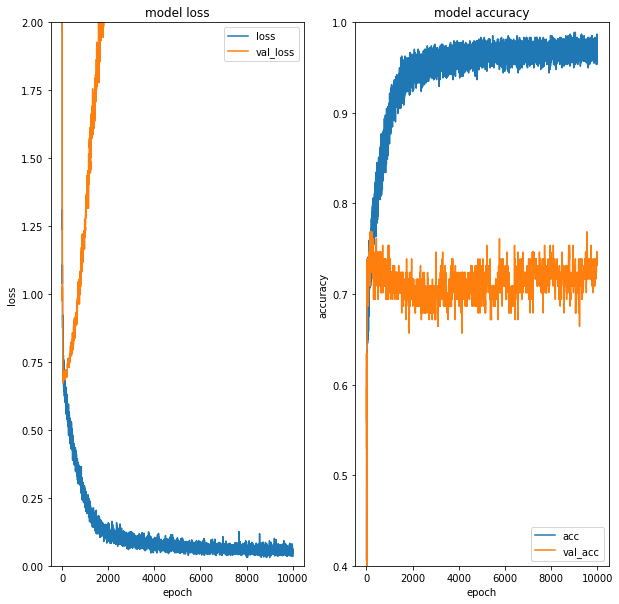

In [17]:
plt.subplot(1, 2, 1)
plt.title('model loss')
plt.plot(hist.history['loss'], label="loss")
plt.plot(hist.history['val_loss'], label="val_loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.ylim((0,2))

plt.subplot(1, 2, 2)
plt.title('model accuracy')
plt.plot(hist.history['acc'], label="acc")
plt.plot(hist.history['val_acc'], label="val_acc")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.ylim((0.4, 1))


plt.show();

# 6. 모델 결과 확인

In [25]:
#l_model = load_model('./model_data/VGG_model.h5')

In [18]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=BS)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

288/288 [==============================] - 0s 420us/step
## evaluation loss and_metrics ##
[3.912617815865411, 0.7083333333333334]


In [19]:
xhat_idx = np.random.choice(x_test.shape[0], 10)
xhat = x_test[xhat_idx]

yhat_classes = model.predict_classes(xhat)

for i in range(10):
    print('True : ' + str(np.argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat_classes[i]))

True : 1, Predict : 1
True : 2, Predict : 2
True : 1, Predict : 1
True : 0, Predict : 1
True : 0, Predict : 2
True : 0, Predict : 0
True : 1, Predict : 1
True : 0, Predict : 1
True : 0, Predict : 0
True : 1, Predict : 1


# 7. 최종 모델 훈련

In [20]:
x_total = np.vstack((x_train, x_test))
y_total = np.vstack((y_train, y_test))

print(x_total.shape)
print(y_total.shape)

(958, 320, 120, 1)
(958, 3)


In [21]:
early_stopping = EarlyStopping(monitor='loss', patience=10)

In [22]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.0001)

In [23]:
EPOCHS = 1000
INIT_LR = 1e-4
BS = 256
split_ratio = 0.2

print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])

[INFO] compiling model...


In [24]:
hist = model.fit(x_total, y_total, 
                 epochs=EPOCHS, batch_size=BS, 
                 #validation_split=split_ratio, 
                 verbose = 1
                 ,callbacks=[reduce_lr]
                )

Epoch 1/1000
958/958 [==============================] - 2s 2ms/step - loss: 1.5812 - acc: 0.8549
Epoch 2/1000
958/958 [==============================] - 0s 383us/step - loss: 1.4892 - acc: 0.8674
Epoch 3/1000
958/958 [==============================] - 0s 367us/step - loss: 1.5056 - acc: 0.8622
Epoch 4/1000
958/958 [==============================] - 0s 378us/step - loss: 1.4891 - acc: 0.8539
Epoch 5/1000
958/958 [==============================] - 0s 376us/step - loss: 1.2949 - acc: 0.8664
Epoch 6/1000
958/958 [==============================] - 0s 364us/step - loss: 1.3215 - acc: 0.8706
Epoch 7/1000
958/958 [==============================] - 0s 377us/step - loss: 1.2494 - acc: 0.8633
Epoch 8/1000
958/958 [==============================] - 0s 383us/step - loss: 1.1813 - acc: 0.8580
Epoch 9/1000
958/958 [==============================] - 0s 372us/step - loss: 1.1420 - acc: 0.8539
Epoch 10/1000
958/958 [==============================] - 0s 382us/step - loss: 1.1258 - acc: 0.8507
Epoch 11/10

958/958 [==============================] - 0s 385us/step - loss: 0.4405 - acc: 0.8716
Epoch 84/1000
958/958 [==============================] - 0s 364us/step - loss: 0.4341 - acc: 0.8706
Epoch 85/1000
958/958 [==============================] - 0s 389us/step - loss: 0.4328 - acc: 0.8653
Epoch 86/1000
958/958 [==============================] - 0s 364us/step - loss: 0.4501 - acc: 0.8664
Epoch 87/1000
958/958 [==============================] - 0s 376us/step - loss: 0.4344 - acc: 0.8758
Epoch 88/1000
958/958 [==============================] - 0s 372us/step - loss: 0.4201 - acc: 0.8831
Epoch 89/1000
958/958 [==============================] - 0s 376us/step - loss: 0.3865 - acc: 0.8779
Epoch 90/1000
958/958 [==============================] - 0s 354us/step - loss: 0.4140 - acc: 0.8716
Epoch 91/1000
958/958 [==============================] - 0s 378us/step - loss: 0.3972 - acc: 0.8758
Epoch 92/1000
958/958 [==============================] - 0s 357us/step - loss: 0.4076 - acc: 0.8601
Epoch 93/1000


958/958 [==============================] - 0s 390us/step - loss: 0.3381 - acc: 0.8820
Epoch 165/1000
958/958 [==============================] - 0s 363us/step - loss: 0.3401 - acc: 0.8894
Epoch 166/1000
958/958 [==============================] - 0s 386us/step - loss: 0.3164 - acc: 0.8925
Epoch 167/1000
958/958 [==============================] - 0s 382us/step - loss: 0.3140 - acc: 0.8946
Epoch 168/1000
958/958 [==============================] - 0s 383us/step - loss: 0.3006 - acc: 0.9008
Epoch 169/1000
958/958 [==============================] - 0s 368us/step - loss: 0.3227 - acc: 0.8925
Epoch 170/1000
958/958 [==============================] - 0s 378us/step - loss: 0.3162 - acc: 0.8998
Epoch 171/1000
958/958 [==============================] - 0s 376us/step - loss: 0.3159 - acc: 0.8914
Epoch 172/1000
958/958 [==============================] - 0s 378us/step - loss: 0.3273 - acc: 0.8904
Epoch 173/1000
958/958 [==============================] - 0s 367us/step - loss: 0.2980 - acc: 0.8977
Epoch

958/958 [==============================] - 0s 374us/step - loss: 0.2418 - acc: 0.9050
Epoch 246/1000
958/958 [==============================] - 0s 383us/step - loss: 0.2525 - acc: 0.9019
Epoch 247/1000
958/958 [==============================] - 0s 385us/step - loss: 0.2283 - acc: 0.9144
Epoch 248/1000
958/958 [==============================] - 0s 368us/step - loss: 0.2514 - acc: 0.8946
Epoch 249/1000
958/958 [==============================] - 0s 376us/step - loss: 0.2548 - acc: 0.8956
Epoch 250/1000
958/958 [==============================] - 0s 383us/step - loss: 0.2367 - acc: 0.9029
Epoch 251/1000
958/958 [==============================] - 0s 374us/step - loss: 0.2287 - acc: 0.9123
Epoch 252/1000
958/958 [==============================] - 0s 365us/step - loss: 0.2793 - acc: 0.8987
Epoch 253/1000
958/958 [==============================] - 0s 364us/step - loss: 0.2343 - acc: 0.9040
Epoch 254/1000
958/958 [==============================] - 0s 376us/step - loss: 0.2489 - acc: 0.9019
Epoch

958/958 [==============================] - 0s 372us/step - loss: 0.2128 - acc: 0.9092
Epoch 327/1000
958/958 [==============================] - 0s 377us/step - loss: 0.1955 - acc: 0.9123
Epoch 328/1000
958/958 [==============================] - 0s 378us/step - loss: 0.2116 - acc: 0.9008
Epoch 329/1000
958/958 [==============================] - 0s 368us/step - loss: 0.1918 - acc: 0.9196
Epoch 330/1000
958/958 [==============================] - 0s 374us/step - loss: 0.2071 - acc: 0.9029
Epoch 331/1000
958/958 [==============================] - 0s 367us/step - loss: 0.2023 - acc: 0.9144
Epoch 332/1000
958/958 [==============================] - 0s 369us/step - loss: 0.2196 - acc: 0.8956
Epoch 333/1000
958/958 [==============================] - 0s 379us/step - loss: 0.2085 - acc: 0.9071
Epoch 334/1000
958/958 [==============================] - 0s 385us/step - loss: 0.1988 - acc: 0.9102
Epoch 335/1000
958/958 [==============================] - 0s 390us/step - loss: 0.2136 - acc: 0.9029
Epoch

958/958 [==============================] - 0s 372us/step - loss: 0.1913 - acc: 0.9123
Epoch 408/1000
958/958 [==============================] - 0s 383us/step - loss: 0.1812 - acc: 0.9207
Epoch 409/1000
958/958 [==============================] - 0s 359us/step - loss: 0.1882 - acc: 0.9175
Epoch 410/1000
958/958 [==============================] - 0s 346us/step - loss: 0.1928 - acc: 0.9123
Epoch 411/1000
958/958 [==============================] - 0s 356us/step - loss: 0.1981 - acc: 0.9081
Epoch 412/1000
958/958 [==============================] - 0s 381us/step - loss: 0.1873 - acc: 0.9071
Epoch 413/1000
958/958 [==============================] - 0s 375us/step - loss: 0.1907 - acc: 0.9186
Epoch 414/1000
958/958 [==============================] - 0s 347us/step - loss: 0.1976 - acc: 0.9207
Epoch 415/1000
958/958 [==============================] - 0s 363us/step - loss: 0.1990 - acc: 0.9092
Epoch 416/1000
958/958 [==============================] - 0s 376us/step - loss: 0.1994 - acc: 0.9102
Epoch

958/958 [==============================] - 0s 394us/step - loss: 0.1925 - acc: 0.9144
Epoch 489/1000
958/958 [==============================] - 0s 388us/step - loss: 0.1884 - acc: 0.9071
Epoch 490/1000
958/958 [==============================] - 0s 383us/step - loss: 0.1779 - acc: 0.9228
Epoch 491/1000
958/958 [==============================] - 0s 377us/step - loss: 0.1968 - acc: 0.9081
Epoch 492/1000
958/958 [==============================] - 0s 378us/step - loss: 0.1785 - acc: 0.9238
Epoch 493/1000
958/958 [==============================] - 0s 363us/step - loss: 0.1851 - acc: 0.9113
Epoch 494/1000
958/958 [==============================] - 0s 374us/step - loss: 0.2018 - acc: 0.9134
Epoch 495/1000
958/958 [==============================] - 0s 384us/step - loss: 0.1807 - acc: 0.9186
Epoch 496/1000
958/958 [==============================] - 0s 386us/step - loss: 0.1863 - acc: 0.9207
Epoch 497/1000
958/958 [==============================] - 0s 381us/step - loss: 0.1796 - acc: 0.9154
Epoch

958/958 [==============================] - 0s 372us/step - loss: 0.1580 - acc: 0.9228
Epoch 570/1000
958/958 [==============================] - 0s 385us/step - loss: 0.1516 - acc: 0.9217
Epoch 571/1000
958/958 [==============================] - 0s 392us/step - loss: 0.1602 - acc: 0.9186
Epoch 572/1000
958/958 [==============================] - 0s 382us/step - loss: 0.1741 - acc: 0.9207
Epoch 573/1000
958/958 [==============================] - 0s 374us/step - loss: 0.1760 - acc: 0.9144
Epoch 574/1000
958/958 [==============================] - 0s 385us/step - loss: 0.1582 - acc: 0.9186
Epoch 575/1000
958/958 [==============================] - 0s 391us/step - loss: 0.1797 - acc: 0.9071
Epoch 576/1000
958/958 [==============================] - 0s 382us/step - loss: 0.1839 - acc: 0.9134
Epoch 577/1000
958/958 [==============================] - 0s 379us/step - loss: 0.1656 - acc: 0.9154
Epoch 578/1000
958/958 [==============================] - 0s 378us/step - loss: 0.1669 - acc: 0.9123
Epoch

958/958 [==============================] - 0s 387us/step - loss: 0.1476 - acc: 0.9238
Epoch 651/1000
958/958 [==============================] - 0s 377us/step - loss: 0.1439 - acc: 0.9280
Epoch 652/1000
958/958 [==============================] - 0s 393us/step - loss: 0.1621 - acc: 0.9092
Epoch 653/1000
958/958 [==============================] - 0s 384us/step - loss: 0.1422 - acc: 0.9248
Epoch 654/1000
958/958 [==============================] - 0s 386us/step - loss: 0.1560 - acc: 0.9238
Epoch 655/1000
958/958 [==============================] - 0s 382us/step - loss: 0.1565 - acc: 0.9123
Epoch 656/1000
958/958 [==============================] - 0s 380us/step - loss: 0.1517 - acc: 0.9238
Epoch 657/1000
958/958 [==============================] - 0s 392us/step - loss: 0.1509 - acc: 0.9186
Epoch 658/1000
958/958 [==============================] - 0s 372us/step - loss: 0.1528 - acc: 0.9134
Epoch 659/1000
958/958 [==============================] - 0s 384us/step - loss: 0.1668 - acc: 0.9092
Epoch

958/958 [==============================] - 0s 379us/step - loss: 0.1452 - acc: 0.9217
Epoch 732/1000
958/958 [==============================] - 0s 379us/step - loss: 0.1537 - acc: 0.9113
Epoch 733/1000
958/958 [==============================] - 0s 376us/step - loss: 0.1496 - acc: 0.9196
Epoch 734/1000
958/958 [==============================] - 0s 379us/step - loss: 0.1494 - acc: 0.9154
Epoch 735/1000
958/958 [==============================] - 0s 381us/step - loss: 0.1508 - acc: 0.9186
Epoch 736/1000
958/958 [==============================] - 0s 376us/step - loss: 0.1491 - acc: 0.9175
Epoch 737/1000
958/958 [==============================] - 0s 379us/step - loss: 0.1412 - acc: 0.9207
Epoch 738/1000
958/958 [==============================] - 0s 385us/step - loss: 0.1435 - acc: 0.9175
Epoch 739/1000
958/958 [==============================] - 0s 377us/step - loss: 0.1440 - acc: 0.9269
Epoch 740/1000
958/958 [==============================] - 0s 385us/step - loss: 0.1558 - acc: 0.9165
Epoch

958/958 [==============================] - 0s 389us/step - loss: 0.1425 - acc: 0.9238
Epoch 813/1000
958/958 [==============================] - 0s 365us/step - loss: 0.1568 - acc: 0.9238
Epoch 814/1000
958/958 [==============================] - 0s 366us/step - loss: 0.1422 - acc: 0.9248
Epoch 815/1000
958/958 [==============================] - 0s 375us/step - loss: 0.1427 - acc: 0.9248
Epoch 816/1000
958/958 [==============================] - 0s 378us/step - loss: 0.1343 - acc: 0.9374
Epoch 817/1000
958/958 [==============================] - 0s 367us/step - loss: 0.1416 - acc: 0.9311
Epoch 818/1000
958/958 [==============================] - 0s 375us/step - loss: 0.1553 - acc: 0.9175
Epoch 819/1000
958/958 [==============================] - 0s 364us/step - loss: 0.1373 - acc: 0.9259
Epoch 820/1000
958/958 [==============================] - 0s 382us/step - loss: 0.1532 - acc: 0.9186
Epoch 821/1000
958/958 [==============================] - 0s 376us/step - loss: 0.1414 - acc: 0.9269
Epoch

958/958 [==============================] - 0s 384us/step - loss: 0.1404 - acc: 0.9248
Epoch 894/1000
958/958 [==============================] - 0s 361us/step - loss: 0.1400 - acc: 0.9165
Epoch 895/1000
958/958 [==============================] - 0s 372us/step - loss: 0.1434 - acc: 0.9175
Epoch 896/1000
958/958 [==============================] - 0s 387us/step - loss: 0.1427 - acc: 0.9207
Epoch 897/1000
958/958 [==============================] - 0s 370us/step - loss: 0.1400 - acc: 0.9238
Epoch 898/1000
958/958 [==============================] - 0s 374us/step - loss: 0.1337 - acc: 0.9207
Epoch 899/1000
958/958 [==============================] - 0s 393us/step - loss: 0.1312 - acc: 0.9332
Epoch 900/1000
958/958 [==============================] - 0s 393us/step - loss: 0.1523 - acc: 0.9123
Epoch 901/1000
958/958 [==============================] - 0s 395us/step - loss: 0.1430 - acc: 0.9196
Epoch 902/1000
958/958 [==============================] - 0s 387us/step - loss: 0.1389 - acc: 0.9311
Epoch

958/958 [==============================] - 0s 380us/step - loss: 0.1429 - acc: 0.9238
Epoch 975/1000
958/958 [==============================] - 0s 380us/step - loss: 0.1363 - acc: 0.9175
Epoch 976/1000
958/958 [==============================] - 0s 378us/step - loss: 0.1294 - acc: 0.9301
Epoch 977/1000
958/958 [==============================] - 0s 366us/step - loss: 0.1350 - acc: 0.9269
Epoch 978/1000
958/958 [==============================] - 0s 386us/step - loss: 0.1367 - acc: 0.9238
Epoch 979/1000
958/958 [==============================] - 0s 385us/step - loss: 0.1283 - acc: 0.9332
Epoch 980/1000
958/958 [==============================] - 0s 378us/step - loss: 0.1373 - acc: 0.9228
Epoch 981/1000
958/958 [==============================] - 0s 369us/step - loss: 0.1282 - acc: 0.9248
Epoch 982/1000
958/958 [==============================] - 0s 378us/step - loss: 0.1298 - acc: 0.9280
Epoch 983/1000
958/958 [==============================] - 0s 346us/step - loss: 0.1296 - acc: 0.9280
Epoch

In [25]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=BS)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

288/288 [==============================] - 0s 783us/step
## evaluation loss and_metrics ##
[0.15836450623141396, 0.9131944444444444]


In [26]:
xhat_idx = np.random.choice(x_test.shape[0], 10)
xhat = x_test[xhat_idx]

yhat_classes = model.predict_classes(xhat)

for i in range(10):
    print('True : ' + str(np.argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat_classes[i]))

True : 1, Predict : 1
True : 2, Predict : 2
True : 1, Predict : 1
True : 0, Predict : 0
True : 0, Predict : 0
True : 0, Predict : 0
True : 1, Predict : 1
True : 1, Predict : 1
True : 1, Predict : 1
True : 1, Predict : 1


# 8. 모델 저장

In [35]:
#model.save('./model_data/video_model_3.h5')

In [27]:
from tensorflow.python.keras.models import model_from_yaml

model_yaml = model.to_yaml()
with open("lane_model_v2.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("lane_model_v2.h5")
print("Saved model to disk")

Saved model to disk
